In [2]:
import pandas as pd

# 导入Excel文件
df_rent_train = pd.read_excel('ruc_Class25Q2_train_rent.xlsx')

# 查看数据基本信息（可选）
print("数据形状（行数, 列数）：", df_rent_train.shape)
print("\n前5行数据：")
print(df_rent_train.head())
print("\n列名列表：")
print(df_rent_train.columns.tolist())  # 查看所有列名，确认是否包含需要的特征

数据形状（行数, 列数）： (98899, 46)

前5行数据：
   城市      户型   装修          Price      楼层      面积 朝向       交易时间 付款方式 租赁方式  \
0   0  1室1厅1卫  精装修  654646.481811    4/6层  36.42㎡  西 2024-11-28  季付价   整租   
1   0  1室1厅1卫  精装修  665412.057415    4/6层  41.00㎡  南 2024-10-30  季付价   整租   
2   0  1室1厅1卫  精装修  778222.820548   1/18层  37.36㎡  北 2024-11-12  季付价   整租   
3   0  3室1厅2卫  精装修  612084.974699   1/10层  55.42㎡  南 2024-10-14  季付价   整租   
4   0  1室1厅1卫  精装修  994732.124864  18/18层  49.30㎡  南 2024-12-08  季付价   整租   

   ...     供水        供暖     供电            燃气费       供热费    停车位 停车费用  \
0  ...     民水      集中供暖     民电       2.61元/m3  24-30元/㎡  450.0  150   
1  ...     民水      集中供暖     民电       2.61元/m3     30元/㎡  150.0  150   
2  ...  商水/民水      集中供暖  商电/民电  2.61-2.63元/m3  30-46元/㎡  965.0  500   
3  ...     商水  集中供暖/自采暖  商电/民电       2.61元/m3  30-44元/㎡  500.0  550   
4  ...     民水      集中供暖     民电       2.61元/m3     30元/㎡  400.0  150   

      coord_x    coord_y                    客户反馈  
0  117.339283  40.930007 

In [3]:
import pandas as pd
import re

def score_house_type(house_type):
    """根据户型字符串计算得分（总分10分）"""
    score = 0
    # 1. 室数量评分（4分）
    room_match = re.search(r'(\d+)室|(\d+)房间|(\d+)居室', str(house_type))
    if '未知室' in str(house_type) or '车库' in str(house_type):
        room_score = 0
    elif room_match:
        room_score = 4
    else:
        room_score = 0  # 无室信息（如纯“车库”）
    score += room_score
    
    # 2. 厅数量评分（3分）
    hall_match = re.search(r'(\d+)厅', str(house_type))
    if '未知室' in str(house_type) and not hall_match:
        hall_score = 0
    elif hall_match:
        hall_score = 3
    else:
        hall_score = 1  # 有室信息但无厅信息（如9房间、10居室）
    score += hall_score
    
    # 3. 卫数量评分（3分）
    bath_match = re.search(r'(\d+)卫', str(house_type))
    if '未知室' in str(house_type) and not bath_match:
        bath_score = 0
    elif bath_match:
        bath_score = 3
    else:
        bath_score = 1  # 有室/厅信息但无卫信息（如8室0厅、5室4厅）
    score += bath_score
    
    return score

# 应用打分函数到df_rent_train的“户型”列
df_rent_train['户型完整度评分'] = df_rent_train['户型'].apply(score_house_type)

# 查看评分结果分布
print("户型完整度评分分布：")
print(df_rent_train['户型完整度评分'].value_counts().sort_index())
print("\n前10条数据的户型与评分：")
print(df_rent_train[['户型', '户型完整度评分']].head(10))

户型完整度评分分布：
户型完整度评分
2        12
6      4605
8     59972
10    34310
Name: count, dtype: int64

前10条数据的户型与评分：
       户型  户型完整度评分
0  1室1厅1卫       10
1  1室1厅1卫       10
2  1室1厅1卫       10
3  3室1厅2卫       10
4  1室1厅1卫       10
5  1室1厅1卫       10
6  1室1厅1卫       10
7  1室1厅1卫       10
8  1室1厅1卫       10
9    3室2厅        8


In [4]:
import pandas as pd

# 检查“户型”列的空缺值数量
missing_count = df_rent_train['户型'].isnull().sum()
print(f"户型列的空缺值数量：{missing_count}")

# 若存在空缺值，删除包含空缺值的行
if missing_count > 0:
    df_rent_train_clean = df_rent_train.dropna(subset=['户型']).copy()
    print(f"已删除含空缺值的行，处理后数据量：{df_rent_train_clean.shape[0]} 行（原数据：{df_rent_train.shape[0]} 行）")
else:
    df_rent_train_clean = df_rent_train.copy()
    print("户型列无空缺值，无需删除")

# 确认处理结果（可选）
print("\n处理后户型列的空缺值检查：", df_rent_train_clean['户型'].isnull().sum())

df_rent_train=df_rent_train_clean

户型列的空缺值数量：1
已删除含空缺值的行，处理后数据量：98898 行（原数据：98899 行）

处理后户型列的空缺值检查： 0


In [5]:
import pandas as pd

# 1. 查看原始“装修”列的部分数据（可选，用于确认处理前状态）
print("处理前的部分数据：")
print(df_rent_train['装修'].head(10))

# 2. 填充空缺值为0
df_rent_train['装修'] = df_rent_train['装修'].fillna(0)

# 3. 将“精装修”转换为1（其他非NaN值保持原样，若有需要可进一步处理）
df_rent_train['装修'] = df_rent_train['装修'].apply(lambda x: 1 if x == '精装修' else x)

# 4. 确认处理结果
print("\n处理后的部分数据：")
print(df_rent_train['装修'].head(10))

# 5. 检查空缺值是否已填充
print("\n处理后空缺值数量：", df_rent_train['装修'].isnull().sum())

处理前的部分数据：
0    精装修
1    精装修
2    精装修
3    精装修
4    精装修
5    精装修
6    精装修
7    精装修
8    精装修
9    NaN
Name: 装修, dtype: object

处理后的部分数据：
0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    0
Name: 装修, dtype: int64

处理后空缺值数量： 0


In [6]:
import pandas as pd
import re

def score_floor(floor):
    """对“楼层”列的单个值进行打分"""
    score = 0
    # 1. 信息完整性评分（4分）
    if re.match(r'\d+/\d+层', str(floor)):  # 明确“当前层/总层数”
        info_score = 4
    elif re.match(r'(\d+层|地下\d+层|地下室/\d+层)', str(floor)):  # 仅当前层或总层数
        info_score = 2
    else:  # 模糊描述（低楼层、车库等）
        info_score = 0
    score += info_score
    
    # 2. 数值合理性评分（3分）
    if re.match(r'\d+/\d+层', str(floor)):
        current, total = map(int, re.findall(r'\d+', str(floor))[:2])
        if current > 0 and total > 0 and current <= total:
            value_score = 3
        else:
            value_score = 1
    elif re.match(r'地下\d+层|地下室/\d+层', str(floor)):
        value_score = 1  # 地下层数值合理但非正整数
    elif re.match(r'\d+层', str(floor)):
        current = int(re.findall(r'\d+', str(floor))[0])
        if current > 0:
            value_score = 1  # 仅当前层，总层数未知
        else:
            value_score = 0
    else:
        value_score = 0  # 无层数数值
    score += value_score
    
    # 3. 业务可分析性评分（3分）
    if re.match(r'\d+/\d+层', str(floor)):
        analytic_score = 3
    elif re.match(r'(\d+层|地下\d+层|地下室/\d+层)', str(floor)):
        analytic_score = 1
    else:
        analytic_score = 0
    score += analytic_score
    
    return score

# 应用打分函数到“楼层”列
df_rent_train['楼层完整度评分'] = df_rent_train['楼层'].apply(score_floor)

# 查看评分结果分布
print("楼层完整度评分分布：")
print(df_rent_train['楼层完整度评分'].value_counts().sort_index())
print("\n前10条数据的楼层与评分：")
print(df_rent_train[['楼层', '楼层完整度评分']].head(10))

楼层完整度评分分布：
楼层完整度评分
0     89453
4       259
10     9186
Name: count, dtype: int64

前10条数据的楼层与评分：
        楼层  楼层完整度评分
0     4/6层       10
1     4/6层       10
2    1/18层       10
3    1/10层       10
4   18/18层       10
5   17/17层       10
6   17/17层       10
7    5/17层       10
8    5/17层       10
9  中楼层/25层        0


In [7]:
import pandas as pd

# 1. 检查“楼层完整度评分”列的空缺值数量
missing_score_count = df_rent_train['楼层完整度评分'].isnull().sum()
print(f"楼层完整度评分列的空缺值数量：{missing_score_count}")

# 2. 若存在空缺值，删除包含空缺值的行；无空缺值则直接保留原数据
if missing_score_count > 0:
    # 复制数据避免修改原表，仅删除目标列有缺失的行
    df_rent_train_clean = df_rent_train.dropna(subset=['楼层完整度评分']).copy()
    print(f"处理后数据量：{df_rent_train_clean.shape[0]} 行（原数据：{df_rent_train.shape[0]} 行）")
    print(f"已删除 {missing_score_count} 条含缺失值的记录")
else:
    df_rent_train_clean = df_rent_train.copy()
    print("楼层完整度评分列无空缺值，无需删除")

# 3. 验证处理结果（确认无残留缺失值）
final_missing_count = df_rent_train_clean['楼层完整度评分'].isnull().sum()
print(f"\n最终验证：楼层完整度评分列空缺值数量 = {final_missing_count}")

df_rent_train=df_rent_train_clean

楼层完整度评分列的空缺值数量：0
楼层完整度评分列无空缺值，无需删除

最终验证：楼层完整度评分列空缺值数量 = 0


In [8]:
import pandas as pd
import re

# 查看处理前的部分数据（可选）
print("处理前的面积列部分数据：")
print(df_rent_train['面积'].head(10))

# 提取数字（支持整数、小数，忽略单位）
df_rent_train['面积_数值'] = df_rent_train['面积'].apply(
    lambda x: float(re.findall(r'(\d+\.?\d*)', str(x))[0]) if re.findall(r'(\d+\.?\d*)', str(x)) else None
)

# 查看处理结果
print("\n处理后的面积数值部分数据：")
print(df_rent_train[['面积', '面积_数值']].head(10))

# 检查是否有提取失败的记录（结果为None的情况）
failed_count = df_rent_train['面积_数值'].isnull().sum()
print(f"\n提取失败的记录数：{failed_count}（可手动检查这些记录的格式）")

处理前的面积列部分数据：
0     36.42㎡
1     41.00㎡
2     37.36㎡
3     55.42㎡
4     49.30㎡
5     42.00㎡
6     42.00㎡
7     42.12㎡
8     42.12㎡
9    176.00㎡
Name: 面积, dtype: object

处理后的面积数值部分数据：
        面积   面积_数值
0   36.42㎡   36.42
1   41.00㎡   41.00
2   37.36㎡   37.36
3   55.42㎡   55.42
4   49.30㎡   49.30
5   42.00㎡   42.00
6   42.00㎡   42.00
7   42.12㎡   42.12
8   42.12㎡   42.12
9  176.00㎡  176.00

提取失败的记录数：0（可手动检查这些记录的格式）


In [9]:
import pandas as pd

def score_orientation(orientation):
    """对单个朝向数据进行打分（总分10分）"""
    # 处理空值或非字符串格式
    if pd.isna(orientation) or not isinstance(orientation, str):
        return 0
    
    # 拆分朝向列表（按空格分割）
    orient_list = [o.strip() for o in orientation.split()]
    core_orts = ["东", "南", "东南", "西南"]  # 核心朝向
    key_orts = ["南", "东南"]  # 关键加分朝向
    
    # 1. 计算基础分：核心朝向数量（5分）
    core_count = len([o for o in orient_list if o in core_orts])
    if core_count >= 3:
        base_score = 5
    elif core_count == 2:
        base_score = 3
    elif core_count == 1:
        base_score = 1
    else:
        base_score = 0
    
    # 2. 计算加分项：关键朝向权重（5分）
    has_south = "南" in orient_list
    has_southeast = "东南" in orient_list
    has_east_southwest = "东" in orient_list or "西南" in orient_list
    
    if has_south and has_southeast:
        add_score = 5
    elif has_south or has_southeast:
        add_score = 3
    elif has_east_southwest:
        add_score = 1
    else:
        add_score = 0
    
    # 3. 特殊情况：直接计0分
    if "未知" in orient_list or (core_count == 0 and len(orient_list) == 1 and "北" in orient_list):
        total_score = 0
    else:
        total_score = base_score + add_score
    
    return total_score

# 应用打分函数到“朝向”列
df_rent_train['朝向评分'] = df_rent_train['朝向'].apply(score_orientation)

# 查看评分结果
print("朝向评分分布：")
print(df_rent_train['朝向评分'].value_counts().sort_index())
print("\n前10条数据的朝向与评分：")
print(df_rent_train[['朝向', '朝向评分']].head(10))

朝向评分分布：
朝向评分
0     12998
2     11360
4     72270
6      1220
8       897
10      153
Name: count, dtype: int64

前10条数据的朝向与评分：
   朝向  朝向评分
0   西     0
1   南     4
2   北     0
3   南     4
4   南     4
5   北     0
6   北     0
7   北     0
8   北     0
9  西南     2


In [10]:
import pandas as pd

# 1. 检查“朝向评分”列的空缺值数量
missing_orient_score = df_rent_train['朝向评分'].isnull().sum()
print(f"朝向评分列的空缺值数量：{missing_orient_score}")

# 2. 若存在空缺值，删除包含空缺值的行；无空缺值则保留原数据
if missing_orient_score > 0:
    # 仅删除“朝向评分”列有缺失的行，不影响其他完整数据
    df_rent_train_clean = df_rent_train.dropna(subset=['朝向评分']).copy()
    print(f"处理后数据量：{df_rent_train_clean.shape[0]} 行（原数据：{df_rent_train.shape[0]} 行）")
    print(f"已删除 {missing_orient_score} 条含缺失值的记录")
else:
    df_rent_train_clean = df_rent_train.copy()
    print("朝向评分列无空缺值，无需删除")

# 3. 验证处理结果（确保无残留空缺值）
final_missing = df_rent_train_clean['朝向评分'].isnull().sum()
print(f"\n处理后确认：朝向评分列空缺值数量 = {final_missing}")

朝向评分列的空缺值数量：0
朝向评分列无空缺值，无需删除

处理后确认：朝向评分列空缺值数量 = 0


In [11]:
import pandas as pd

# 1. 查看处理前的付款方式分布（可选）
print("处理前付款方式分布：")
print(df_rent_train['付款方式'].value_counts(dropna=False))  # dropna=False显示空白值数量

# 2. 定义量化映射字典
payment_map = {
    '年付价': 5,
    '半年付价': 4,
    '季付价': 3,
    '双月付价': 2,
    '月付价': 1
}

# 3. 执行量化（空白值→0，链接/异常值→0，匹配到的按字典赋值）
def quantize_payment(payment):
    # 处理空白值（NaN或空字符串）
    if pd.isna(payment) or str(payment).strip() == '':
        return 0
    # 处理链接类异常值
    elif 'https://' in str(payment):
        return 0
    # 处理正常付款方式
    else:
        return payment_map.get(str(payment).strip(), 0)  # 未匹配到的异常值也返回0

# 生成量化后的新列
df_rent_train['付款方式_量化'] = df_rent_train['付款方式'].apply(quantize_payment)

# 4. 查看量化结果
print("\n量化后付款方式分布：")
print(df_rent_train['付款方式_量化'].value_counts().sort_index())
print("\n前10条数据的原始值与量化值：")
print(df_rent_train[['付款方式', '付款方式_量化']].head(10))

处理前付款方式分布：
付款方式
季付价                               54529
月付价                               20955
NaN                               18423
半年付价                               4194
年付价                                 748
双月付价                                 44
https://img.ljcdn.com/usercent        3
https://image1.ljcdn.com/rent-        2
Name: count, dtype: int64

量化后付款方式分布：
付款方式_量化
0    18428
1    20955
2       44
3    54529
4     4194
5      748
Name: count, dtype: int64

前10条数据的原始值与量化值：
  付款方式  付款方式_量化
0  季付价        3
1  季付价        3
2  季付价        3
3  季付价        3
4  季付价        3
5  季付价        3
6  季付价        3
7  季付价        3
8  季付价        3
9  季付价        3


In [12]:
import pandas as pd

# 查看处理前的租赁方式分布（可选）
print("处理前租赁方式分布：")
print(df_rent_train['租赁方式'].value_counts(dropna=False))

# 定义映射规则：合租→1，整租→2，其他值（如缺失值、异常值）暂记为0
def quantize_rent_type(rent_type):
    rent_type_str = str(rent_type).strip()
    if rent_type_str == '合租':
        return 1
    elif rent_type_str == '整租':
        return 2
    else:
        return 0  # 处理缺失值或其他异常值

# 应用映射生成量化列
df_rent_train['租赁方式_量化'] = df_rent_train['租赁方式'].apply(quantize_rent_type)

# 查看量化结果
print("\n处理后租赁方式量化分布：")
print(df_rent_train['租赁方式_量化'].value_counts().sort_index())
print("\n前10条数据的原始值与量化值：")
print(df_rent_train[['租赁方式', '租赁方式_量化']].head(10))

处理前租赁方式分布：
租赁方式
整租    93008
合租     5890
Name: count, dtype: int64

处理后租赁方式量化分布：
租赁方式_量化
1     5890
2    93008
Name: count, dtype: int64

前10条数据的原始值与量化值：
  租赁方式  租赁方式_量化
0   整租        2
1   整租        2
2   整租        2
3   整租        2
4   整租        2
5   整租        2
6   整租        2
7   整租        2
8   整租        2
9   整租        2


In [13]:
import pandas as pd

# 1. 查看处理前的电梯列分布（含缺失值）
print("处理前电梯列分布：")
print(df_rent_train['电梯'].value_counts(dropna=False))  # 显示缺失值数量

# 2. 量化处理：无→1，有→2（先转换再删除缺失缺失值）
def quantize_elevator(elevator):
    elevator_str = str(elevator).strip()
    if elevator_str == '无':
        return 1
    elif elevator_str == '有':
        return 2
    else:
        return pd.NA  # 非“有/无”的视为缺失值

# 生成量化列
df_rent_train['电梯_量化'] = df_rent_train['电梯'].apply(quantize_elevator)

# 3. 删除含缺失值的行
df_rent_train_clean = df_rent_train.dropna(subset=['电梯_量化']).copy()

# 4. 查看处理结果
print(f"\n删除缺失值后的数据量：{df_rent_train_clean.shape[0]} 行（原数据：{df_rent_train.shape[0]} 行）")
print("处理后电梯_量化分布：")
print(df_rent_train_clean['电梯_量化'].value_counts().sort_index())
print("\n前10条数据的原始值与量化值：")
print(df_rent_train_clean[['电梯', '电梯_量化']].head(10))

处理前电梯列分布：
电梯
有      69233
无      29661
NaN        4
Name: count, dtype: int64

删除缺失值后的数据量：98894 行（原数据：98898 行）
处理后电梯_量化分布：
电梯_量化
1    29661
2    69233
Name: count, dtype: int64

前10条数据的原始值与量化值：
  电梯 电梯_量化
0  无     1
1  无     1
2  有     2
3  有     2
4  有     2
5  有     2
6  有     2
7  有     2
8  有     2
9  有     2


In [14]:
import pandas as pd

# 1. 查看处理前的车位列分布（含缺失值）
print("处理前车位列分布：")
print(df_rent_train['车位'].value_counts(dropna=False))  # 显示缺失值数量

# 2. 量化处理：免费使用→1，租用车位→2，缺失值→0
def quantize_parking(parking):
    # 处理缺失值（NaN或空字符串）
    if pd.isna(parking) or str(parking).strip() == '':
        return 0
    # 处理有效取值
    parking_str = str(parking).strip()
    if parking_str == '免费使用':
        return 1
    elif parking_str == '租用车位':
        return 2
    else:
        return 0  # 其他异常值也视为0（如需严格区分可单独处理）

# 生成量化列
df_rent_train['车位_量化'] = df_rent_train['车位'].apply(quantize_parking)

# 3. 查看处理结果
print("\n处理后车位_量化分布：")
print(df_rent_train['车位_量化'].value_counts().sort_index())
print("\n前10条数据的原始值与量化值：")
print(df_rent_train[['车位', '车位_量化']].head(10))

处理前车位列分布：
车位
NaN     74134
租用车位    20319
免费使用     4445
Name: count, dtype: int64

处理后车位_量化分布：
车位_量化
0    74134
1     4445
2    20319
Name: count, dtype: int64

前10条数据的原始值与量化值：
     车位  车位_量化
0   NaN      0
1   NaN      0
2  租用车位      2
3  租用车位      2
4   NaN      0
5   NaN      0
6   NaN      0
7   NaN      0
8   NaN      0
9   NaN      0


In [15]:
import pandas as pd

# ----------------------
# 1. 用水列量化：商水→2，民水→1，缺失→0
# ----------------------
def quantize_water(water):
    if pd.isna(water) or str(water).strip() == '':
        return 0
    water_str = str(water).strip()
    if water_str == '商水':
        return 2
    elif water_str == '民水':
        return 1
    else:
        return 0  # 异常值视为0

df_rent_train['用水_量化'] = df_rent_train['用水'].apply(quantize_water)


# ----------------------
# 2. 用电列量化：商电→2，民电→1，缺失→0
# ----------------------
def quantize_electric(electric):
    if pd.isna(electric) or str(electric).strip() == '':
        return 0
    electric_str = str(electric).strip()
    if electric_str == '商电':
        return 2
    elif electric_str == '民电':
        return 1
    else:
        return 0  # 异常值视为0

df_rent_train['用电_量化'] = df_rent_train['用电'].apply(quantize_electric)


# ----------------------
# 3. 燃气列量化：无→1，有→2，缺失→0
# ----------------------
def quantize_gas(gas):
    if pd.isna(gas) or str(gas).strip() == '':
        return 0
    gas_str = str(gas).strip()
    if gas_str == '无':
        return 1
    elif gas_str == '有':
        return 2
    else:
        return 0  # 异常值视为0

df_rent_train['燃气_量化'] = df_rent_train['燃气'].apply(quantize_gas)


# ----------------------
# 4. 采暖列量化：自采暖→1，集中供暖→2，缺失→0
# ----------------------
def quantize_heating(heating):
    if pd.isna(heating) or str(heating).strip() == '':
        return 0
    heating_str = str(heating).strip()
    if heating_str == '自采暖':
        return 1
    elif heating_str == '集中供暖':
        return 2
    else:
        return 0  # 异常值视为0

df_rent_train['采暖_量化'] = df_rent_train['采暖'].apply(quantize_heating)


# ----------------------
# 查看量化结果
# ----------------------
print("各列量化后分布：")
columns = ['用水_量化', '用电_量化', '燃气_量化', '采暖_量化']
for col in columns:
    print(f"\n{col} 分布：")
    print(df_rent_train[col].value_counts().sort_index())

# 查看前10条数据的原始值与量化值
print("\n前10条数据示例：")
print(df_rent_train[['用水', '用水_量化', '用电', '用电_量化', 
                     '燃气', '燃气_量化', '采暖', '采暖_量化']].head(10))

各列量化后分布：

用水_量化 分布：
用水_量化
0    17739
1    73293
2     7866
Name: count, dtype: int64

用电_量化 分布：
用电_量化
0    17323
1    73634
2     7941
Name: count, dtype: int64

燃气_量化 分布：
燃气_量化
0     4582
1     9320
2    84996
Name: count, dtype: int64

采暖_量化 分布：
采暖_量化
0    64487
1    12910
2    21501
Name: count, dtype: int64

前10条数据示例：
   用水  用水_量化  用电  用电_量化 燃气  燃气_量化    采暖  采暖_量化
0  民水      1  民电      1  有      2  集中供暖      2
1  民水      1  民电      1  有      2  集中供暖      2
2  民水      1  民电      1  有      2  集中供暖      2
3  商水      2  商电      2  无      1  集中供暖      2
4  民水      1  民电      1  有      2  集中供暖      2
5  民水      1  民电      1  有      2  集中供暖      2
6  民水      1  民电      1  有      2  集中供暖      2
7  民水      1  民电      1  有      2  集中供暖      2
8  民水      1  民电      1  有      2  集中供暖      2
9  民水      1  民电      1  有      2   自采暖      1


In [16]:
import pandas as pd

# 定义租期映射字典（按规则覆盖所有可能值）
lease_map = {
    # 1个月以内（量化值1）
    '1个月以内': 1,
    # 1-2个月（量化值2）
    '1个月': 2, '1~2个月': 2, '1个月以上': 2,  # 注意“1个月以上”实际偏短，归为2
    # 2-3个月（量化值3）
    '2个月': 3, '2~3个月': 3, '3个月': 3, '1~3个月': 3, '2个月以上': 3, '3个月以上': 3,
    # 3-6个月（量化值4）
    '3~4个月': 4, '4个月': 4, '4~5个月': 4, '5个月': 4, '3~5个月': 4, 
    '2~5个月': 4, '4个月以上': 4, '5个月以上': 4, '3~6个月': 4, '2~6个月': 4,
    # 6-12个月（量化值5）
    '6个月': 5, '6~7个月': 5, '7个月': 5, '4~6个月': 5, '4~7个月': 5,
    '6~9个月': 5, '8个月': 5, '8个月以上': 5, '9个月': 5, '9~10个月': 5,
    '6~11个月': 6, '3~11个月': 5, '1~8个月': 5, '2~8个月': 5, '2~9个月': 5,
    '7~12个月': 5, '8~12个月': 5, '9~12个月': 5, '4~12个月': 5, '2~12个月': 5,
    '11个月': 5, '10个月': 5, '10~11个月': 5, '11~12个月': 5, '1~12个月': 5,
    # 1年以上（量化值6）
    '1年': 6, '1年以内': 6, '1年以上': 6, '2年': 6, '2年以内': 6, '2年以上': 6,
    '3年': 6, '3年以内': 6, '3年以上': 6, '1~2年': 6, '1~3年': 6,
    '10个月以上': 6, '11个月以上': 6, '6个月以上': 6, '9个月以上': 6,
    '10~24个月': 6, '11~24个月': 6, '5~24个月': 6, '7~24个月': 6, '8~24个月': 6,
    '9~24个月': 6, '4~24个月': 6, '2~24个月': 6, '3~24个月': 6, '5~12个月': 6,
    '1~24个月': 6, '10~36个月': 6, '11~36个月': 6, '8~36个月': 6, '2~36个月': 6,
    '3~36个月': 6, '6~36个月': 6, '1~36个月': 6
}

# 量化函数：匹配映射字典，空缺值返回0
def quantize_lease(lease):
    if pd.isna(lease) or str(lease).strip() == '':
        return 0  # 空缺值保留为0
    lease_str = str(lease).strip()
    return lease_map.get(lease_str, 0)  # 未匹配的异常值也返回0

# 生成量化列
df_rent_train['租期_量化'] = df_rent_train['租期'].apply(quantize_lease)

# 查看量化结果
print("租期_量化分布：")
print(df_rent_train['租期_量化'].value_counts().sort_index())
print("\n前10条数据的原始值与量化值：")
print(df_rent_train[['租期', '租期_量化']].head(10))

租期_量化分布：
租期_量化
0    47801
1       14
2       77
3      230
4       41
5      800
6    49935
Name: count, dtype: int64

前10条数据的原始值与量化值：
       租期  租期_量化
0      1年      6
1     NaN      0
2     NaN      0
3  5~12个月      6
4      1年      6
5    1~2年      6
6    1~2年      6
7      1年      6
8      1年      6
9    3年以内      6


In [17]:
import pandas as pd

# 1. 定义核心设施列表（高频实用设施）
core_facilities = ['空调', '洗衣机', '冰箱', '电视', '热水器', 
                   '床', '衣柜', '宽带', '暖气', '天然气', '沙发', '书桌']

# 2. 量化函数：统计每条数据包含的核心设施数量，空缺值→0
def quantize_facility(facility_str):
    # 处理空缺值（NaN或空字符串）
    if pd.isna(facility_str) or str(facility_str).strip() == '':
        return 0
    # 统计包含的核心设施数量
    count = 0
    for fac in core_facilities:
        if fac in str(facility_str):
            count += 1
    return count

# 3. 生成量化列
df_rent_train['配套设施_量化'] = df_rent_train['配套设施'].apply(quantize_facility)

# 4. 查看量化结果
print("配套设施_量化分布（数值=包含的核心设施数量）：")
print(df_rent_train['配套设施_量化'].value_counts().sort_index())

# 5. 示例：查看前10条数据的原始值、包含的设施及量化值
print("\n前10条数据示例：")
# 辅助函数：提取包含的核心设施（用于展示）
def extract_facilities(facility_str):
    if pd.isna(facility_str) or str(facility_str).strip() == '':
        return '无'
    return [fac for fac in core_facilities if fac in str(facility_str)]

df_rent_train['包含核心设施'] = df_rent_train['配套设施'].apply(extract_facilities)
print(df_rent_train[['配套设施', '包含核心设施', '配套设施_量化']].head(10))

配套设施_量化分布（数值=包含的核心设施数量）：
配套设施_量化
0    30450
1     2492
2     3049
3     4392
4     4360
5     4323
6     8867
7    12415
8    16305
9    12245
Name: count, dtype: int64

前10条数据示例：
                           配套设施                                  包含核心设施  \
0            洗衣机、空调、衣柜、热水器、床、宽带               [空调, 洗衣机, 热水器, 床, 衣柜, 宽带]   
1         洗衣机、空调、衣柜、电视、热水器、床、宽带           [空调, 洗衣机, 电视, 热水器, 床, 衣柜, 宽带]   
2         洗衣机、空调、衣柜、电视、热水器、床、宽带           [空调, 洗衣机, 电视, 热水器, 床, 衣柜, 宽带]   
3   洗衣机、空调、衣柜、电视、冰箱、热水器、床、暖气、宽带   [空调, 洗衣机, 冰箱, 电视, 热水器, 床, 衣柜, 宽带, 暖气]   
4         洗衣机、空调、衣柜、电视、热水器、床、宽带           [空调, 洗衣机, 电视, 热水器, 床, 衣柜, 宽带]   
5            洗衣机、空调、衣柜、热水器、床、宽带               [空调, 洗衣机, 热水器, 床, 衣柜, 宽带]   
6            洗衣机、空调、衣柜、热水器、床、宽带               [空调, 洗衣机, 热水器, 床, 衣柜, 宽带]   
7               洗衣机、空调、热水器、床、宽带                   [空调, 洗衣机, 热水器, 床, 宽带]   
8               洗衣机、空调、热水器、床、宽带                   [空调, 洗衣机, 热水器, 床, 宽带]   
9  洗衣机、空调、衣柜、电视、冰箱、热水器、床、暖气、天然气  [空调, 洗衣机, 冰箱, 电视, 热水器, 床, 衣柜, 暖气, 天然气

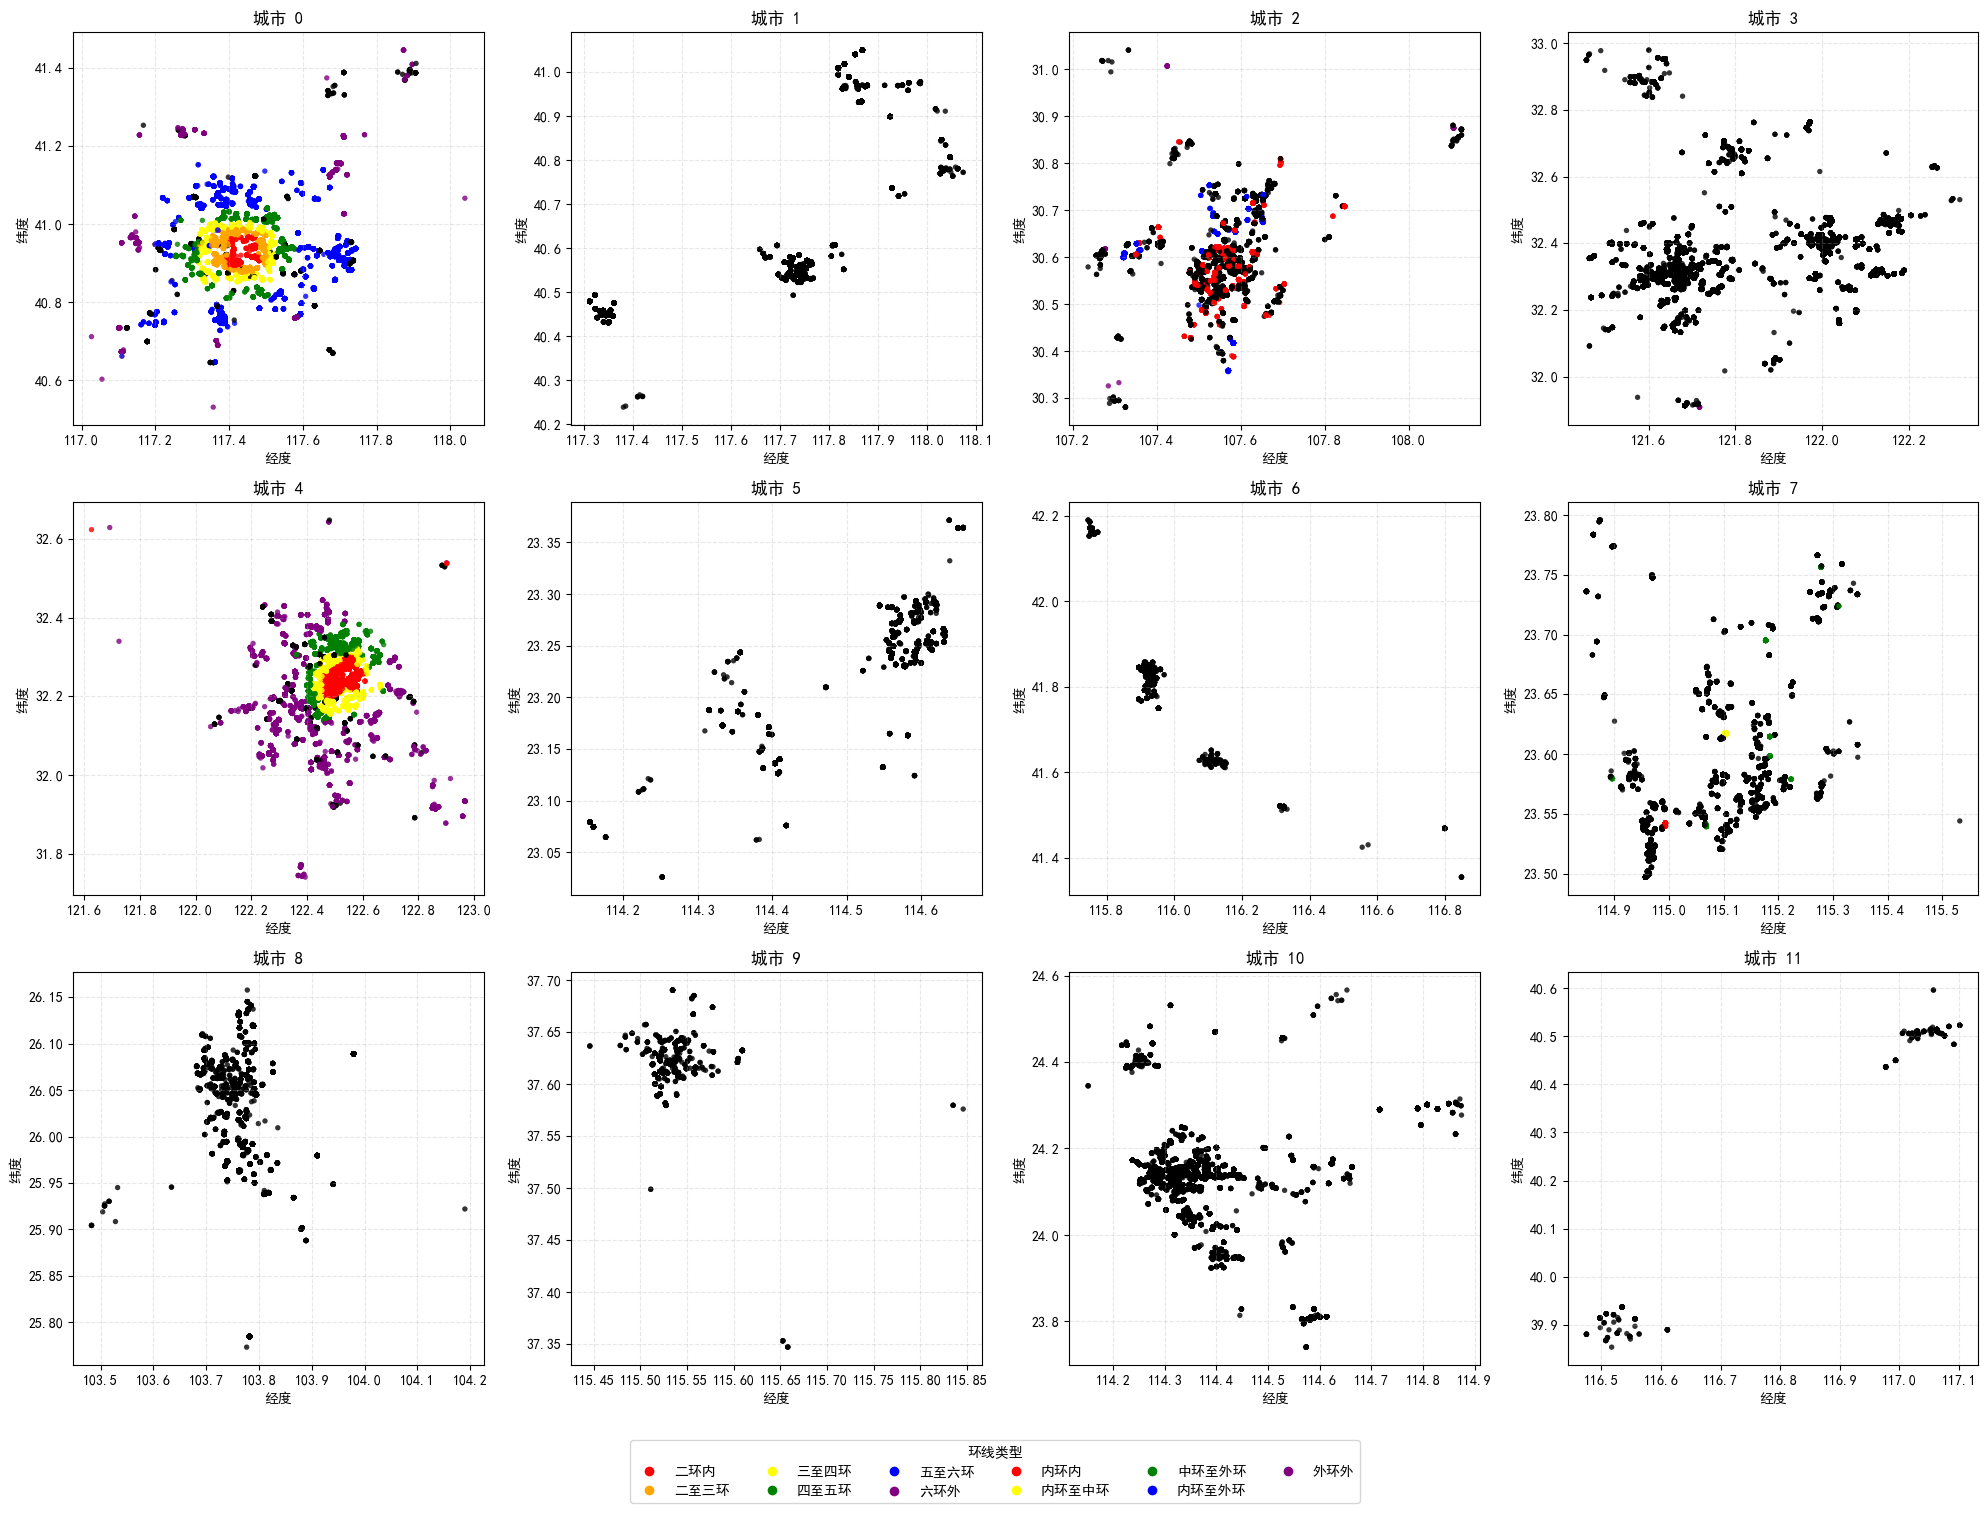

In [18]:
df=df_rent_train

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 设置Windows中文字体，确保标题和标签正常显示
plt.rcParams["font.family"] = ["SimHei", "Microsoft YaHei"]
plt.rcParams["axes.unicode_minus"] = False  # 解决负号显示问题

# 1. 定义环线与颜色的映射关系（严格按照需求配置）
color_mapping = {
    # 空白值处理（包含NaN和空字符串）
    np.nan: 'black',
    '': 'black',
    # 环线类型对应颜色
    '二环内': 'red',
    '二至三环': 'orange',
    '三至四环': 'yellow',
    '四至五环': 'green',
    '五至六环': 'blue',
    '六环外': 'purple',
    '内环内': 'red',
    '内环至中环': 'yellow',
    '中环至外环': 'green',
    '内环至外环': 'blue',
    '外环外': 'purple'
}

# 2. 数据预处理
# 确保城市列为整数类型（0-11）
df['城市'] = df['城市'].astype(int)
# 将环线列的空白值统一转换为NaN，便于映射
df['环线位置'] = df['环线位置'].replace('', np.nan)

# 3. 获取所有城市并排序（确保0-11顺序）
cities = sorted(df['城市'].unique())
# 检查是否包含所有12个城市，若有缺失则提示
missing_cities = set(range(12)) - set(cities)
if missing_cities:
    print(f"注意：缺失以下城市的数据：{missing_cities}")

# 4. 创建12个子图（3行4列布局，适合12个城市）
fig, axes = plt.subplots(3, 4, figsize=(20, 15))  # 宽20，高15，保证子图清晰
axes = axes.flatten()  # 转换为一维数组，方便循环遍历

# 5. 逐个城市绘制散点图
for i, city in enumerate(cities):
    # 筛选当前城市的数据
    city_df = df[df['城市'] == city].copy()
    
    # 根据环线列匹配颜色，未匹配的异常值默认黑色
    city_df['点颜色'] = city_df['环线位置'].map(color_mapping).fillna('black')
    
    # 绘制散点图：x=经度，y=纬度，颜色按环线规则
    axes[i].scatter(
        city_df['lon'], 
        city_df['lat'], 
        c=city_df['点颜色'],  # 点的颜色
        s=15,  # 点的大小（可根据数据量调整）
        alpha=0.8,  # 透明度（避免重叠过密）
        edgecolor='none'  # 无边框，突出颜色区分
    )
    
    # 设置子图标题和坐标轴标签
    axes[i].set_title(f'城市 {city}', fontsize=12)
    axes[i].set_xlabel('经度', fontsize=10)
    axes[i].set_ylabel('纬度', fontsize=10)
    axes[i].grid(linestyle='--', alpha=0.3)  # 浅色网格线，不干扰数据

# 6. 添加统一图例（解释颜色对应的环线类型）
# 提取非空白的环线类型和对应颜色（去重）
legend_items = {k: v for k, v in color_mapping.items() if k not in [np.nan, '']}
# 创建图例手柄
handles = [plt.Line2D(
    [0], [0], 
    marker='o', 
    color='w', 
    markerfacecolor=color, 
    markersize=8, 
    label=label
) for label, color in legend_items.items()]
# 放置图例（底部居中，6列分布）
fig.legend(
    handles=handles, 
    title='环线类型', 
    loc='lower center', 
    ncol=6, 
    bbox_to_anchor=(0.5, -0.01), 
    fontsize=10
)

# 调整布局，避免图例和子图重叠
plt.tight_layout(rect=[0, 0.05, 1, 1])  # 预留底部5%空间放图例
plt.show()

===== 数据基本信息 =====
总样本数：98898
环线数值非空样本数：29235
环线数值空缺样本数：69663
包含的城市列表：[np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11)]

开始批量处理所有城市，共12个城市...


===== 处理城市 0 =====
样本总数：14541
已知环线样本：13581
需填充样本：960


C:\Users\杨\AppData\Local\Temp\ipykernel_25204\2000342585.py:95: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dist = planar_distance(row['lat_rel'], row['lon_rel'], center[0], center[1])


填充后有效样本数：14541（完成率：100.00%）


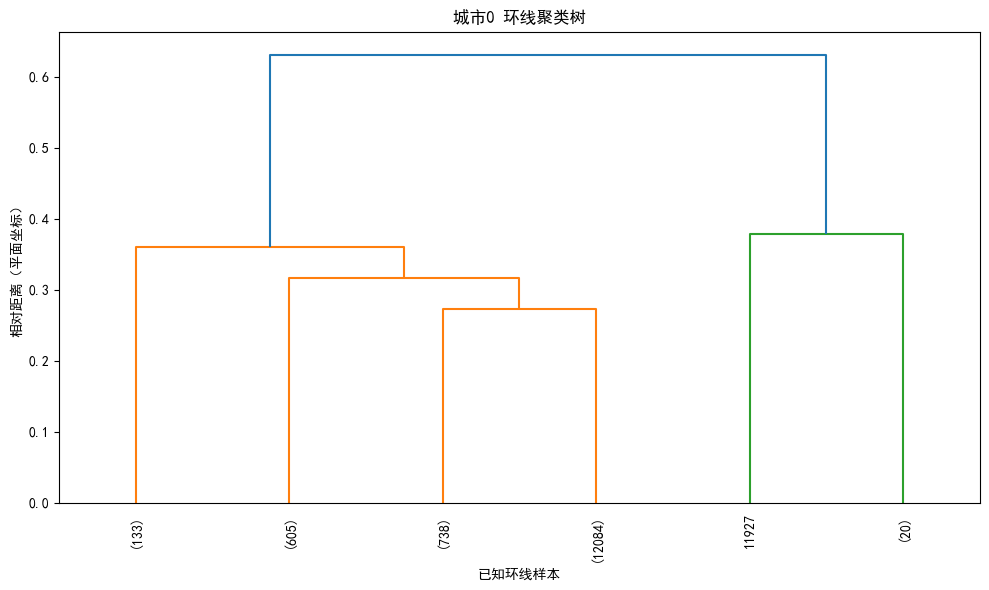

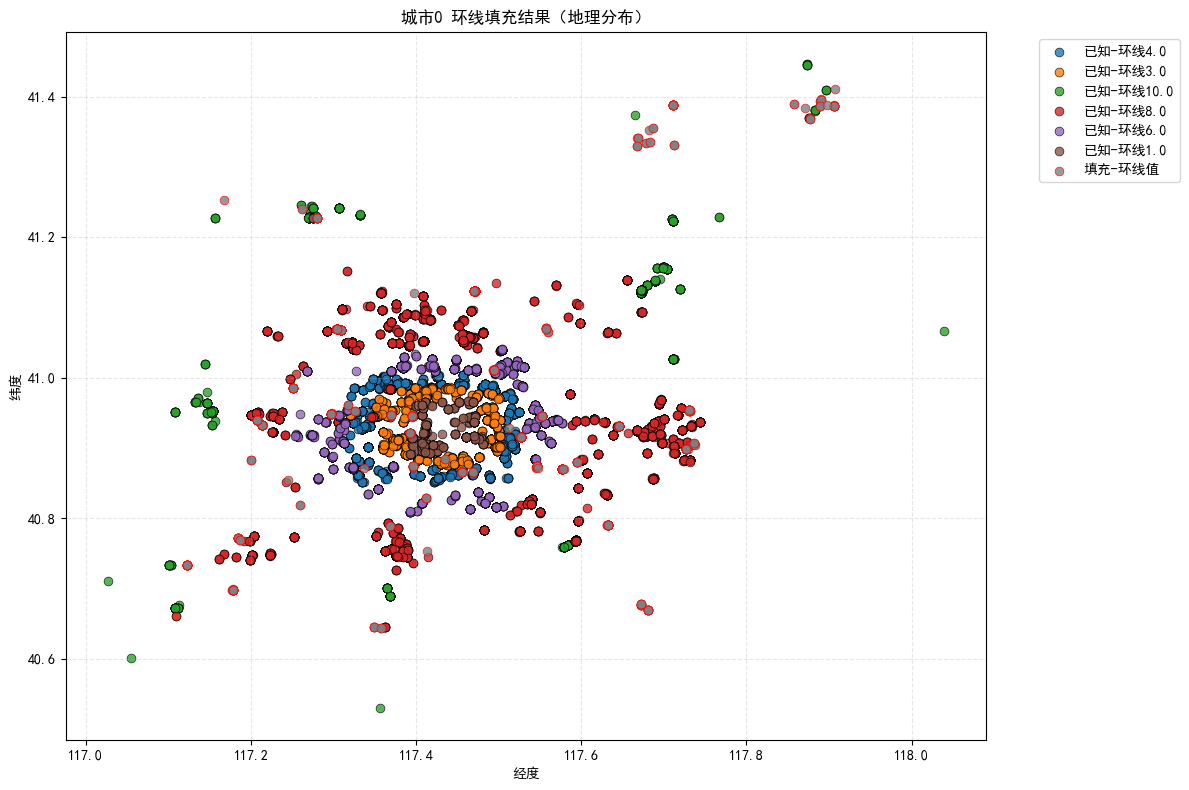


----- 处理城市0的区域 5.0 -----
区域样本数：360
区域环线分布：[np.float64(1.0), np.float64(3.0), np.float64(4.0)]


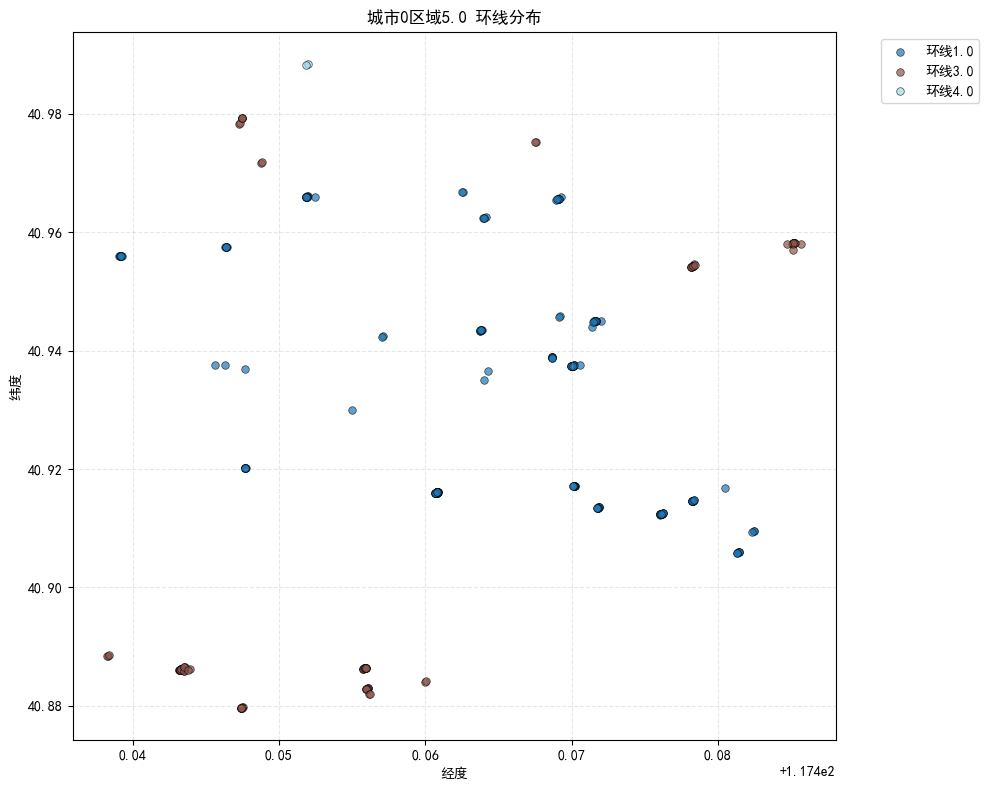

----- 处理区域5.0的板块 42.0 -----
板块样本数：1
板块环线分布：[np.float64(1.0)]


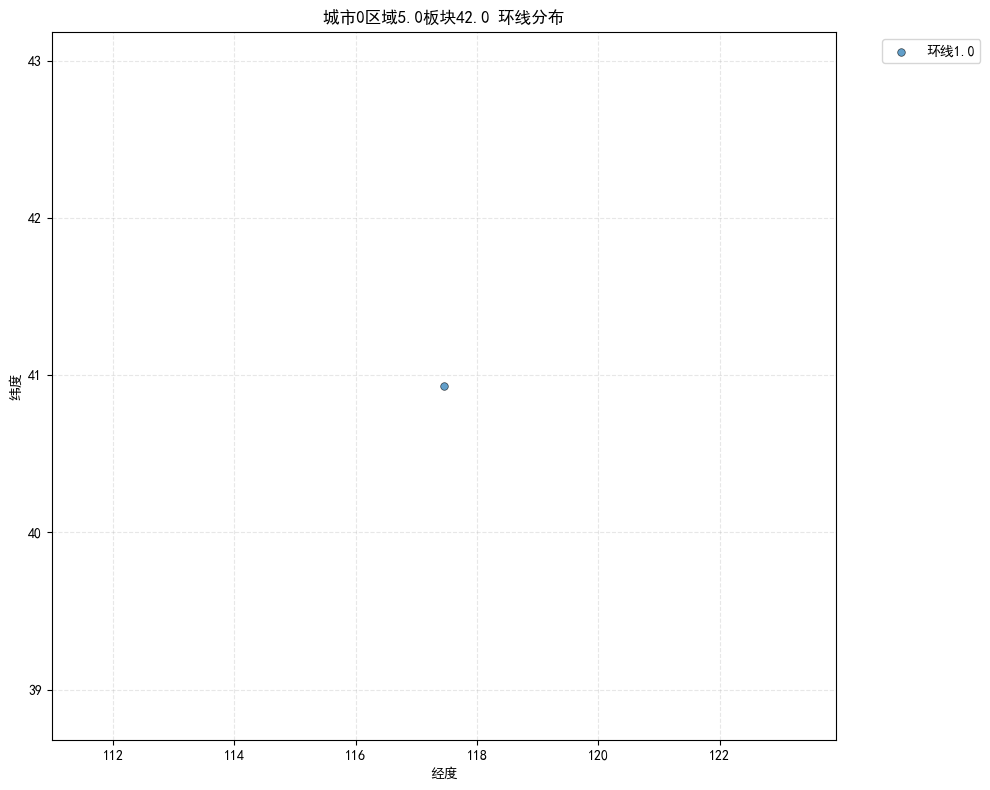


===== 处理城市 1 =====
样本总数：7725
已知环线样本：0
需填充样本：7725
警告：城市1无已知环线数据，无法填充
填充后有效样本数：0（完成率：0.00%）


C:\Users\杨\AppData\Local\Temp\ipykernel_25204\2000342585.py:142: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


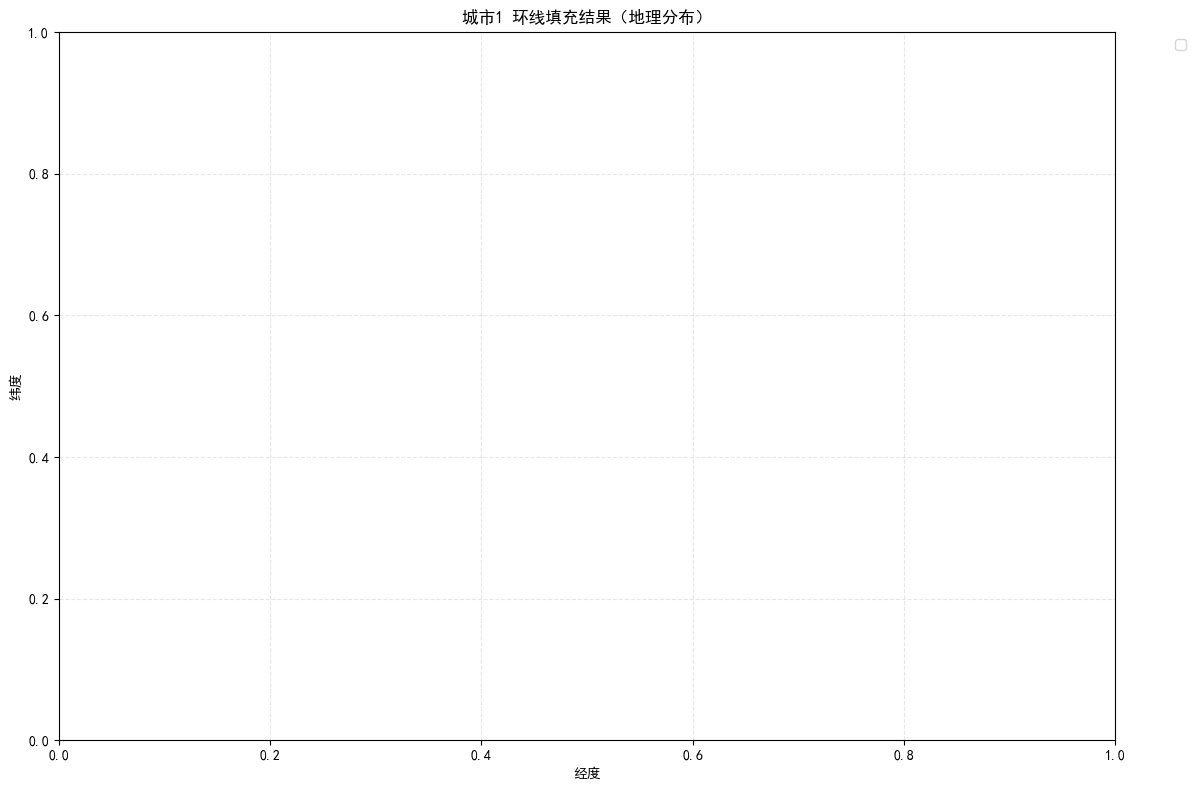


----- 处理城市1的区域 24.0 -----
区域样本数：1179
区域环线分布：[np.float64(nan)]


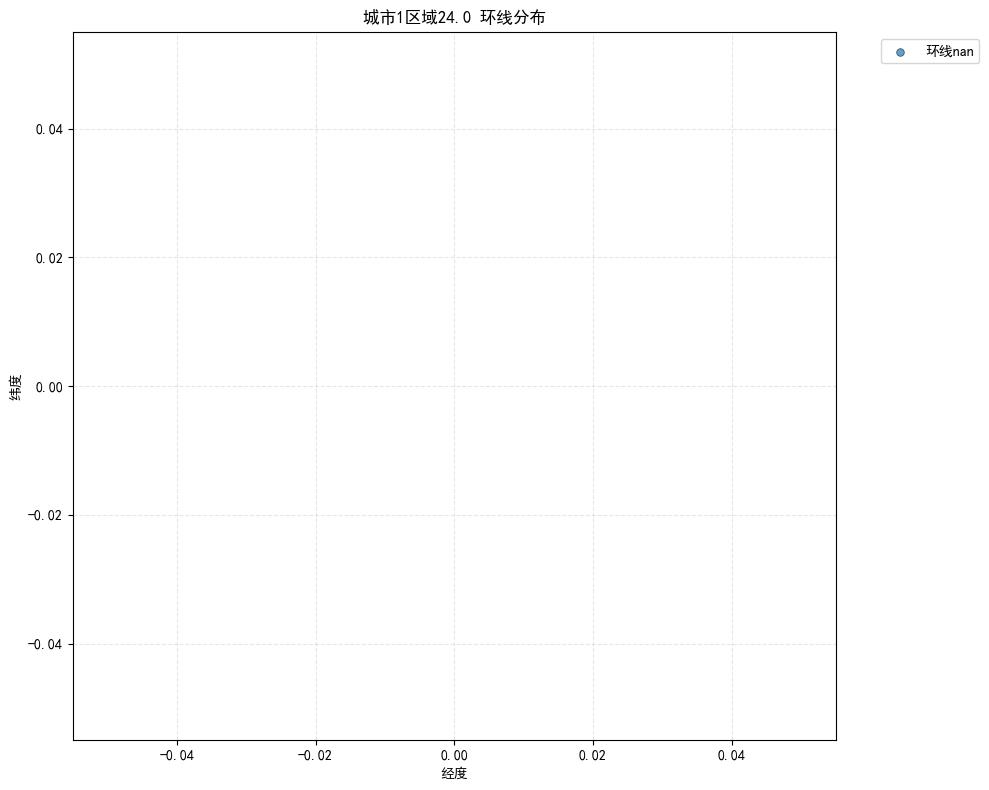

----- 处理区域24.0的板块 303.0 -----
板块样本数：1179
板块环线分布：[np.float64(nan)]


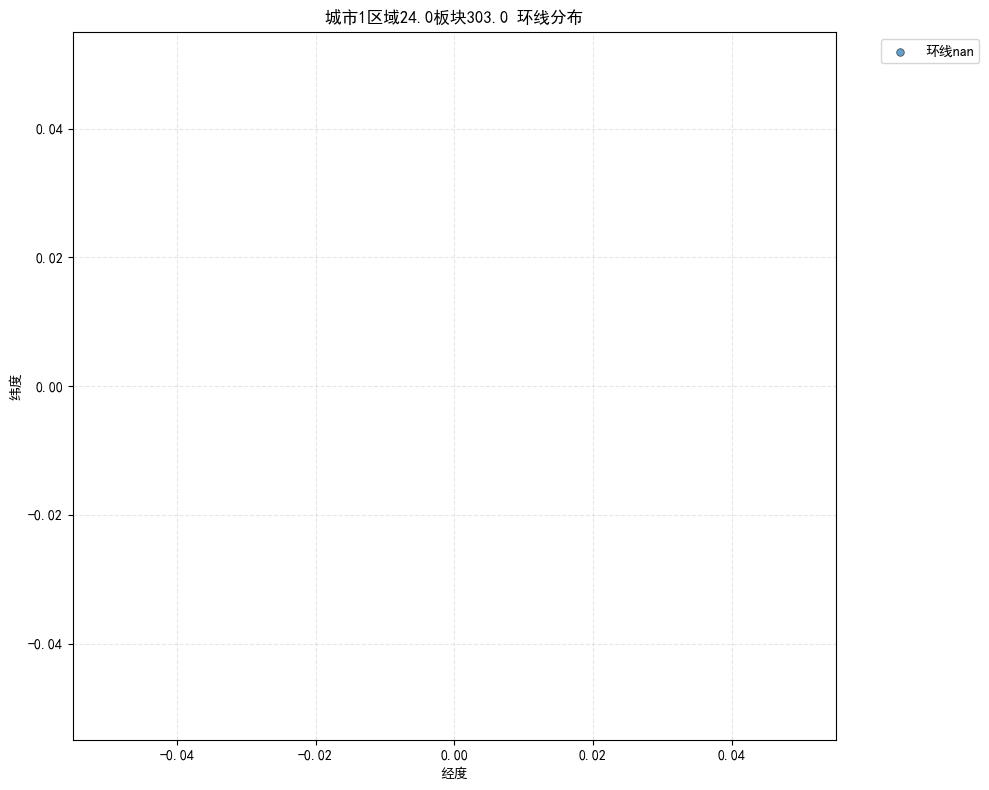


===== 处理城市 2 =====
样本总数：12059
已知环线样本：4019
需填充样本：8040


C:\Users\杨\AppData\Local\Temp\ipykernel_25204\2000342585.py:95: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dist = planar_distance(row['lat_rel'], row['lon_rel'], center[0], center[1])


填充后有效样本数：12059（完成率：100.00%）


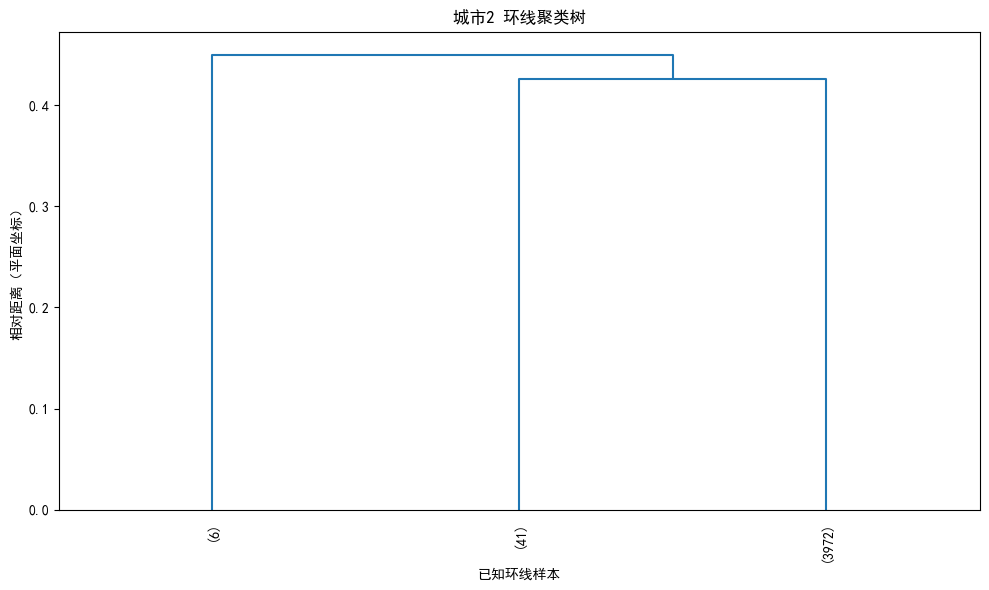

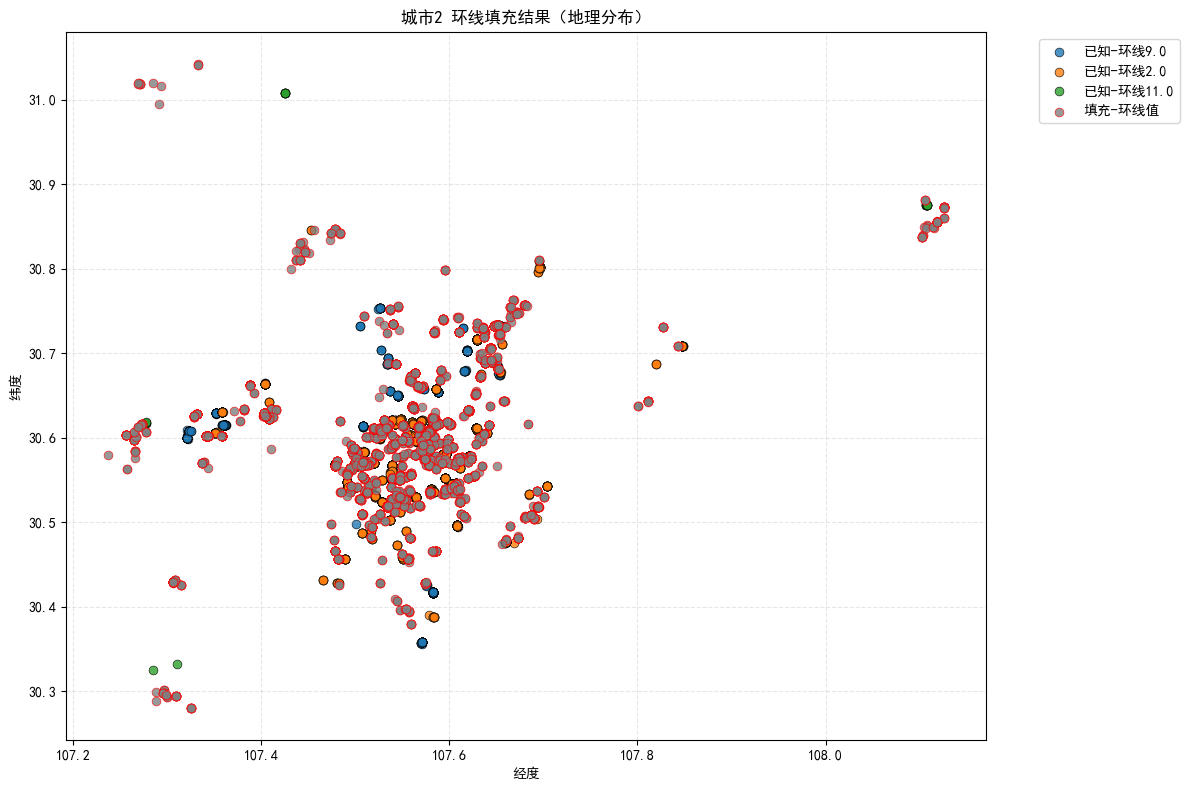


----- 处理城市2的区域 9.0 -----
区域样本数：1163
区域环线分布：[np.float64(2.0), np.float64(9.0)]


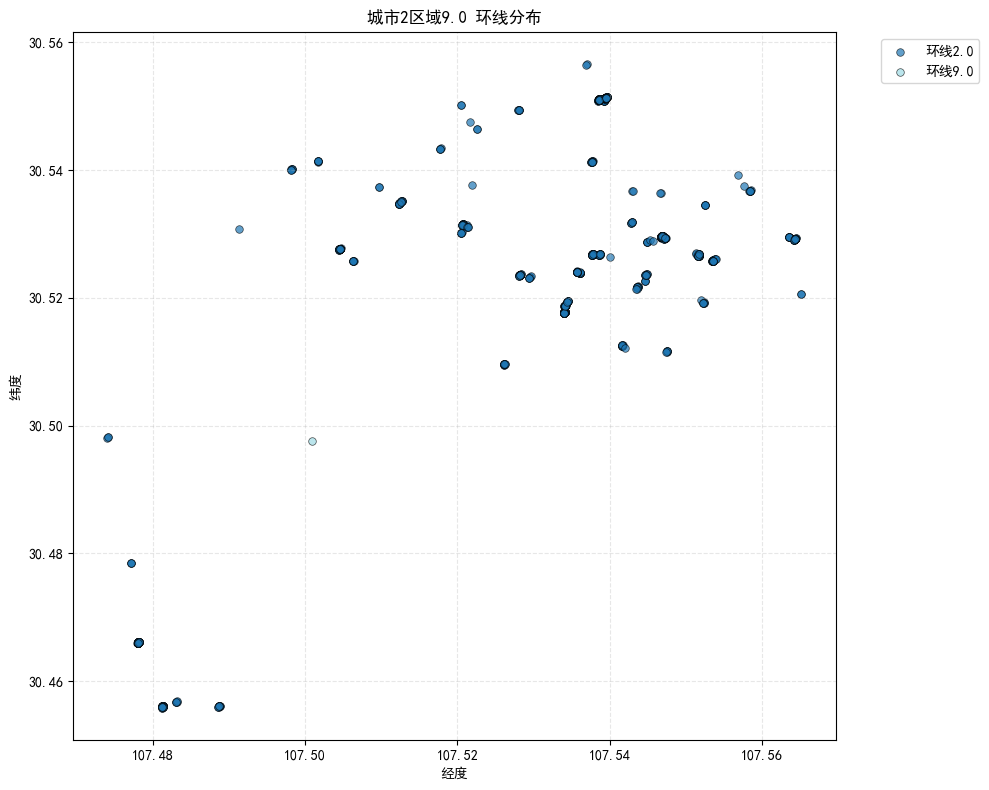

----- 处理区域9.0的板块 106.0 -----
板块样本数：43
板块环线分布：[np.float64(2.0)]


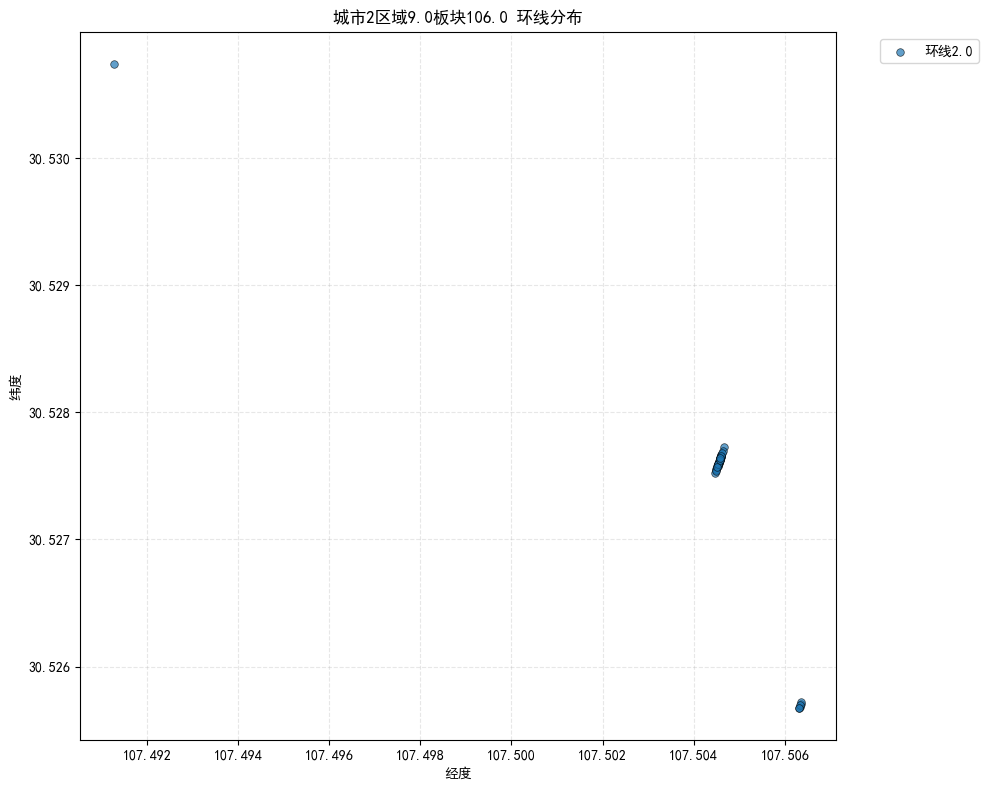


===== 处理城市 3 =====
样本总数：15550
已知环线样本：5
需填充样本：15545


C:\Users\杨\AppData\Local\Temp\ipykernel_25204\2000342585.py:95: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dist = planar_distance(row['lat_rel'], row['lon_rel'], center[0], center[1])


填充后有效样本数：15550（完成率：100.00%）


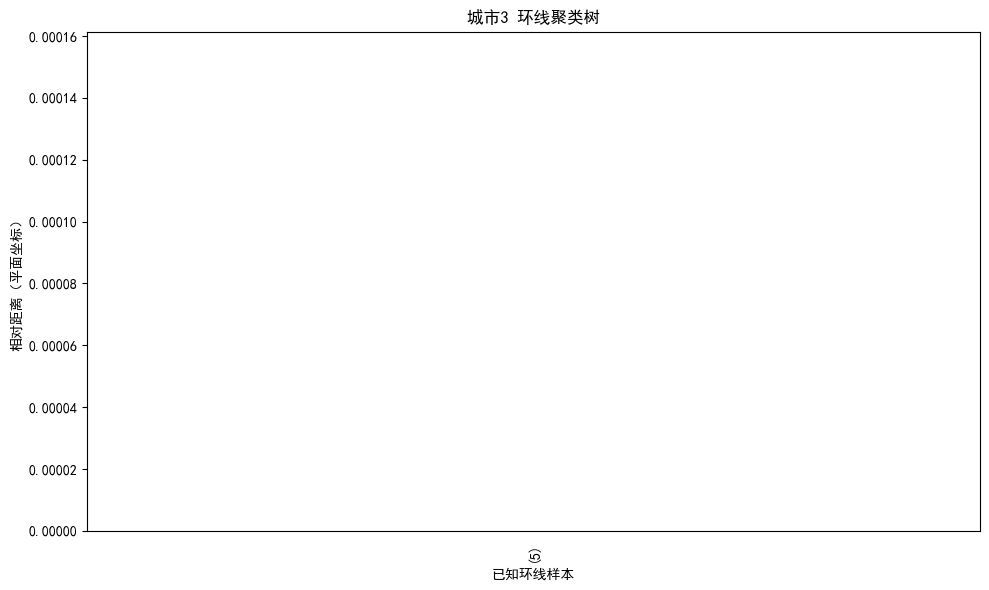

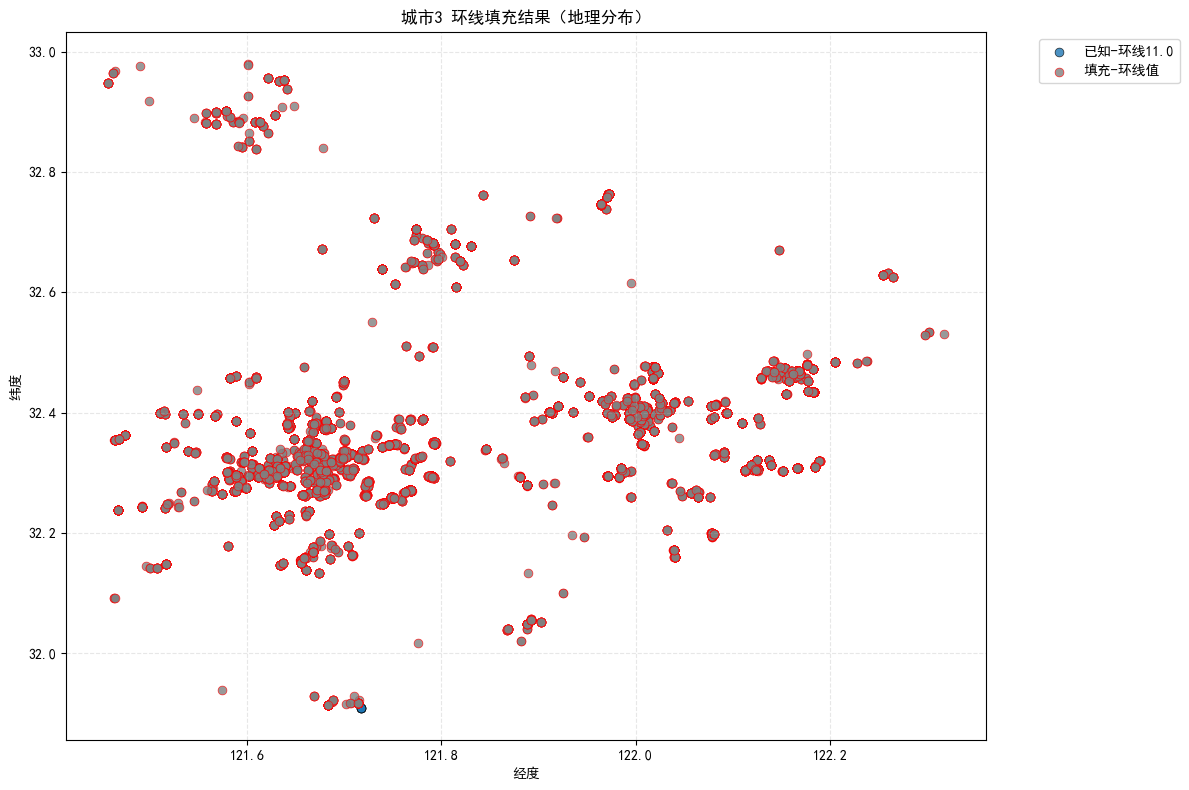


----- 处理城市3的区域 20.0 -----
区域样本数：1522
区域环线分布：[np.float64(11.0)]


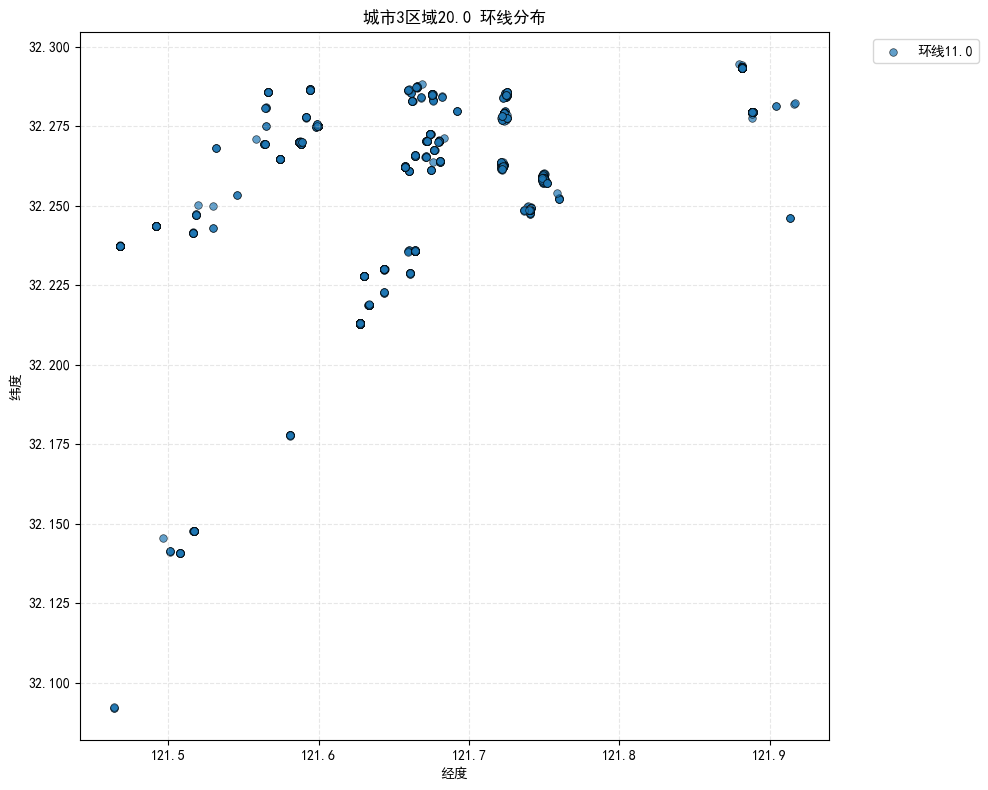

----- 处理区域20.0的板块 50.0 -----
板块样本数：3
板块环线分布：[np.float64(11.0)]


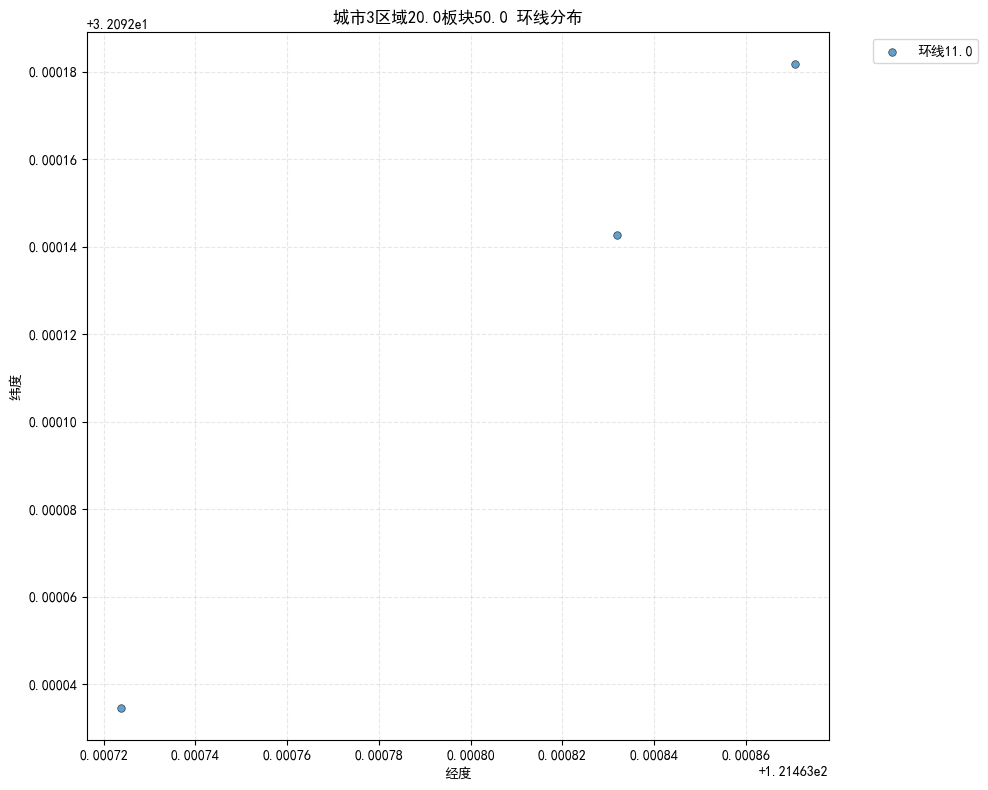


===== 处理城市 4 =====
样本总数：11796
已知环线样本：11032
需填充样本：764


C:\Users\杨\AppData\Local\Temp\ipykernel_25204\2000342585.py:95: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dist = planar_distance(row['lat_rel'], row['lon_rel'], center[0], center[1])


填充后有效样本数：11796（完成率：100.00%）


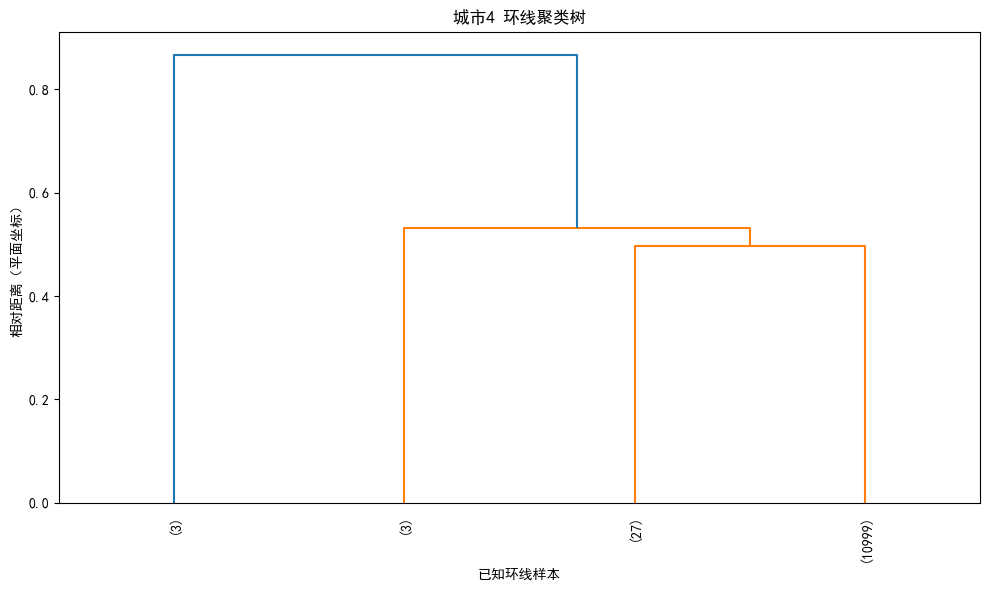

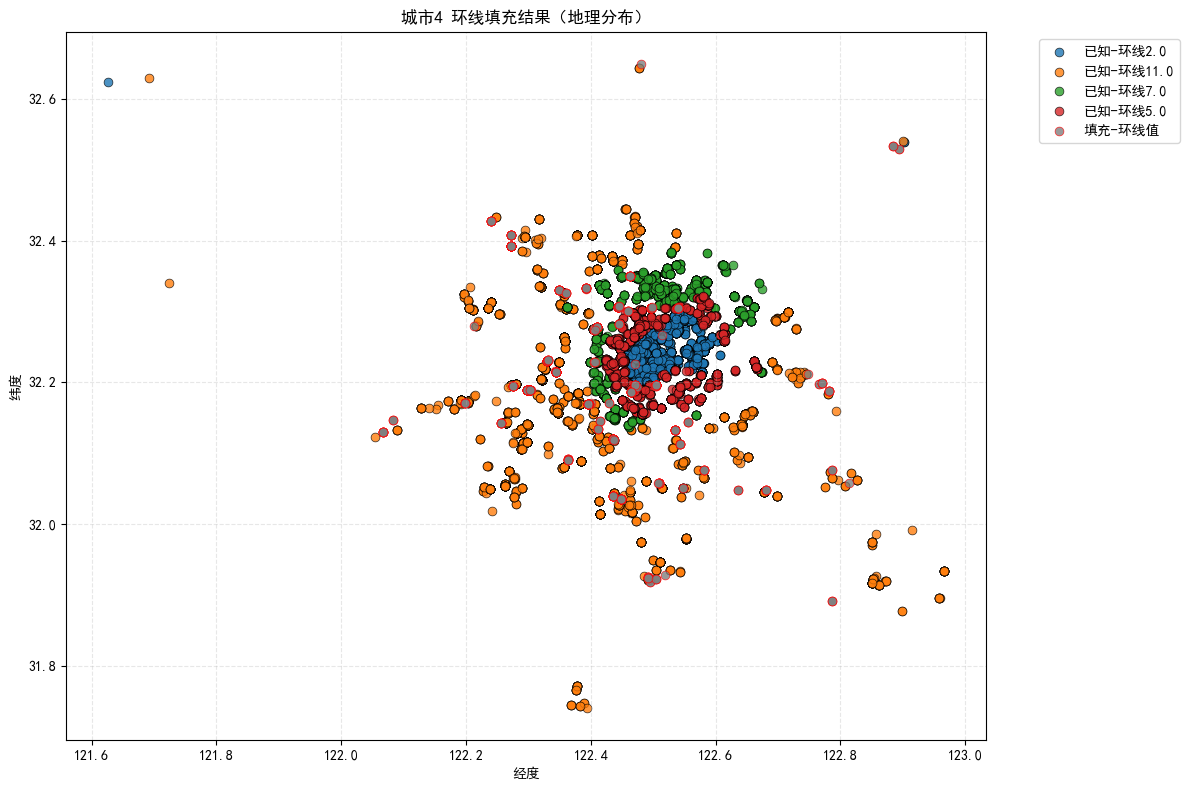


----- 处理城市4的区域 23.0 -----
区域样本数：533
区域环线分布：[np.float64(2.0), np.float64(7.0), np.float64(11.0)]


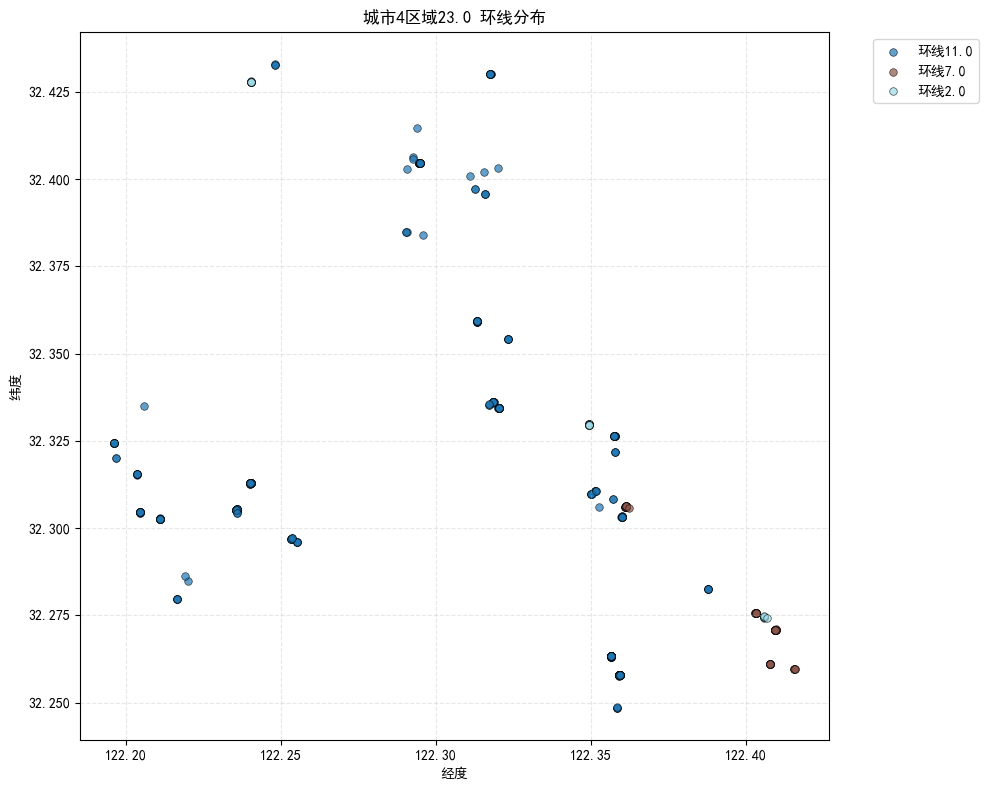

----- 处理区域23.0的板块 85.0 -----
板块样本数：64
板块环线分布：[np.float64(2.0), np.float64(7.0)]


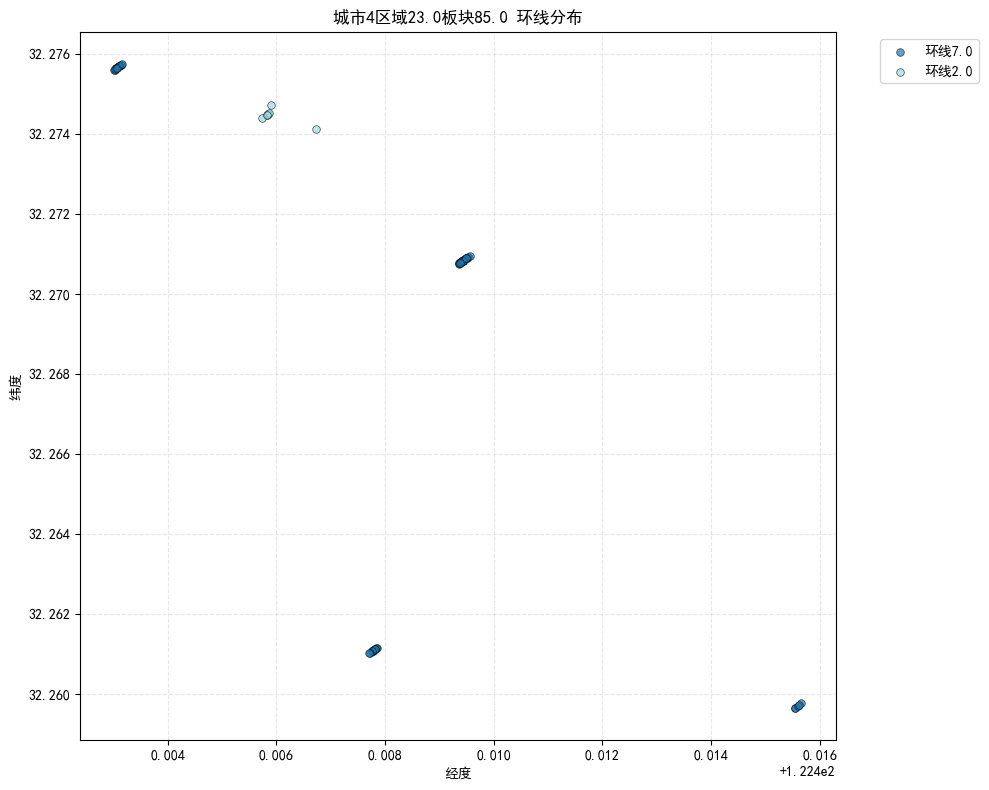


===== 处理城市 5 =====
样本总数：4077
已知环线样本：0
需填充样本：4077
警告：城市5无已知环线数据，无法填充
填充后有效样本数：0（完成率：0.00%）


C:\Users\杨\AppData\Local\Temp\ipykernel_25204\2000342585.py:142: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


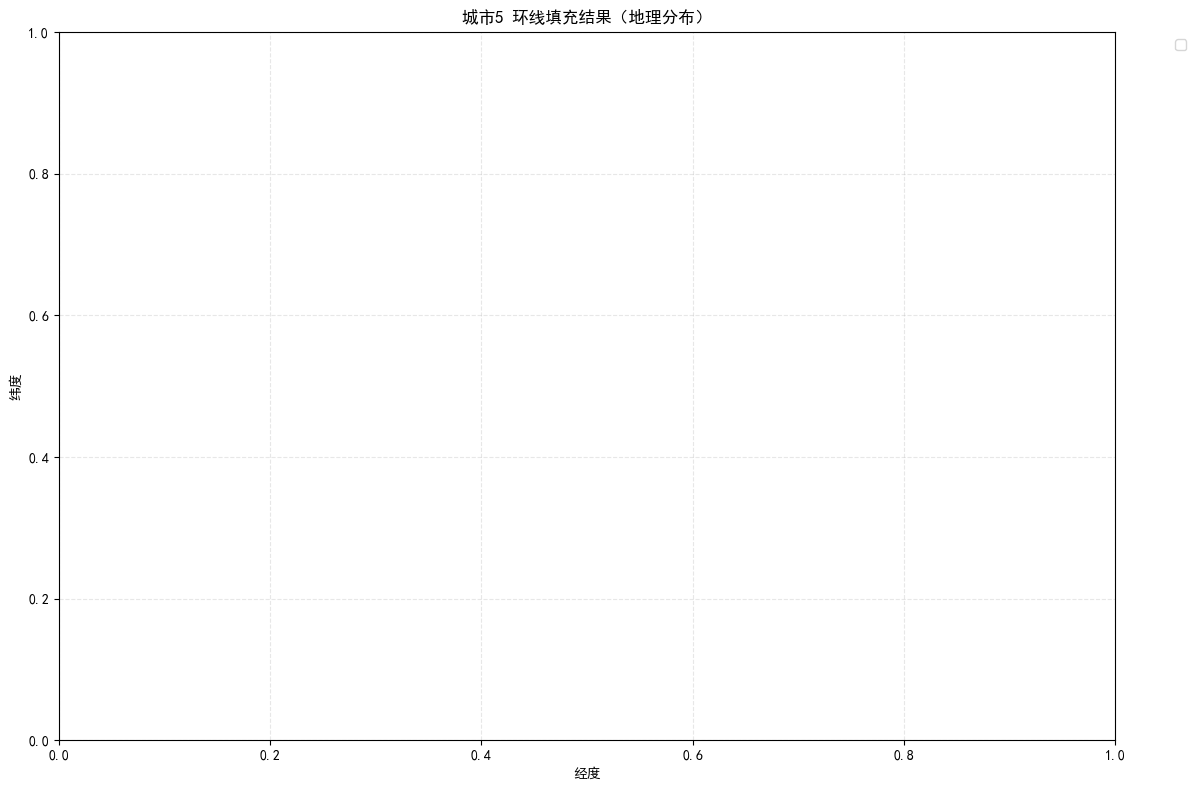


----- 处理城市5的区域 63.0 -----
区域样本数：534
区域环线分布：[np.float64(nan)]


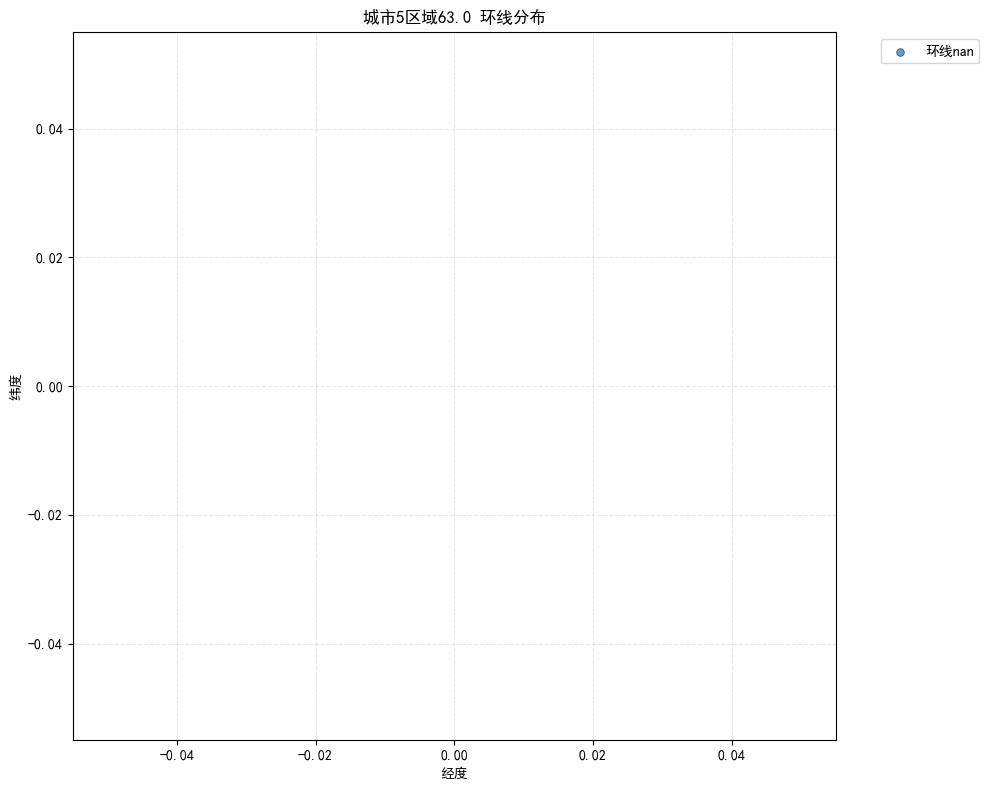

----- 处理区域63.0的板块 117.0 -----
板块样本数：283
板块环线分布：[np.float64(nan)]


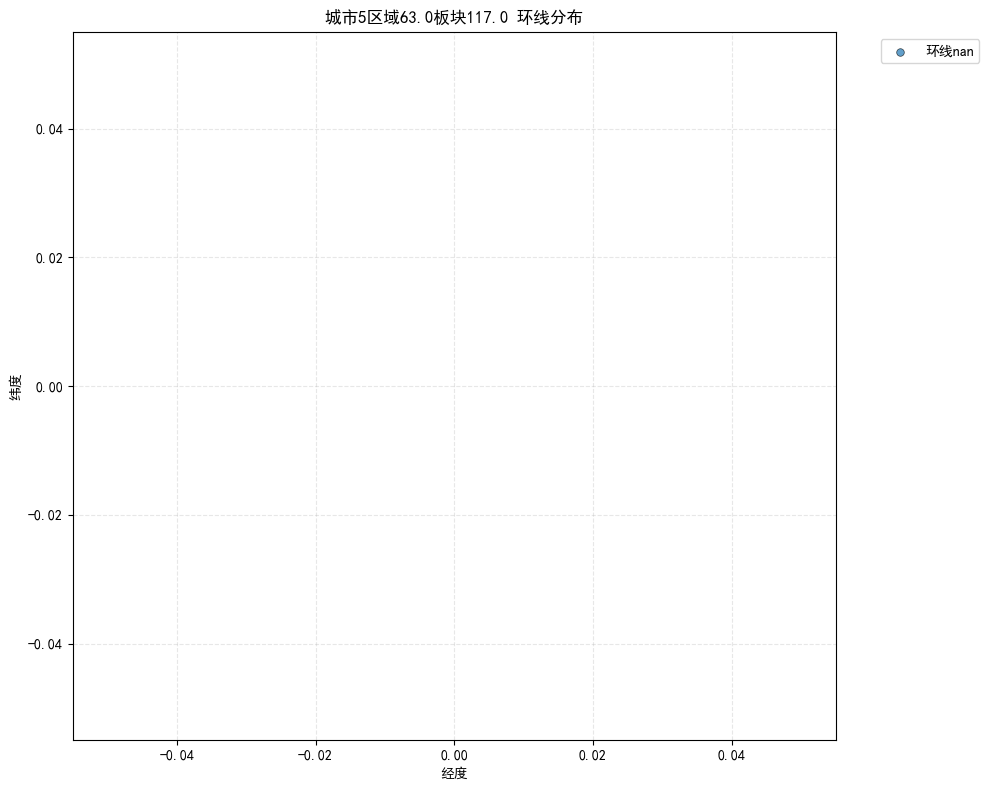


===== 处理城市 6 =====
样本总数：1020
已知环线样本：0
需填充样本：1020
警告：城市6无已知环线数据，无法填充
填充后有效样本数：0（完成率：0.00%）


C:\Users\杨\AppData\Local\Temp\ipykernel_25204\2000342585.py:142: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


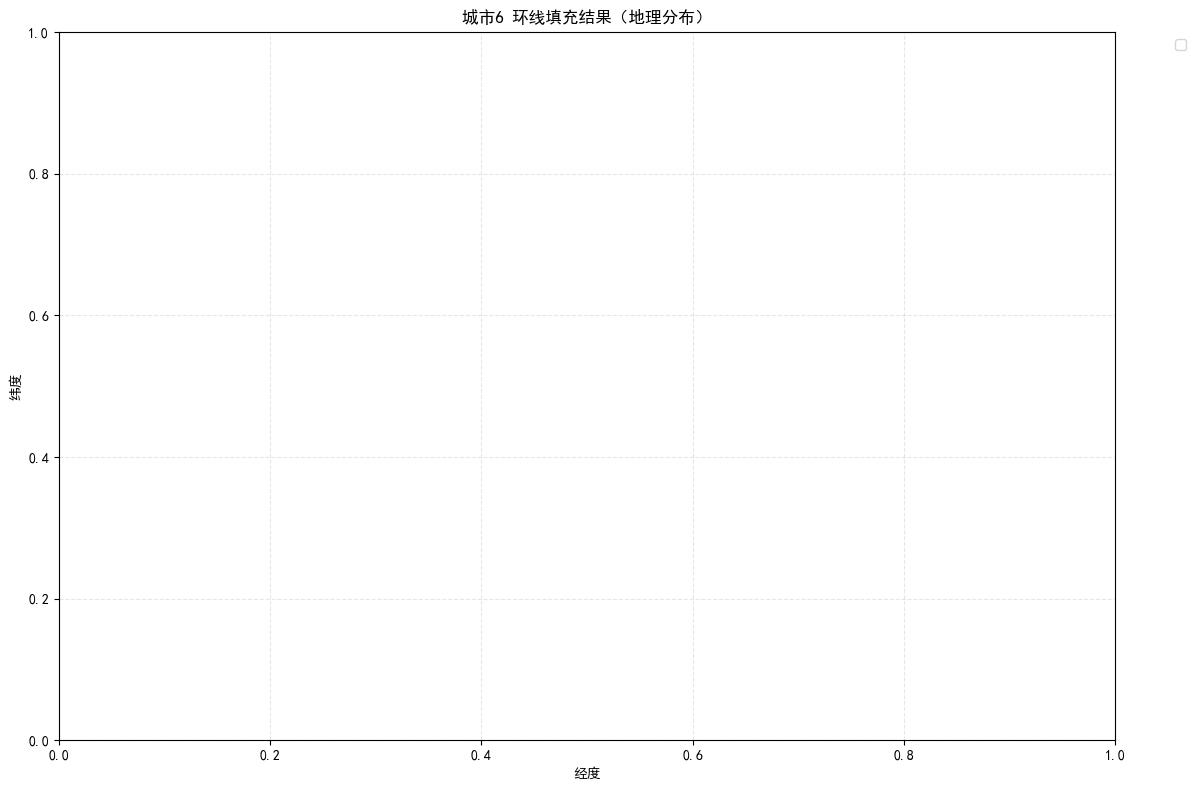


----- 处理城市6的区域 3.0 -----
区域样本数：62
区域环线分布：[np.float64(nan)]


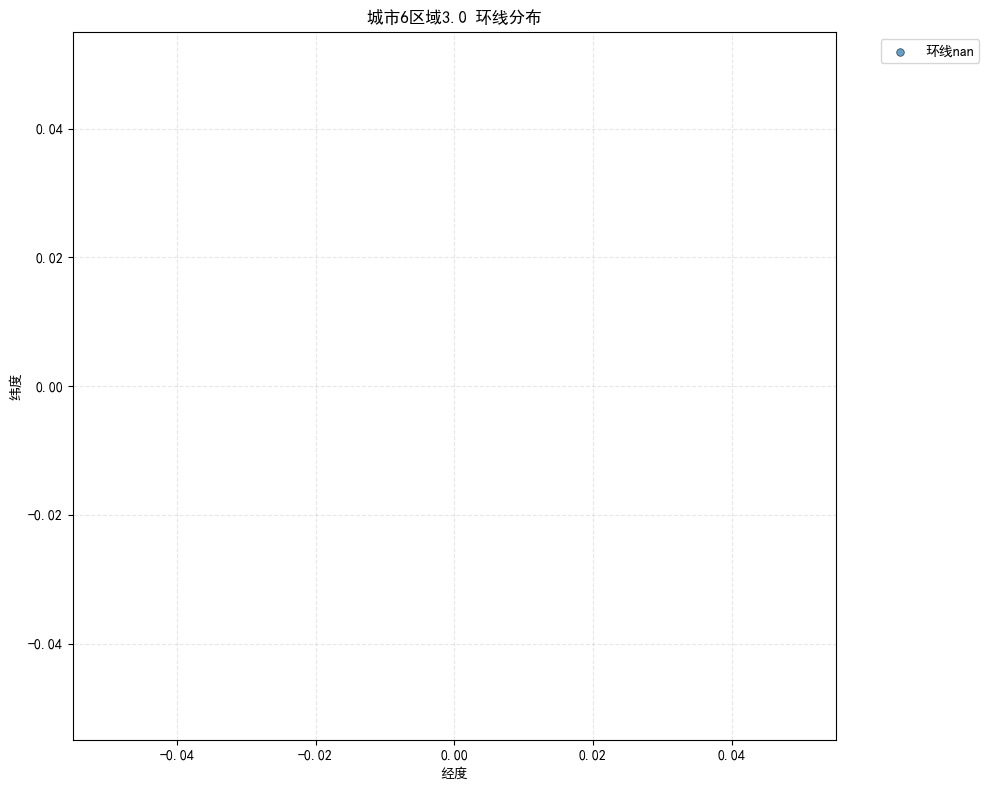

----- 处理区域3.0的板块 35.0 -----
板块样本数：62
板块环线分布：[np.float64(nan)]


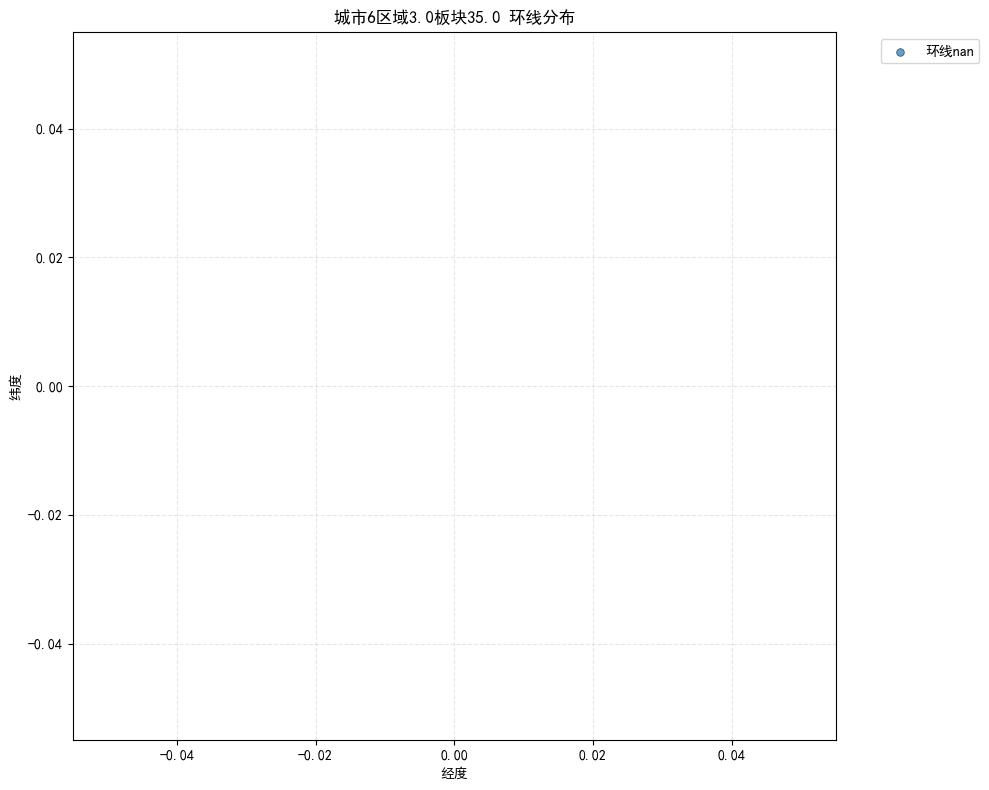


===== 处理城市 7 =====
样本总数：10211
已知环线样本：598
需填充样本：9613


C:\Users\杨\AppData\Local\Temp\ipykernel_25204\2000342585.py:95: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dist = planar_distance(row['lat_rel'], row['lon_rel'], center[0], center[1])


填充后有效样本数：10211（完成率：100.00%）


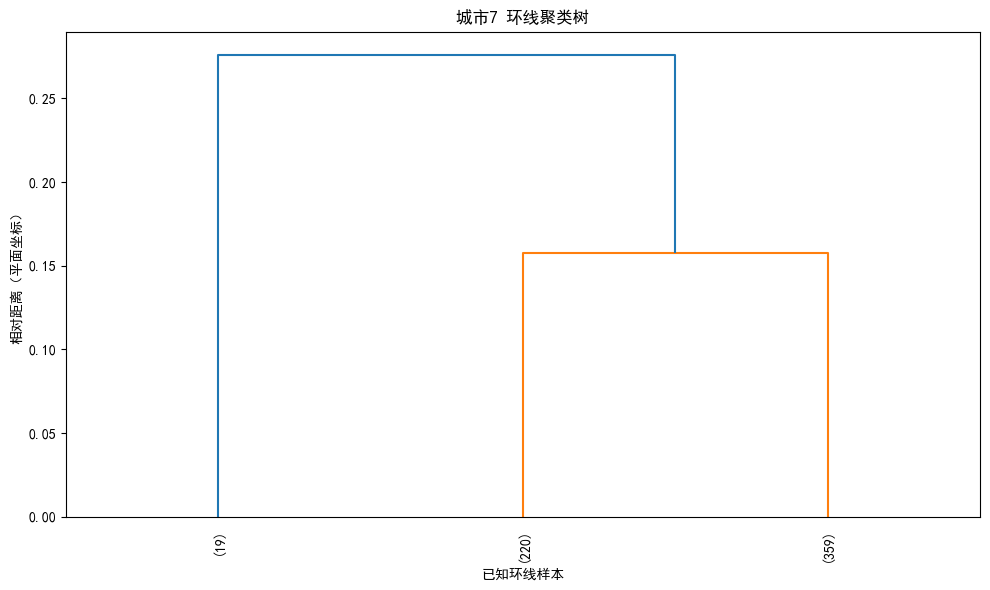

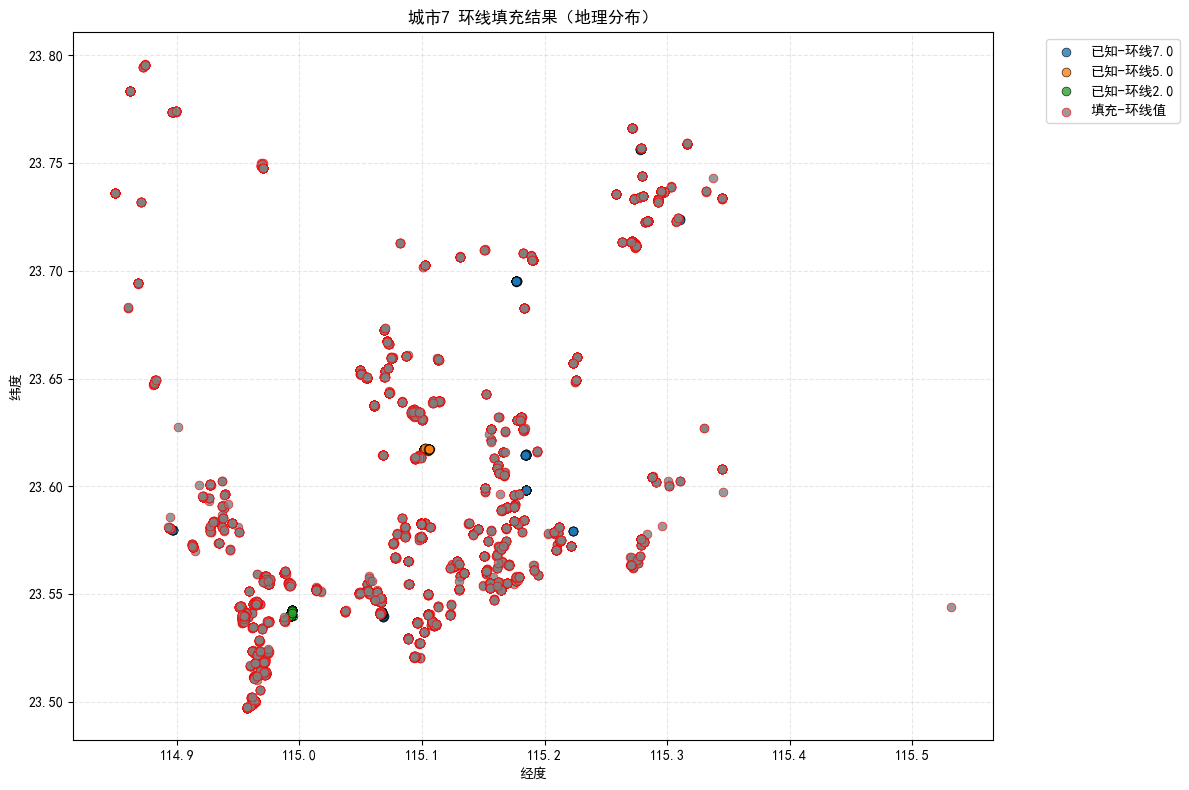


----- 处理城市7的区域 13.0 -----
区域样本数：108
区域环线分布：[np.float64(7.0)]


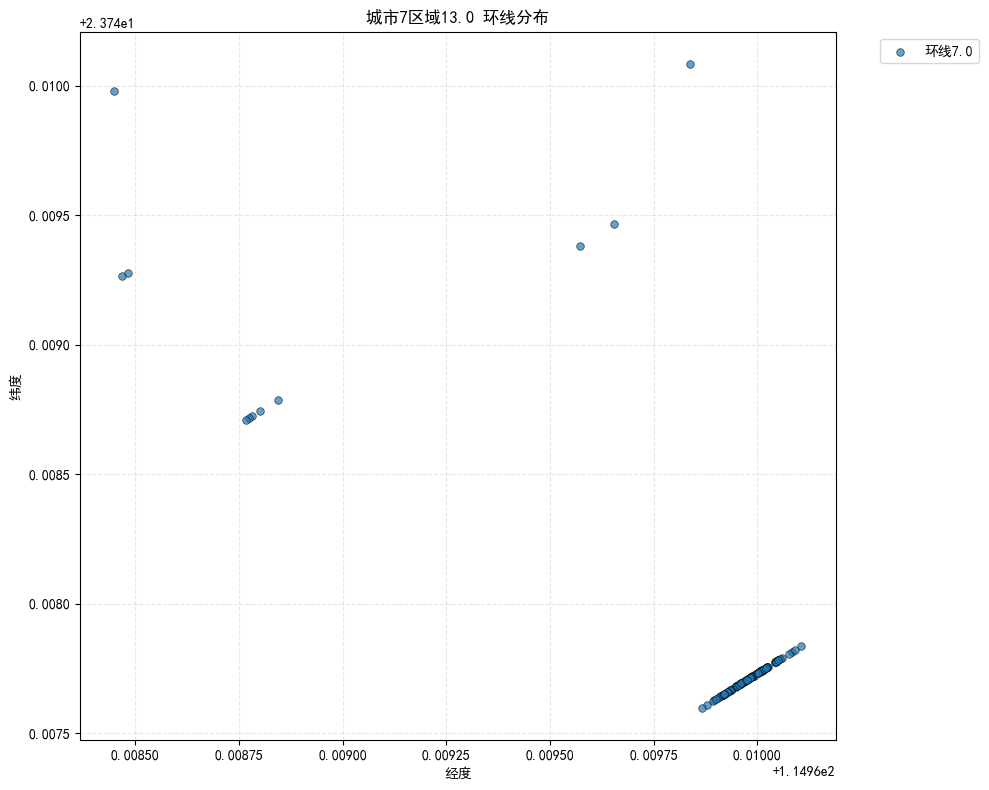

----- 处理区域13.0的板块 147.0 -----
板块样本数：108
板块环线分布：[np.float64(7.0)]


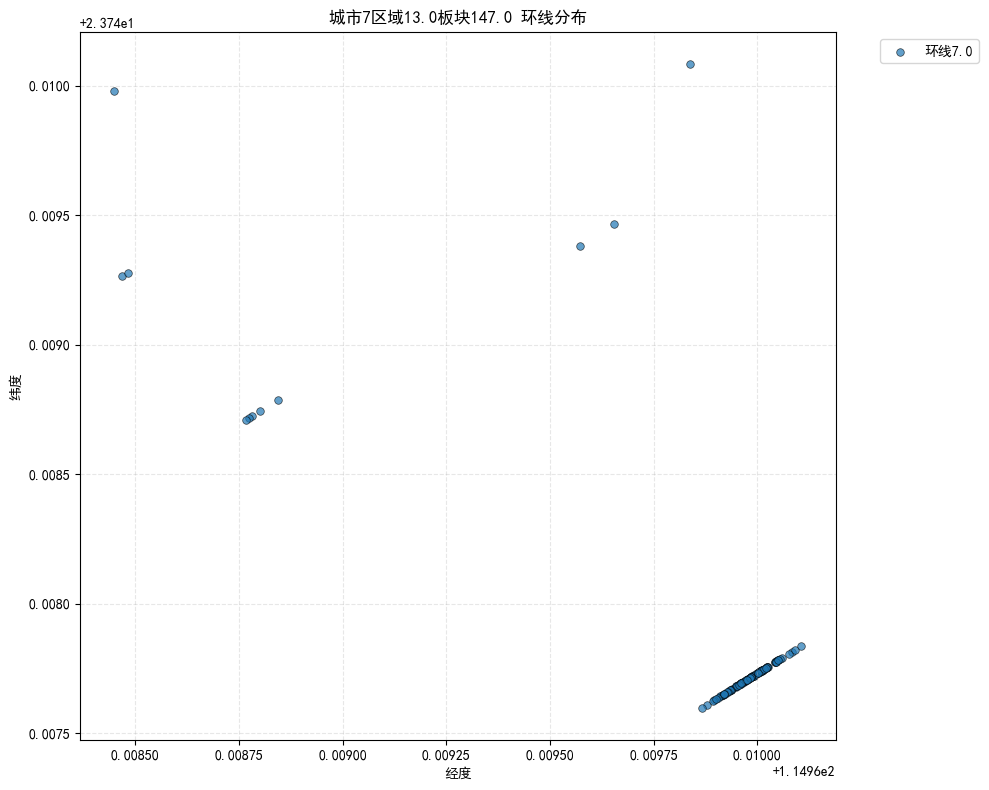


===== 处理城市 8 =====
样本总数：7274
已知环线样本：0
需填充样本：7274
警告：城市8无已知环线数据，无法填充
填充后有效样本数：0（完成率：0.00%）


C:\Users\杨\AppData\Local\Temp\ipykernel_25204\2000342585.py:142: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


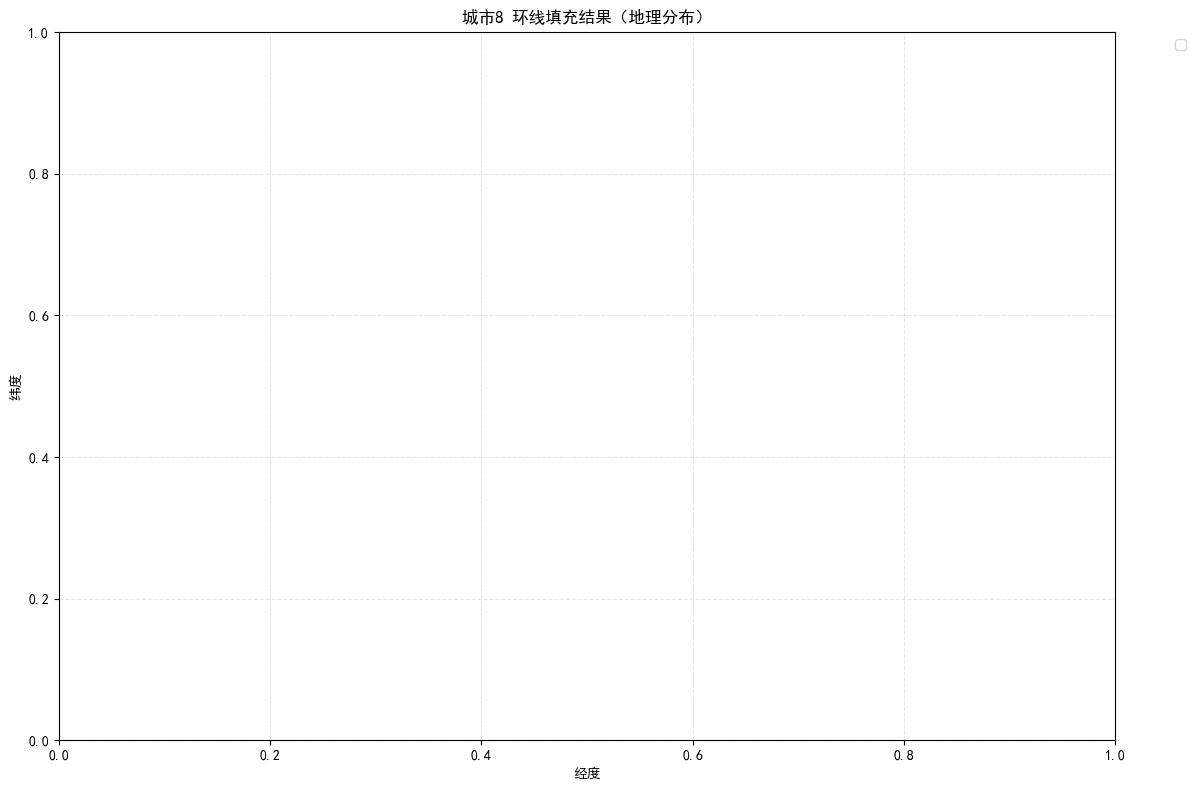


----- 处理城市8的区域 10.0 -----
区域样本数：857
区域环线分布：[np.float64(nan)]


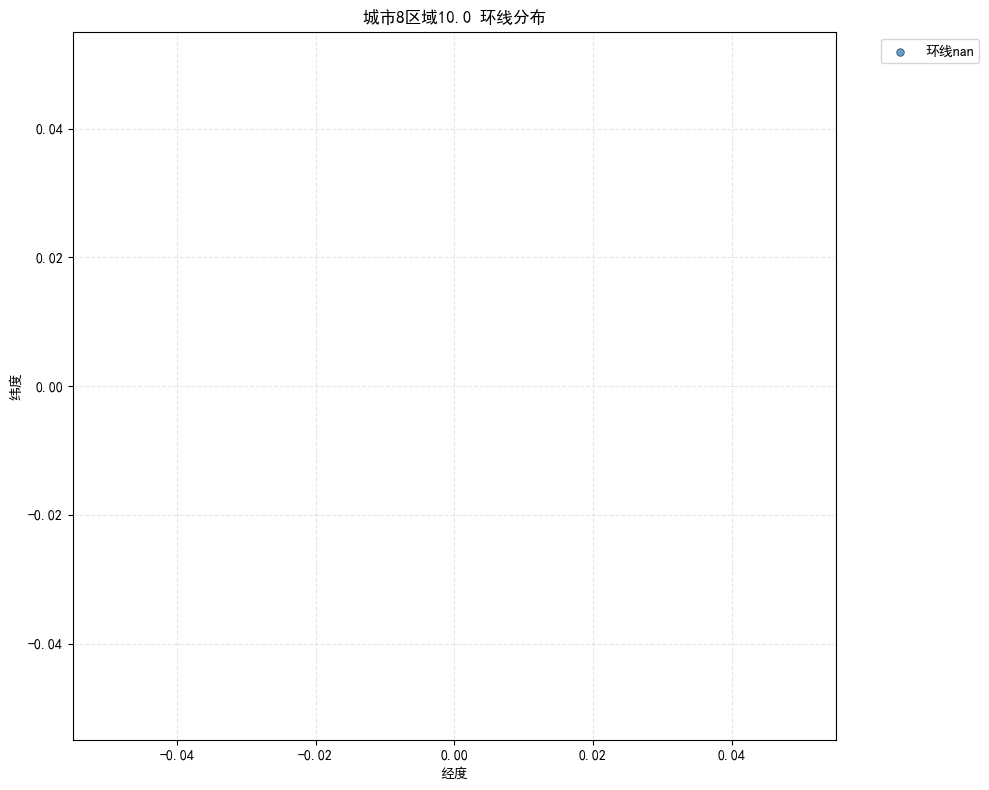

----- 处理区域10.0的板块 84.0 -----
板块样本数：42
板块环线分布：[np.float64(nan)]


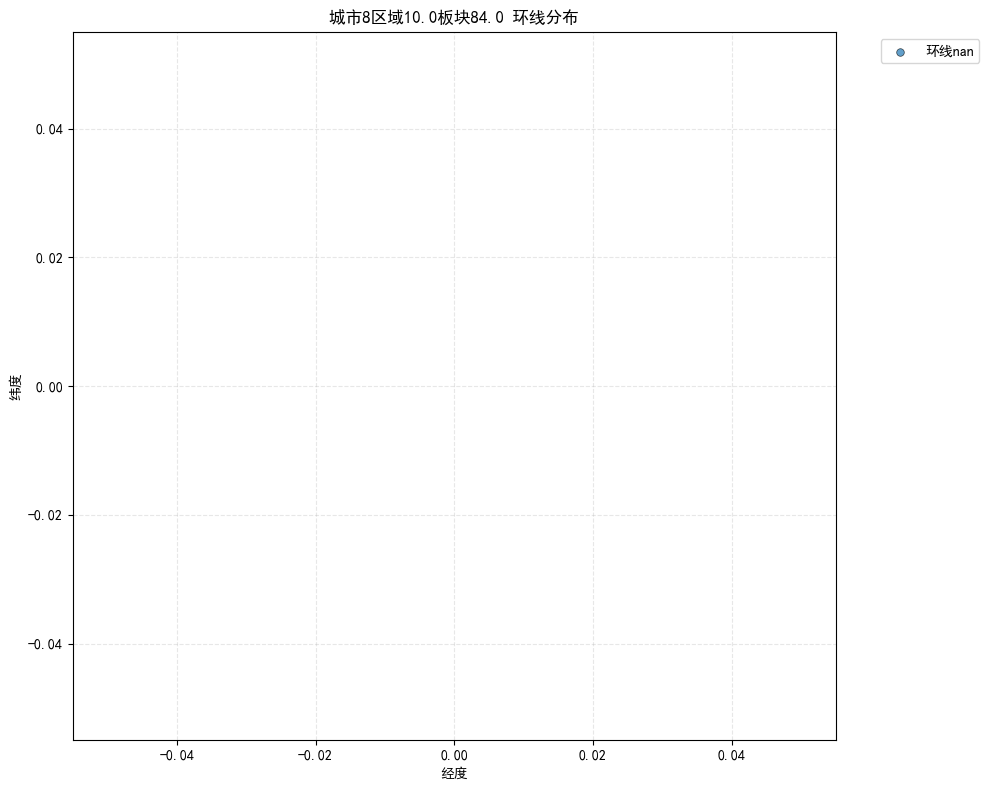


===== 处理城市 9 =====
样本总数：1255
已知环线样本：0
需填充样本：1255
警告：城市9无已知环线数据，无法填充
填充后有效样本数：0（完成率：0.00%）


C:\Users\杨\AppData\Local\Temp\ipykernel_25204\2000342585.py:142: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


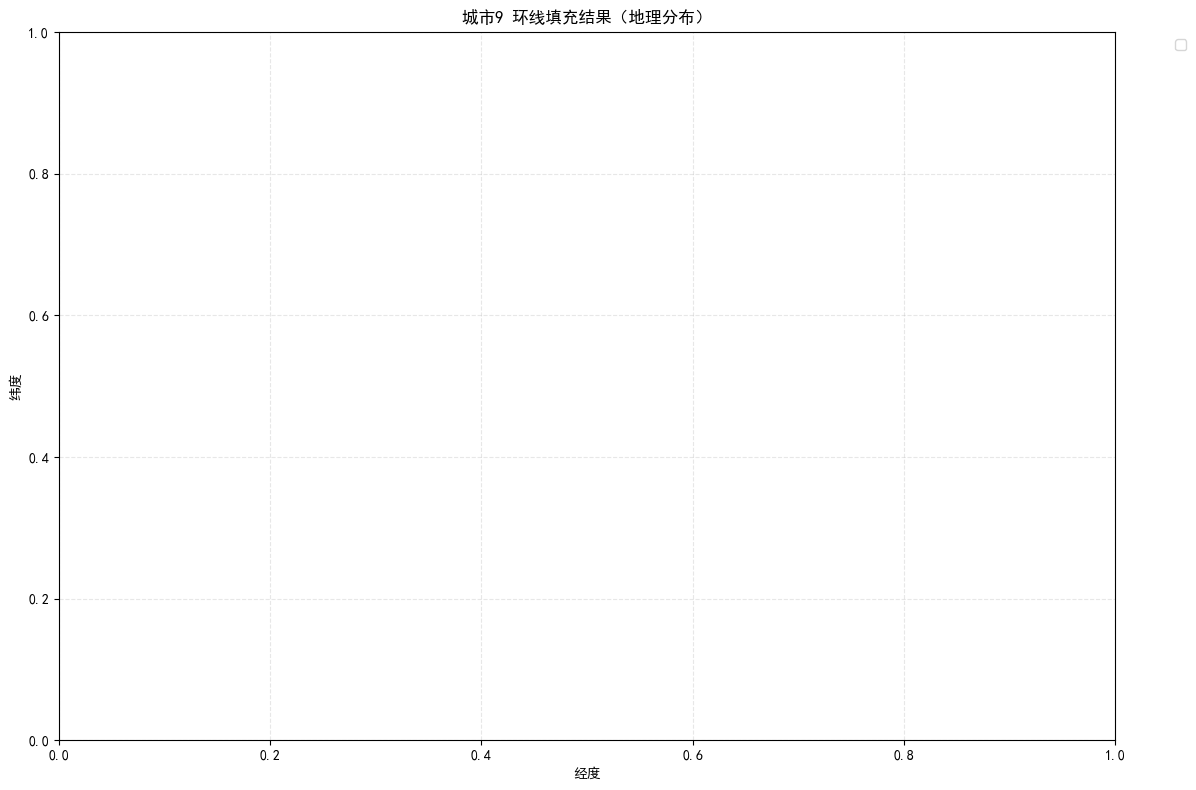


----- 处理城市9的区域 nan -----
区域样本数：0
区域环线分布：[]


C:\Users\杨\AppData\Local\Temp\ipykernel_25204\2000342585.py:159: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


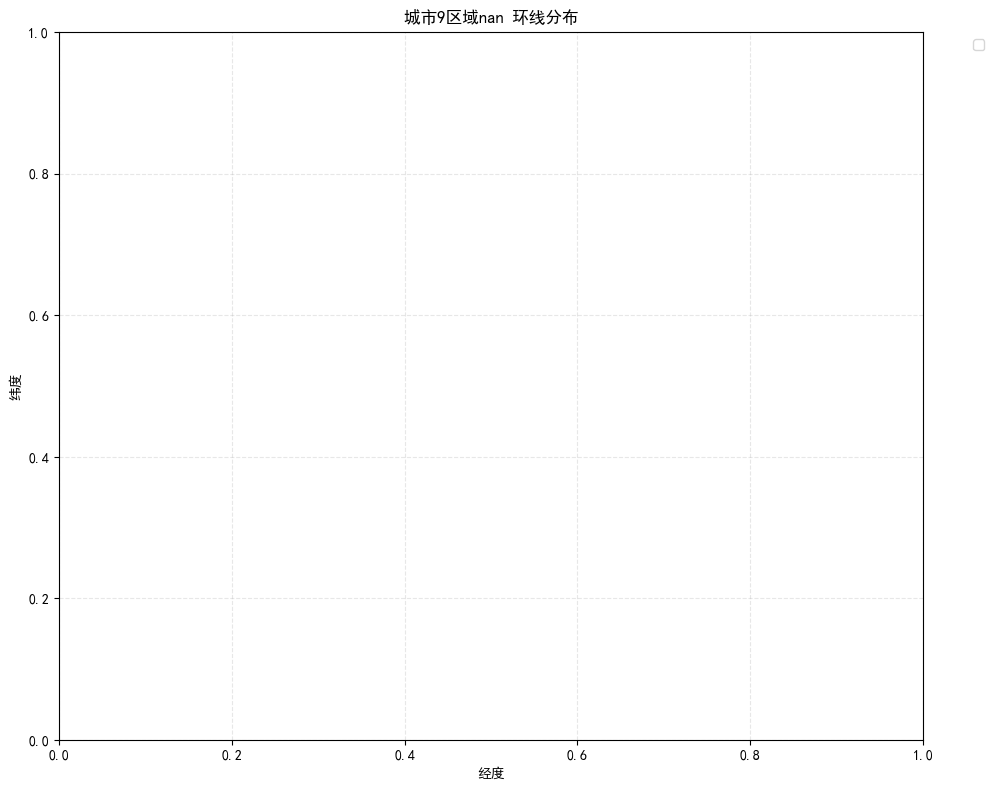


===== 处理城市 10 =====
样本总数：12979
已知环线样本：0
需填充样本：12979
警告：城市10无已知环线数据，无法填充
填充后有效样本数：0（完成率：0.00%）


C:\Users\杨\AppData\Local\Temp\ipykernel_25204\2000342585.py:142: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


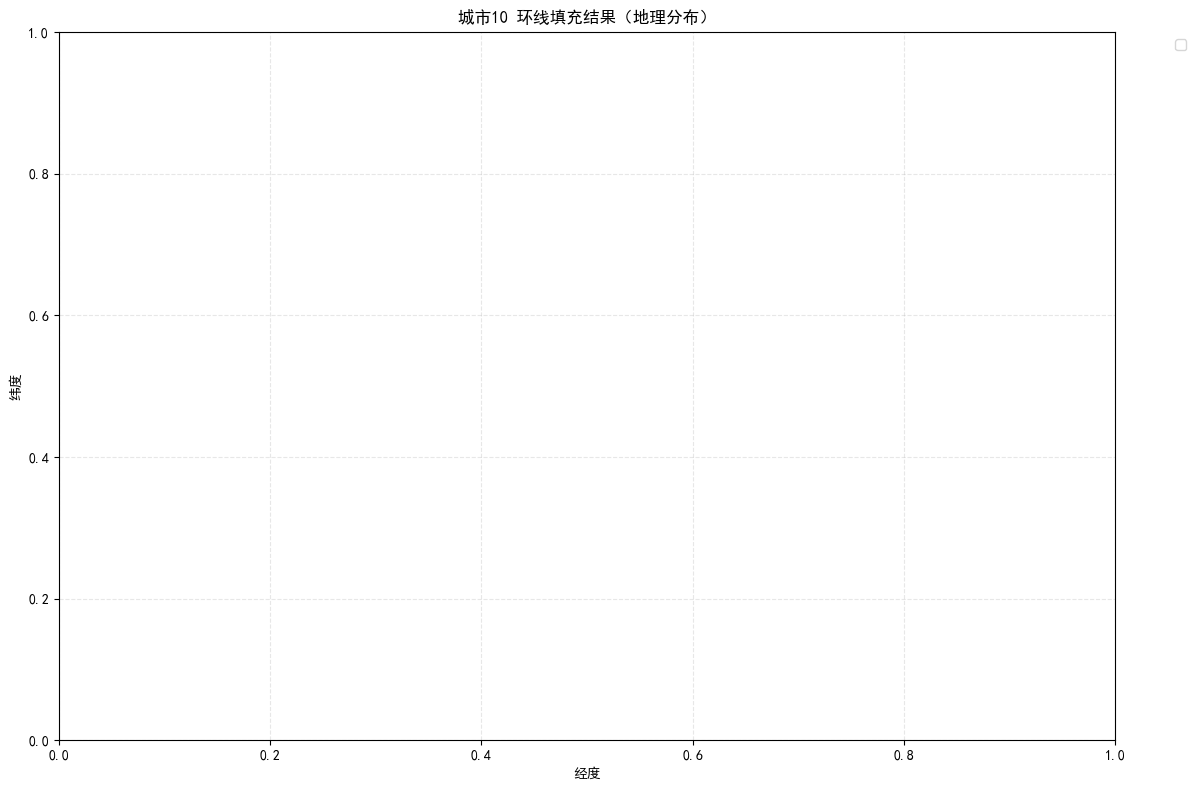


----- 处理城市10的区域 12.0 -----
区域样本数：119
区域环线分布：[np.float64(nan)]


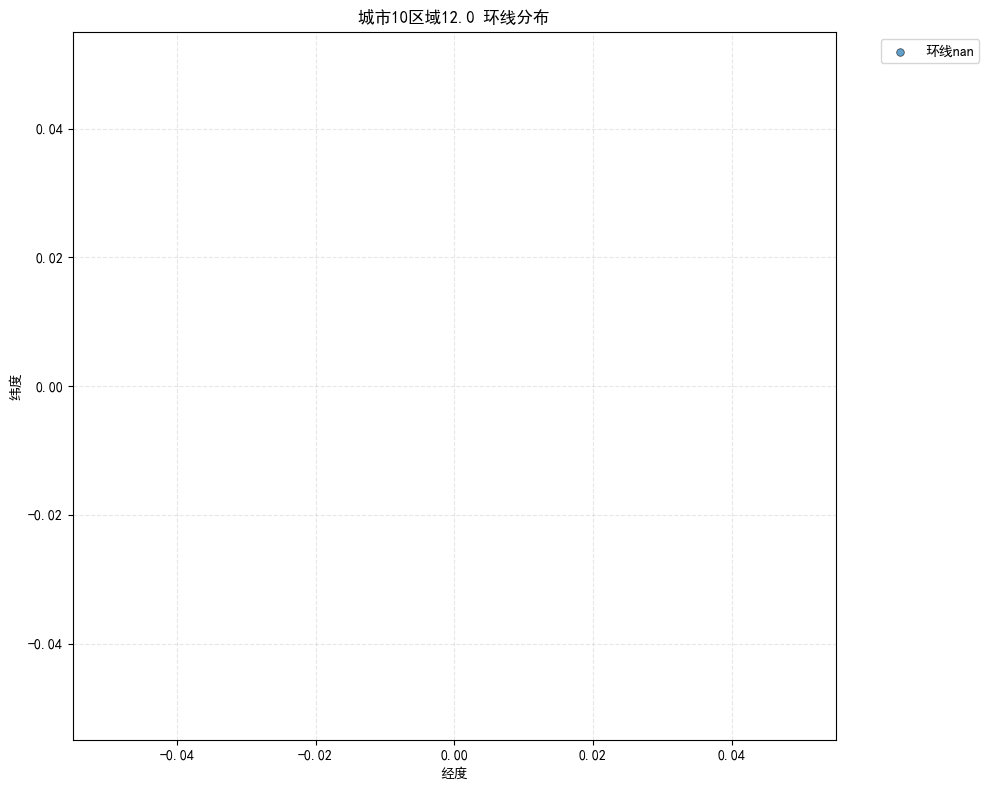

----- 处理区域12.0的板块 385.0 -----
板块样本数：103
板块环线分布：[np.float64(nan)]


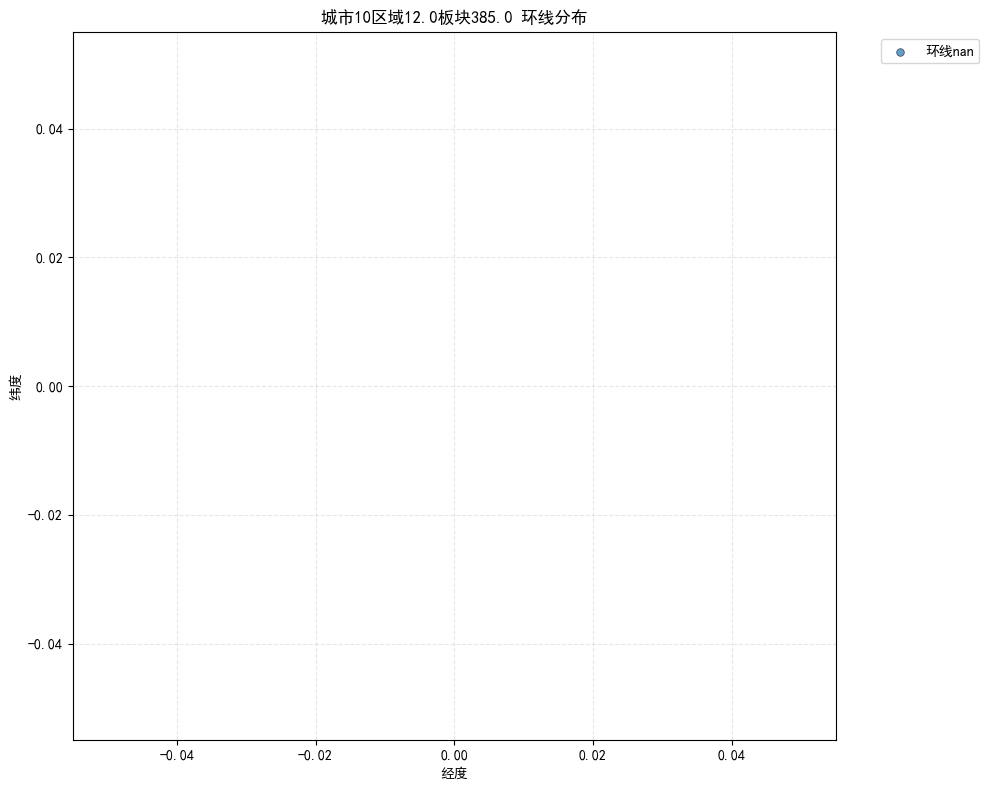


===== 处理城市 11 =====
样本总数：411
已知环线样本：0
需填充样本：411
警告：城市11无已知环线数据，无法填充
填充后有效样本数：0（完成率：0.00%）


C:\Users\杨\AppData\Local\Temp\ipykernel_25204\2000342585.py:142: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


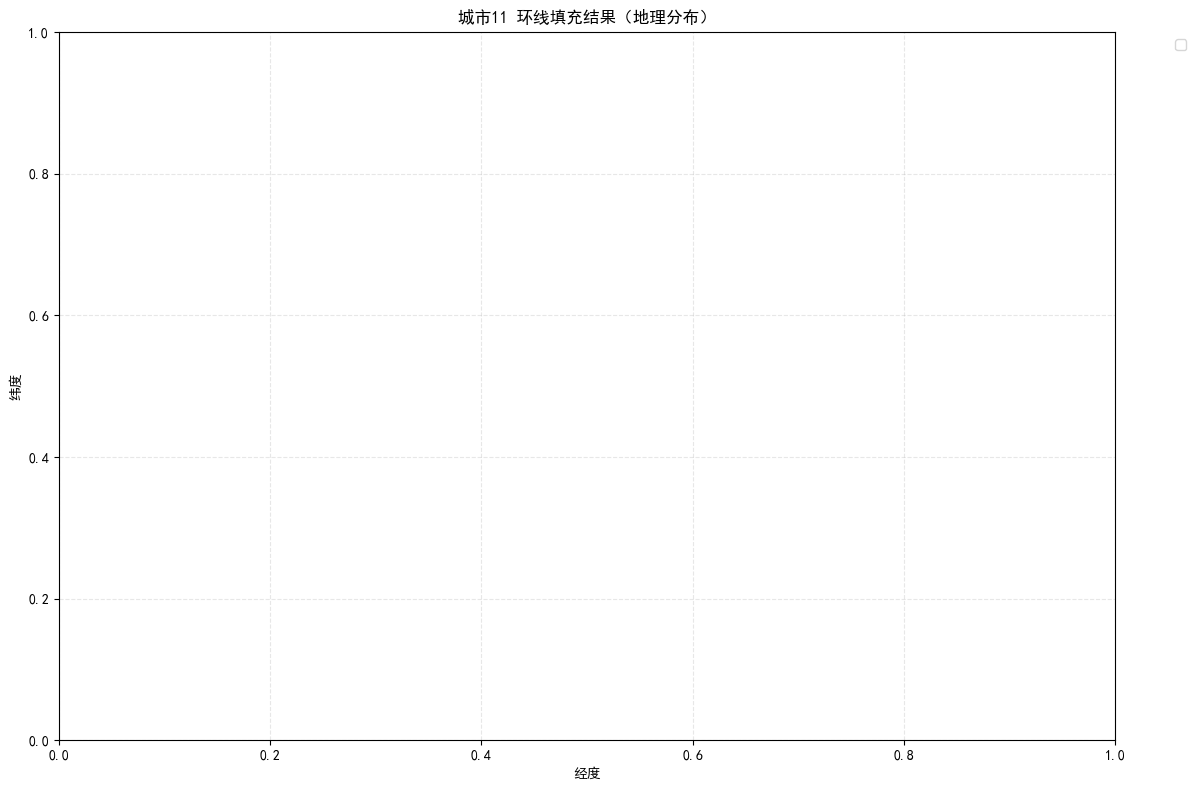


----- 处理城市11的区域 84.0 -----
区域样本数：255
区域环线分布：[np.float64(nan)]


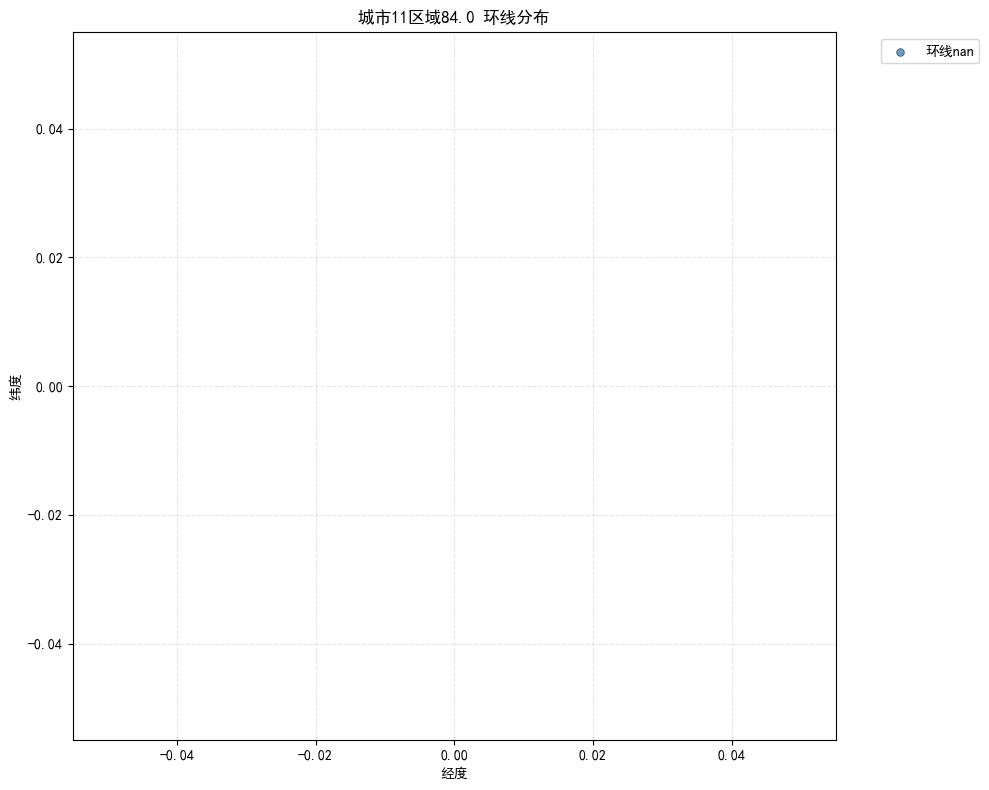

----- 处理区域84.0的板块 716.0 -----
板块样本数：255
板块环线分布：[np.float64(nan)]


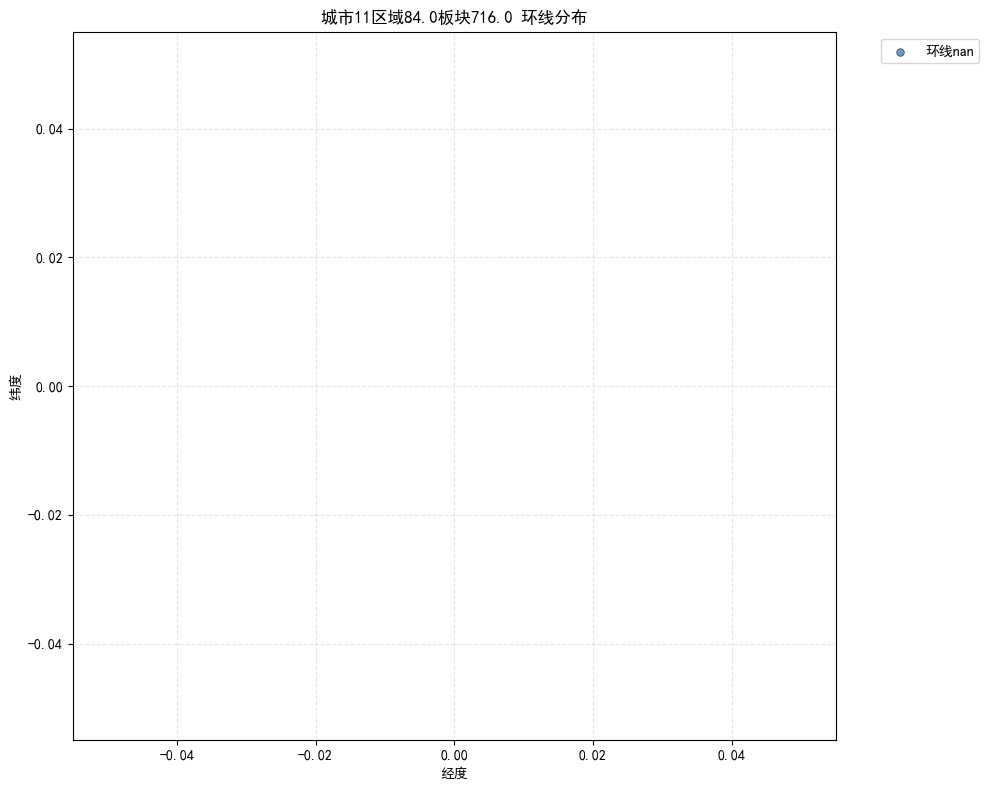


===== 所有城市处理完成：全局统计 =====
全局总样本数：98898
全局填充后有效样本数：64157
全局填充完成率：64.87%

各环线数值最终分布：
环线_数值
1.0       592
2.0     15193
3.0      2478
4.0      2949
5.0      2407
6.0      2191
7.0     12170
8.0      5092
9.0       990
10.0     1239
11.0    18856
Name: count, dtype: int64


In [19]:
#观察12个城市的房屋分布图，易得：城市1、5、6、8、9、10、11均为空缺值。其余部分有空缺值。我们先处理并不完全为空缺值的城市。
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from itertools import cycle

# 设置中文显示
plt.rcParams["font.family"] = ["SimHei", "Microsoft YaHei"]
plt.rcParams["axes.unicode_minus"] = False

# ---------------------- 1. 数据准备 ----------------------
# 假设原始数据已加载到df中，包含['城市', '区域', '板块', 'lon', 'lat', '环线']等列
df = df.copy()  # 操作副本，避免修改原始数据

# 筛选有效经纬度数据，保留关键列
data = df[['城市', '区县', '板块', 'lon', 'lat', '环线位置']].dropna(subset=['lon', 'lat']).copy()

# 1.1 环线文字转数字映射
ring_mapping = {
    '二环内': 1, '二至三环': 3, '三至四环': 4, '四至五环': 6,
    '五至六环': 8, '六环外': 10, '内环内': 2, '内环至中环': 5,
    '中环至外环': 7, '内环至外环': 9, '外环外': 11
}
data['环线_数值'] = data['环线位置'].map(ring_mapping)  # 空缺值保留为NaN

# 查看数据基本信息
print("===== 数据基本信息 =====")
print(f"总样本数：{len(data)}")
print(f"环线数值非空样本数：{data['环线_数值'].notna().sum()}")
print(f"环线数值空缺样本数：{data['环线_数值'].isna().sum()}")
print(f"包含的城市列表：{sorted(data['城市'].unique())}\n")


# ---------------------- 2. 平面距离计算函数 ----------------------
def planar_distance(lat1, lon1, lat2, lon2):
    """计算平面坐标下的欧氏距离（适用于小范围地理数据）"""
    return np.hypot(lon2 - lon1, lat2 - lat1)


# ---------------------- 3. 环线空缺值填充核心函数 ----------------------
def cluster_fill_ring(city_group):
    """
    对单个城市的样本，基于已知环线数值和经纬度聚类填充空缺值
    """
    city = city_group['城市'].iloc[0]
    labeled = city_group[city_group['环线_数值'].notna()].copy()  # 已知样本
    unlabeled = city_group[city_group['环线_数值'].isna()].copy()  # 空缺样本
    filled_group = city_group.copy()

    # 若该城市无已知环线数据，返回原始数据
    if len(labeled) == 0:
        print(f"警告：城市{city}无已知环线数据，无法填充")
        return filled_group, None

    # 转换为相对坐标（基于城市整体经纬度最小值）
    min_lat, min_lon = city_group['lat'].min(), city_group['lon'].min()
    labeled['lat_rel'] = labeled['lat'] - min_lat
    labeled['lon_rel'] = labeled['lon'] - min_lon
    if len(unlabeled) > 0:
        unlabeled['lat_rel'] = unlabeled['lat'] - min_lat
        unlabeled['lon_rel'] = unlabeled['lon'] - min_lon

    # 已知样本聚类（簇数=已知环线类型数）
    n_clusters = len(labeled['环线_数值'].unique())
    labeled_features = labeled[['lat_rel', 'lon_rel']].values

    # 计算已知样本的距离矩阵并聚类
    condensed_dist = []
    for i in range(len(labeled_features)):
        for j in range(i + 1, len(labeled_features)):
            dist = planar_distance(
                labeled_features[i][0], labeled_features[i][1],
                labeled_features[j][0], labeled_features[j][1]
            )
            condensed_dist.append(dist)
    linkage_matrix = linkage(condensed_dist, method='average')
    labeled['cluster_label'] = fcluster(linkage_matrix, n_clusters, criterion='maxclust')

    # 建立聚类标签与环线数值的映射（按众数）
    cluster_to_ring = labeled.groupby('cluster_label')['环线_数值'].agg(
        lambda x: x.mode()[0]
    ).to_dict()

    # 填充空缺样本
    if len(unlabeled) > 0:
        # 计算聚类中心
        cluster_centers = labeled.groupby('cluster_label')[['lat_rel', 'lon_rel']].mean()

        # 为空缺样本分配最近的聚类
        def assign_cluster(row):
            min_dist = np.inf
            best_cluster = 1
            for cluster, center in cluster_centers.iterrows():
                dist = planar_distance(row['lat_rel'], row['lon_rel'], center[0], center[1])
                if dist < min_dist:
                    min_dist = dist
                    best_cluster = cluster
            return best_cluster

        unlabeled['cluster_label'] = unlabeled.apply(assign_cluster, axis=1)
        unlabeled['环线_数值'] = unlabeled['cluster_label'].map(cluster_to_ring)
        filled_group.loc[unlabeled.index, '环线_数值'] = unlabeled['环线_数值']

    # 新增城市级聚类列（与环线数值一致）
    filled_group['城市级聚类'] = filled_group['环线_数值']
    return filled_group, linkage_matrix


# ---------------------- 4. 可视化函数 ----------------------
def plot_ring_cluster(data, city, linkage_matrix=None):
    """绘制单个城市的环线填充结果（区分已知/填充样本）"""
    # 聚类树（已知样本）
    if linkage_matrix is not None:
        plt.figure(figsize=(10, 6))
        dendrogram(linkage_matrix, truncate_mode='lastp', p=len(data['环线_数值'].unique()),
                   leaf_rotation=90, leaf_font_size=10)
        plt.xlabel('已知环线样本')
        plt.ylabel('相对距离（平面坐标）')
        plt.title(f'城市{city} 环线聚类树')
        plt.tight_layout()
        plt.show()

    # 地理散点图
    plt.figure(figsize=(12, 8))
    # 已知样本（彩色）
    known = data[data['环线位置'].notna()]
    for ring_val in known['环线_数值'].unique():
        subset = known[known['环线_数值'] == ring_val]
        plt.scatter(subset['lon'], subset['lat'], label=f'已知-环线{ring_val}',
                    s=40, alpha=0.8, edgecolors='k', linewidths=0.5)
    # 填充样本（灰色+红边）
    filled = data[data['环线位置'].isna() & data['环线_数值'].notna()]
    if len(filled) > 0:
        plt.scatter(filled['lon'], filled['lat'], c='gray', edgecolors='red',
                    label='填充-环线值', s=40, alpha=0.8, linewidths=0.5)

    plt.xlabel('经度')
    plt.ylabel('纬度')
    plt.title(f'城市{city} 环线填充结果（地理分布）')
    plt.grid(linestyle='--', alpha=0.3)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


def plot_region_plate_cluster(data, level, title_suffix):
    """绘制区域/板块级的环线分布"""
    plt.figure(figsize=(10, 8))
    colors = cycle(plt.cm.tab20(np.linspace(0, 1, len(data['环线_数值'].unique()))))
    for ring_val, color in zip(data['环线_数值'].unique(), colors):
        subset = data[data['环线_数值'] == ring_val]
        plt.scatter(subset['lon'], subset['lat'], c=[color], label=f'环线{ring_val}',
                    s=30, alpha=0.7, edgecolors='k', linewidths=0.5)
    plt.xlabel('经度')
    plt.ylabel('纬度')
    plt.title(f'{level} {title_suffix}')
    plt.grid(linestyle='--', alpha=0.3)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


# ---------------------- 5. 主流程：批量处理所有城市 ----------------------
# 获取所有不重复的城市
all_cities = sorted(data['城市'].unique())
print(f"开始批量处理所有城市，共{len(all_cities)}个城市...\n")

for target_city in all_cities:
    # 筛选当前城市数据
    city_data = data[data['城市'] == target_city].copy()
    print(f"\n===== 处理城市 {target_city} =====")
    print(f"样本总数：{len(city_data)}")
    print(f"已知环线样本：{len(city_data[city_data['环线_数值'].notna()])}")
    print(f"需填充样本：{len(city_data[city_data['环线_数值'].isna()])}")

    # 5.1 环线填充
    filled_city_data, ring_linkage = cluster_fill_ring(city_data)
    fill_count = filled_city_data['环线_数值'].notna().sum()
    fill_rate = (fill_count / len(filled_city_data)) * 100
    print(f"填充后有效样本数：{fill_count}（完成率：{fill_rate:.2f}%）")

    # 5.2 可视化城市级结果
    plot_ring_cluster(filled_city_data, target_city, ring_linkage)

    # 5.3 处理区域级（选最小编号区域作为示例）
    if not filled_city_data['区县'].empty:
        target_region = filled_city_data['区县'].min()
        region_data = filled_city_data[filled_city_data['区县'] == target_region].copy()
        print(f"\n----- 处理城市{target_city}的区域 {target_region} -----")
        print(f"区域样本数：{len(region_data)}")
        print(f"区域环线分布：{sorted(region_data['环线_数值'].unique())}")
        plot_region_plate_cluster(
            region_data,
            level=f'城市{target_city}区域{target_region}',
            title_suffix='环线分布'
        )

        # 5.4 处理板块级（选最小编号板块作为示例）
        if not region_data['板块'].empty:
            target_plate = region_data['板块'].min()
            plate_data = region_data[region_data['板块'] == target_plate].copy()
            print(f"----- 处理区域{target_region}的板块 {target_plate} -----")
            print(f"板块样本数：{len(plate_data)}")
            print(f"板块环线分布：{sorted(plate_data['环线_数值'].unique())}")
            plot_region_plate_cluster(
                plate_data,
                level=f'城市{target_city}区域{target_region}板块{target_plate}',
                title_suffix='环线分布'
            )

    # 将填充结果合并回原始df
    df.loc[filled_city_data.index, '环线_数值'] = filled_city_data['环线_数值']


# ---------------------- 6. 全局结果统计 ----------------------
print("\n===== 所有城市处理完成：全局统计 =====")
total_samples = len(data)
filled_total = df.loc[data.index, '环线_数值'].notna().sum()
global_rate = (filled_total / total_samples) * 100
print(f"全局总样本数：{total_samples}")
print(f"全局填充后有效样本数：{filled_total}")
print(f"全局填充完成率：{global_rate:.2f}%")
print("\n各环线数值最终分布：")
print(df['环线_数值'].value_counts().sort_index())

# 保存处理后的完整数据（可选）
# df.to_csv('处理后数据.csv', index=False)
# print("处理后的数据已保存为'处理后数据.csv'")

In [20]:
#观察12个城市的房屋分布图，易得：城市1、5、6、8、9、10、11均为空缺值。可以推测得出，这些城市大概率不区分环线。我们决定使用0来填充这些城市的空缺值。
import pandas as pd

# 确保操作副本，避免修改原始数据
df = df.copy()

# 1. 定义需填充0的城市列表
target_cities = [1, 5, 6, 8, 9, 10, 11]

# 2. 筛选指定城市，将其“环线”列填充为0
# 用isin()匹配目标城市，loc定位并赋值
df.loc[df['城市'].isin(target_cities), '环线_数值'] = 0

# 3. 验证填充结果（确认是否全部填充成功）
print("指定城市的'环线_数值'列填充结果验证：")
for city in target_cities:
    # 筛选当前城市数据
    city_data = df[df['城市'] == city]
    # 计算环线值为0的比例
    zero_ratio = (city_data['环线_数值'] == 0).mean()
    # 统计当前城市数据量
    data_count = len(city_data)
    print(f"城市{city}：共{data_count}条数据，环线_数值为0的比例：{zero_ratio:.2%}")

指定城市的'环线_数值'列填充结果验证：
城市1：共7725条数据，环线_数值为0的比例：100.00%
城市5：共4077条数据，环线_数值为0的比例：100.00%
城市6：共1020条数据，环线_数值为0的比例：100.00%
城市8：共7274条数据，环线_数值为0的比例：100.00%
城市9：共1255条数据，环线_数值为0的比例：100.00%
城市10：共12979条数据，环线_数值为0的比例：100.00%
城市11：共411条数据，环线_数值为0的比例：100.00%


In [21]:
df_rent_train=df

In [22]:
import pandas as pd
import re

def quantize_gas_fee(gas_fee_str):
    # 1. 处理空缺值
    if pd.isna(gas_fee_str) or str(gas_fee_str).strip() == '':
        return 0.0
    
    # 2. 提取所有数字（支持整数、小数）
    numbers = re.findall(r'(\d+\.?\d*)', str(gas_fee_str))
    if not numbers:  # 无有效数字（异常值）
        return 0.0
    
    # 3. 转换为浮点数
    numbers = [float(num) for num in numbers]
    
    # 4. 处理固定单价（仅1个数字）
    if len(numbers) == 1:
        return round(numbers[0], 2)  # 保留2位小数，符合金额格式
    
    # 5. 处理单价区间（2个数字）
    elif len(numbers) == 2:
        min_val = min(numbers)
        max_val = max(numbers)
        # 极端区间（跨度＞3）：用民用燃气价中位数2.5替代
        if (max_val - min_val) > 3:
            return 2.5
        # 正常区间：取中间值
        mid_val = (min_val + max_val) / 2
        return round(mid_val, 2)
    
    # 6. 超过2个数字（异常格式）：取平均值
    else:
        avg_val = sum(numbers) / len(numbers)
        return round(avg_val, 2)

# 生成量化列
df_rent_train['燃气费_量化'] = df_rent_train['燃气费'].apply(quantize_gas_fee)

# 查看量化结果
print("燃气费_量化分布（单位：元/m³）：")
print(df_rent_train['燃气费_量化'].value_counts().sort_index().head(10))  # 显示前10个常见值
print(f"\n空缺值/异常值（量化为0）的数量：{sum(df_rent_train['燃气费_量化'] == 0)}")

# 查看前10条数据的原始值与量化值
print("\n前10条数据示例：")
print(df_rent_train[['燃气费', '燃气费_量化']].head(10))

燃气费_量化分布（单位：元/m³）：
燃气费_量化
0.00    25057
1.70        3
1.73        2
1.97        3
2.00       61
2.01       16
2.06        9
2.08       15
2.16        3
2.23      253
Name: count, dtype: int64

空缺值/异常值（量化为0）的数量：25057

前10条数据示例：
             燃气费  燃气费_量化
0       2.61元/m3    2.80
1       2.61元/m3    2.80
2  2.61-2.63元/m3    2.75
3       2.61元/m3    2.80
4       2.61元/m3    2.80
5       2.61元/m3    2.80
6       2.61元/m3    2.80
7       2.61元/m3    2.80
8       2.61元/m3    2.80
9       2.61元/m3    2.80


In [23]:
import pandas as pd
import re

def quantize_heating_fee(heating_fee_str):
    # 1. 处理空缺值
    if pd.isna(heating_fee_str) or str(heating_fee_str).strip() == '':
        return 0.0
    
    # 2. 提取所有数字（支持整数、小数）
    numbers = re.findall(r'(\d+\.?\d*)', str(heating_fee_str))
    if not numbers:  # 无有效数字（异常值）
        return 0.0
    
    # 3. 转换为浮点数
    numbers = [float(num) for num in numbers]
    
    # 4. 处理固定单价（仅1个数字）
    if len(numbers) == 1:
        return round(numbers[0], 2)  # 保留2位小数
    
    # 5. 处理单价区间（2个数字）
    elif len(numbers) == 2:
        min_val = min(numbers)
        max_val = max(numbers)
        span = max_val - min_val
        # 极端区间（跨度＞20）：按民用/商用常见价修正
        if span > 20:
            # 若区间包含民用价（如0.5-29.55含25左右），取25；含高价（如30-50）取40
            if max_val <= 30:
                return 25.0  # 偏民用
            else:
                return 40.0  # 偏商用
        # 正常区间：取中间值
        mid_val = (min_val + max_val) / 2
        return round(mid_val, 2)
    
    # 6. 超过2个数字（异常格式）：取平均值
    else:
        avg_val = sum(numbers) / len(numbers)
        return round(avg_val, 2)

# 生成量化列
df_rent_train['供热费_量化'] = df_rent_train['供热费'].apply(quantize_heating_fee)

# 查看量化结果
print("供热费_量化分布（单位：元/㎡）：")
print(df_rent_train['供热费_量化'].value_counts().sort_index().head(10))  # 显示前10个常见值
print(f"\n空缺值/异常值（量化为0）的数量：{sum(df_rent_train['供热费_量化'] == 0)}")

# 查看前10条数据的原始值与量化值
print("\n前10条数据示例：")
print(df_rent_train[['供热费', '供热费_量化']].head(10))

供热费_量化分布（单位：元/㎡）：
供热费_量化
0.00    70064
0.01       68
0.10       85
0.50      109
0.52      563
0.55       10
0.62        2
0.75      220
0.78        2
1.00     4454
Name: count, dtype: int64

空缺值/异常值（量化为0）的数量：70064

前10条数据示例：
        供热费  供热费_量化
0  24-30元/㎡    27.0
1     30元/㎡    30.0
2  30-46元/㎡    38.0
3  30-44元/㎡    37.0
4     30元/㎡    30.0
5     30元/㎡    30.0
6     24元/㎡    24.0
7     30元/㎡    30.0
8     24元/㎡    24.0
9       NaN     0.0


In [24]:
import pandas as pd

def quantize_parking_space(parking_num):
    # 1. 处理空缺值
    if pd.isna(parking_num) or str(parking_num).strip() == '':
        return 0
    # 2. 处理非数字格式（异常值）
    try:
        num = int(parking_num)
    except:
        return 0
    # 3. 按数量分箱量化
    if num <= 1:
        return 1
    elif 2 <= num <= 10:
        return 2
    elif 11 <= num <= 100:
        return 3
    elif 101 <= num <= 500:
        return 4
    else:  # ＞500个（极端值）
        return 5

# 生成量化列
df_rent_train['停车位_量化'] = df_rent_train['停车位'].apply(quantize_parking_space)

# 查看量化结果
print("停车位_量化分布（数值=等级，0=未知）：")
print(df_rent_train['停车位_量化'].value_counts().sort_index())
print(f"\n空缺值/异常值（量化为0）的数量：{sum(df_rent_train['停车位_量化'] == 0)}")

# 查看前10条数据的原始值与量化值
print("\n前10条数据示例：")
print(df_rent_train[['停车位', '停车位_量化']].head(10))

停车位_量化分布（数值=等级，0=未知）：
停车位_量化
0    25479
1      258
2      465
3     5546
4    22336
5    44814
Name: count, dtype: int64

空缺值/异常值（量化为0）的数量：25479

前10条数据示例：
     停车位  停车位_量化
0  450.0       4
1  150.0       4
2  965.0       5
3  500.0       4
4  400.0       4
5    NaN       0
6  150.0       4
7    NaN       0
8  150.0       4
9  280.0       4


In [25]:
import pandas as pd
import re

def quantize_parking_fee(fee_str):
    # 1. 处理空缺值或未知值
    if pd.isna(fee_str):
        return -1
    fee_str = str(fee_str).strip().lower()
    if fee_str in ['', '未知', '无', '暂无']:
        return -1
    
    # 统一格式：替换特殊符号，便于正则匹配
    fee_str = fee_str.replace('～', '-').replace('；', ',').replace('，', ',').replace('／', '/')
    
    # 2. 优先提取“月租”相关数值（核心目标）
    # 修正正则：用非捕获组统一模式，避免返回元组
    month_pattern = r'\b(\d+\.?\d*)\s*(元/月|月/位|元每月|元\/月)\b'
    month_matches = re.findall(month_pattern, fee_str)
    # 提取数字部分（忽略单位）
    month_values = [float(match[0]) for match in month_matches if match[0].strip()]
    if month_values:
        return round(month_values[0], 0)  # 取第一个有效月租
    
    # 3. 处理地上/地下区分（优先地上）
    if '地上' in fee_str:
        ground_pattern = r'地上\D*(\d+\.?\d*)\D*'
        ground_matches = re.findall(ground_pattern, fee_str)
        if ground_matches and ground_matches[0].strip():
            return round(float(ground_matches[0]), 0)
    
    # 无地上则取地下
    if '地下' in fee_str:
        underground_pattern = r'地下\D*(\d+\.?\d*)\D*'
        underground_matches = re.findall(underground_pattern, fee_str)
        if underground_matches and underground_matches[0].strip():
            return round(float(underground_matches[0]), 0)
    
    # 4. 处理费用区间（如300-400元/月）
    range_pattern = r'(\d+\.?\d*)-(\d+\.?\d*)\s*元'
    range_matches = re.findall(range_pattern, fee_str)
    if range_matches:
        min_val = float(range_matches[0][0])
        max_val = float(range_matches[0][1])
        return round((min_val + max_val) / 2, 0)
    
    # 5. 处理免费情况
    if '免费' in fee_str or '0元' in fee_str:
        return 0
    
    # 6. 时租转月租（按每月240小时估算：30天×8小时/天）
    hour_pattern = r'\b(\d+\.?\d*)\s*(元/小时|元\/时)\b'
    hour_matches = re.findall(hour_pattern, fee_str)
    hour_values = [float(match[0]) for match in hour_matches if match[0].strip()]
    if hour_values:
        return round(hour_values[0] * 240, 0)
    
    # 7. 年租转月租
    year_pattern = r'\b(\d+\.?\d*)\s*(元/年|元\/年)\b'
    year_matches = re.findall(year_pattern, fee_str)
    year_values = [float(match[0]) for match in year_matches if match[0].strip()]
    if year_values:
        return round(year_values[0] / 12, 0)
    
    # 8. 仅数字（无单位，默认按月租处理，过滤异常大值）
    num_pattern = r'^\d+\.?\d*$'
    if re.match(num_pattern, fee_str):
        num = float(fee_str)
        return round(num, 0) if num <= 2000 else -1  # 月租超过2000视为异常
    
    # 9. 其他无法识别的情况
    return -1

# 应用量化函数到数据框
df_rent_train['停车费用_量化'] = df_rent_train['停车费用'].apply(quantize_parking_fee)

# 查看结果
print("量化结果统计：")
print(f"未知值（-1）数量：{sum(df_rent_train['停车费用_量化'] == -1)}")
print(f"免费（0）数量：{sum(df_rent_train['停车费用_量化'] == 0)}")
print("\n前10条数据示例：")
print(df_rent_train[['停车费用', '停车费用_量化']].head(10))

量化结果统计：
未知值（-1）数量：30149
免费（0）数量：383

前10条数据示例：
                                 停车费用  停车费用_量化
0                                 150    150.0
1                                 150    150.0
2                                 500    500.0
3                                 550    550.0
4                                 150    150.0
5                                 150    150.0
6                                 120    120.0
7                                 150    150.0
8                                 120    120.0
9  地上150元/月/位，地下2元/时/位，地下固定车位450元/月/位    150.0


In [26]:
# 将数据框保存为 CSV 文件，忽略索引列（index=False）
df_rent_train.to_csv('rent_train_data.csv', index=False, encoding='utf-8-sig')

print("数据已成功保存为 'rent_train_data.csv'")

数据已成功保存为 'rent_train_data.csv'


In [27]:
# 定义需要保留的列名列表
selected_columns = [
    '城市', '装修', 'Price', '年份', '户型完整度评分', '楼层完整度评分',
    '面积_数值', '朝向评分', '付款方式_量化', '租赁方式_量化', '电梯_量化',
    '车位_量化', '用水_量化', '用电_量化', '燃气_量化', '采暖_量化', '租期_量化',
    '配套设施_量化', '环线_数值', '燃气费_量化', '停车位_量化', '停车费用_量化'
]

# 选取指定列，生成新的数据框
df_selected = df_rent_train[selected_columns].copy()

# 查看选取结果（前5行）
print("选取的列及前5行数据：")
print(df_selected.head())

# 确认列数是否正确
print(f"\n选取的列数：{df_selected.shape[1]}（预期22列）")

选取的列及前5行数据：
   城市  装修          Price    年份  户型完整度评分  楼层完整度评分  面积_数值  朝向评分  付款方式_量化  \
0   0   1  654646.481811  2022       10       10  36.42     0        3   
1   0   1  665412.057415  2022       10       10  41.00     4        3   
2   0   1  778222.820548  2022       10       10  37.36     0        3   
3   0   1  612084.974699  2022       10       10  55.42     4        3   
4   0   1  994732.124864  2022       10       10  49.30     4        3   

   租赁方式_量化  ... 用水_量化  用电_量化  燃气_量化  采暖_量化  租期_量化  配套设施_量化  环线_数值  燃气费_量化  \
0        2  ...     1      1      2      2      6        6    4.0    2.80   
1        2  ...     1      1      2      2      0        7    3.0    2.80   
2        2  ...     1      1      2      2      0        7    4.0    2.75   
3        2  ...     2      2      1      2      6        9   10.0    2.80   
4        2  ...     1      1      2      2      6        7    4.0    2.80   

   停车位_量化  停车费用_量化  
0       4    150.0  
1       4    150.0  
2       5    500.

In [28]:
# 检查各列空缺值数量及占比
missing_stats = pd.DataFrame({
    '空缺值数量': df_selected.isnull().sum(),
    '空缺值占比': df_selected.isnull().mean().round(4) * 100  # 保留4位小数并转为百分比
})

# 按空缺值数量从多到少排序，仅显示存在空缺值的列
missing_stats = missing_stats[missing_stats['空缺值数量'] > 0].sort_values(by='空缺值数量', ascending=False)

# 输出结果
print("各列空缺值统计（仅显示存在空缺值的列）：")
print(missing_stats)

# 总体缺失情况
total_rows = df_selected.shape[0]
rows_without_missing = df_selected.dropna().shape[0]
print(f"\n总记录数：{total_rows}")
print(f"无任何空缺值的记录数：{rows_without_missing}")
print(f"完全无缺失的记录占比：{round(rows_without_missing / total_rows * 100, 2)}%")

各列空缺值统计（仅显示存在空缺值的列）：
       空缺值数量  空缺值占比
电梯_量化      4    0.0

总记录数：98898
无任何空缺值的记录数：98894
完全无缺失的记录占比：100.0%


In [29]:
# 删除所有包含空缺值的行
df_clean = df_selected.dropna().copy()

# 查看处理前后的记录数变化
print(f"处理前记录数：{df_selected.shape[0]}")
print(f"处理后记录数：{df_clean.shape[0]}")
print(f"删除的空缺值记录数：{df_selected.shape[0] - df_clean.shape[0]}")
print(f"保留数据占比：{round(df_clean.shape[0] / df_selected.shape[0] * 100, 2)}%")

# 验证是否还存在空缺值
remaining_missing = df_clean.isnull().sum().sum()
print(f"\n处理后剩余空缺值总数：{remaining_missing}（预期为0）")

df=df_clean

处理前记录数：98898
处理后记录数：98894
删除的空缺值记录数：4
保留数据占比：100.0%

处理后剩余空缺值总数：0（预期为0）


In [43]:
import pandas as pd

# 1. 定义需要提取的特征列（共10列）
feature_columns = [
    "面积_数值",
    "停车费用_量化",
    "采暖_量化",
    "环线_数值",
    "停车位_量化",
    "配套设施_量化",
    "付款方式_量化",
    "用水_量化",
    "租期_量化",
    "城市"
]

# 2. 提取特征列生成X_rent_all
X_rent_all = df[feature_columns].copy()

# 3. 提取"Price"列生成Y_rent_all
Y_rent_all = df["Price"].copy()

# 4. 输出结果信息，验证提取是否正确
print(f"X_rent_all 特征矩阵形状: {X_rent_all.shape} （应包含10个特征列）")
print(f"Y_rent_all 目标变量形状: {Y_rent_all.shape}")

print("\nX_rent_all 前5行预览:")
print(X_rent_all.head())

print("\nY_rent_all 前5行预览:")
print(Y_rent_all.head())

X_rent_all 特征矩阵形状: (77004, 10) （应包含10个特征列）
Y_rent_all 目标变量形状: (77004,)

X_rent_all 前5行预览:
       面积_数值  停车费用_量化  采暖_量化  环线_数值  停车位_量化  配套设施_量化  付款方式_量化  用水_量化  租期_量化  \
3691   42.12    120.0      2    8.0       4        0        0      1      0   
17020  80.00    150.0      2    0.0       5        9        3      1      6   
45706  30.00     -1.0      0   11.0       0        7        3      0      6   
1316   53.38    150.0      2    3.0       3        8        3      1      6   
1854   65.50     -1.0      2    1.0       0        6        3      1      0   

       城市  
3691    0  
17020   1  
45706   3  
1316    0  
1854    0  

Y_rent_all 前5行预览:
3691     7.232864e+05
17020    1.991109e+05
45706    2.362191e+05
1316     7.263212e+05
1854     1.585354e+06
Name: Price, dtype: float64


已对Y_rent_all取对数，生成Y_rent_all_log（形状：(77004,)）
特征列：['面积_数值', '停车费用_量化', '采暖_量化', '环线_数值', '停车位_量化', '配套设施_量化', '付款方式_量化', '用水_量化', '租期_量化', '城市']（共10个特征）

===== 训练 线性回归 模型（基于Y_rent_all_log，6折交叉验证） =====
第1折 - MAE: 0.4392, R²: 0.3771
第2折 - MAE: 0.4460, R²: 0.3643
第3折 - MAE: 0.4438, R²: 0.3744
第4折 - MAE: 0.4407, R²: 0.3766
第5折 - MAE: 0.4426, R²: 0.3712
第6折 - MAE: 0.4462, R²: 0.3786

===== 训练 Lasso 模型（基于Y_rent_all_log，6折交叉验证） =====
最优超参数: {'alpha': np.float64(0.0001)}
6折平均MAE: 0.4431

===== 训练 Ridge 模型（基于Y_rent_all_log，6折交叉验证） =====
最优超参数: {'alpha': np.float64(0.0001)}
6折平均MAE: 0.4431

===== 训练 Elastic Net 模型（基于Y_rent_all_log，6折交叉验证） =====
最优超参数: {'alpha': np.float64(0.0001), 'l1_ratio': 0.1}
6折平均MAE: 0.4431

6折交叉验证平均指标（基于Y_rent_all_log）：
            模型     MAE    RMAE      R²   调整后R²
0  Elastic Net  0.4431  0.0343  0.3739  0.3735
1        Lasso  0.4431  0.0343  0.3739  0.3735
2        Ridge  0.4431  0.0343  0.3739  0.3735
3         线性回归  0.4431  0.0343  0.3737  0.3732

各折详细指标：
           

C:\Users\杨\AppData\Local\Temp\ipykernel_25204\751088635.py:216: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="模型", y="MAE", data=mean_metrics_df, palette="Blues_d")
C:\Users\杨\AppData\Local\Temp\ipykernel_25204\751088635.py:221: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="模型", y="RMAE", data=mean_metrics_df, palette="Greens_d")
C:\Users\杨\AppData\Local\Temp\ipykernel_25204\751088635.py:226: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="模型", y="R²", data=mean_metrics_df, palette="Oranges_d")
C:\Users\杨\AppData\Local\Temp\ipykernel_

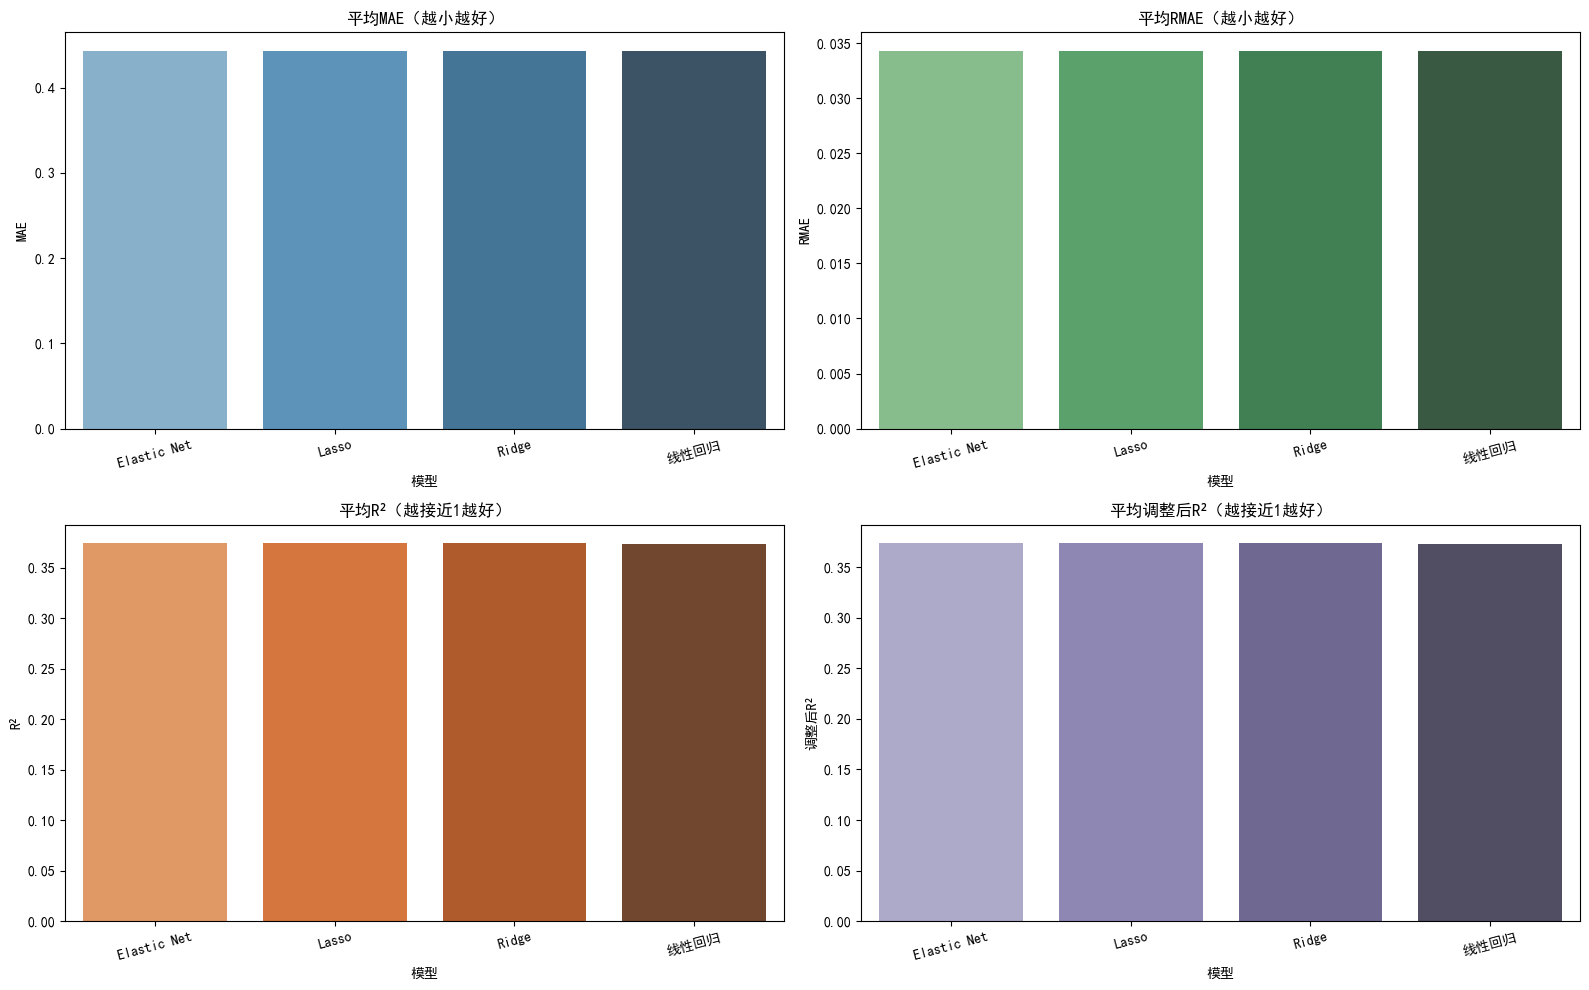


各模型参数与系数详情：

----- 线性回归 -----
超参数: 无超参数
截距 (intercept): 11.120613
特征系数（按绝对值排序）:
采暖_量化      0.258285
用水_量化      0.127203
环线_数值      0.072008
城市         0.049866
停车位_量化     0.045855
付款方式_量化    0.025543
配套设施_量化    0.012545
面积_数值      0.007421
租期_量化      0.005664
停车费用_量化    0.000697
Name: 线性回归_系数, dtype: float64

----- Lasso -----
超参数: {'alpha': np.float64(0.0001)}
截距 (intercept): 11.121789
特征系数（按绝对值排序）:
采暖_量化      0.257999
用水_量化      0.126811
环线_数值      0.071991
城市         0.049793
停车位_量化     0.045845
付款方式_量化    0.025452
配套设施_量化    0.012545
面积_数值      0.007419
租期_量化      0.005669
停车费用_量化    0.000697
Name: Lasso_系数, dtype: float64

----- Ridge -----
超参数: {'alpha': np.float64(0.0001)}
截距 (intercept): 11.120613
特征系数（按绝对值排序）:
采暖_量化      0.258285
用水_量化      0.127203
环线_数值      0.072008
城市         0.049866
停车位_量化     0.045855
付款方式_量化    0.025543
配套设施_量化    0.012545
面积_数值      0.007421
租期_量化      0.005664
停车费用_量化    0.000697
Name: Ridge_系数, dtype: float64

----- Elastic Net -----
超参数: {'alpha':

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV, KFold

# 设置中文显示
plt.rcParams["font.family"] = ["SimHei", "Microsoft YaHei"]
plt.rcParams["axes.unicode_minus"] = False


# ----------------------
# 1. 定义评估指标计算函数
# ----------------------
def adjusted_r2(r2, n, p):
    """计算调整后R²：adjusted_r² = 1 - (1 - r2) * (n-1)/(n-p-1)"""
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

def rmae(y_true, y_pred):
    """计算相对平均绝对误差（RMAE）：MAE / 均值"""
    mae = mean_absolute_error(y_true, y_pred)
    y_mean = np.mean(y_true)
    return mae / y_mean if y_mean != 0 else np.nan  # 避免除以0


# ----------------------
# 2. 处理目标变量（取对数）
# ----------------------
# 对Y_rent_all取对数（使用np.log1p避免0值问题，无0值可替换为np.log）
Y_rent_all_log = np.log1p(Y_rent_all)
print(f"已对Y_rent_all取对数，生成Y_rent_all_log（形状：{Y_rent_all_log.shape}）")

# 确保X_rent_all和Y_rent_all_log的索引一致（关键修正：避免索引不匹配）
if not X_rent_all.index.equals(Y_rent_all_log.index):
    # 重置索引为默认整数索引，确保对齐
    X_rent_all = X_rent_all.reset_index(drop=True)
    Y_rent_all_log = Y_rent_all_log.reset_index(drop=True)
    print("已重置X_rent_all和Y_rent_all_log的索引，确保两者对齐")

# 获取特征名称和维度
feature_names = X_rent_all.columns.tolist()
n_features = len(feature_names)
n_samples = X_rent_all.shape[0]
print(f"特征列：{feature_names}（共{n_features}个特征）")


# ----------------------
# 3. 模型定义与6折交叉验证配置
# ----------------------
# 6折交叉验证拆分器（固定随机种子，结果可复现）
kf = KFold(n_splits=6, shuffle=True, random_state=42)

# 模型字典（含超参数网格）
models = {
    "线性回归": LinearRegression(),  # 无超参数模型
    
    "Lasso": GridSearchCV(
        estimator=Lasso(max_iter=10000, random_state=42),
        param_grid={"alpha": np.logspace(-4, 2, 50)},  # 正则化强度范围
        cv=kf, scoring="neg_mean_absolute_error",
        n_jobs=1  # 单进程避免中文编码冲突
    ),
    
    "Ridge": GridSearchCV(
        estimator=Ridge(max_iter=10000, random_state=42),
        param_grid={"alpha": np.logspace(-4, 2, 50)},
        cv=kf, scoring="neg_mean_absolute_error",
        n_jobs=1
    ),
    
    "Elastic Net": GridSearchCV(
        estimator=ElasticNet(max_iter=10000, random_state=42),
        param_grid={
            "alpha": np.logspace(-4, 2, 30),  # 正则化强度
            "l1_ratio": [0.1, 0.3, 0.5, 0.7, 0.9]  # L1/L2混合比例
        },
        cv=kf, scoring="neg_mean_absolute_error",
        n_jobs=1
    )
}


# ----------------------
# 4. 模型训练、交叉验证与参数存储（修正索引访问逻辑）
# ----------------------
# 存储交叉验证指标（每折结果）
cv_metrics = {
    "模型": [], "折数": [], "MAE": [], "RMAE": [], "R²": [], "调整后R²": []
}

# 存储模型参数（超参数、系数、截距）
model_params = {
    "超参数": {}, "系数": {}, "截距": {}
}

# 存储最佳模型
best_models = {}


for name, model in models.items():
    print(f"\n===== 训练 {name} 模型（基于Y_rent_all_log，6折交叉验证） =====")
    
    # 训练模型（目标变量为Y_rent_all_log）
    if name == "线性回归":
        # 线性回归：手动6折交叉验证（使用iloc按位置访问，避免索引问题）
        fold_idx = 1
        for train_idx, val_idx in kf.split(X_rent_all):
            # 关键修正：用iloc按整数位置访问，不依赖原始索引
            X_train = X_rent_all.iloc[train_idx]
            X_val = X_rent_all.iloc[val_idx]
            y_train = Y_rent_all_log.iloc[train_idx] if isinstance(Y_rent_all_log, pd.Series) else Y_rent_all_log[train_idx]
            y_val = Y_rent_all_log.iloc[val_idx] if isinstance(Y_rent_all_log, pd.Series) else Y_rent_all_log[val_idx]
            
            # 训练单折模型
            fold_model = LinearRegression()
            fold_model.fit(X_train, y_train)
            
            # 预测与评估
            y_pred = fold_model.predict(X_val)
            mae = mean_absolute_error(y_val, y_pred)
            rmae_val = rmae(y_val, y_pred)
            r2 = r2_score(y_val, y_pred)
            adj_r2 = adjusted_r2(r2, len(y_val), n_features)
            
            # 记录指标
            cv_metrics["模型"].append(name)
            cv_metrics["折数"].append(fold_idx)
            cv_metrics["MAE"].append(mae)
            cv_metrics["RMAE"].append(rmae_val)
            cv_metrics["R²"].append(r2)
            cv_metrics["调整后R²"].append(adj_r2)
            
            print(f"第{fold_idx}折 - MAE: {mae:.4f}, R²: {r2:.4f}")
            fold_idx += 1
        
        # 最终模型（全量数据训练）
        best_model = LinearRegression().fit(X_rent_all, Y_rent_all_log)
        best_params = "无超参数"
    
    else:
        # 正则化模型：GridSearchCV自动交叉验证+超参数优化
        model.fit(X_rent_all, Y_rent_all_log)
        best_model = model.best_estimator_
        best_params = model.best_params_
        print(f"最优超参数: {best_params}")
        
        # 提取每折指标（修正用iloc按位置访问）
        cv_results = model.cv_results_
        # 预先生成所有折的索引（避免重复计算）
        kf_splits = list(kf.split(X_rent_all))
        
        for fold_idx in range(6):
            # 提取该折的训练/验证索引
            train_idx, val_idx = kf_splits[fold_idx]
            # 关键修正：用iloc按位置访问
            X_val = X_rent_all.iloc[val_idx]
            y_val = Y_rent_all_log.iloc[val_idx] if isinstance(Y_rent_all_log, pd.Series) else Y_rent_all_log[val_idx]
            
            # 提取MAE（取负值的绝对值）
            mae = -cv_results[f"split{fold_idx}_test_score"][model.best_index_]
            # 计算R²和RMAE
            y_pred = best_model.predict(X_val)
            rmae_val = rmae(y_val, y_pred)
            r2 = r2_score(y_val, y_pred)
            adj_r2 = adjusted_r2(r2, len(y_val), n_features)
            
            # 记录指标
            cv_metrics["模型"].append(name)
            cv_metrics["折数"].append(fold_idx + 1)
            cv_metrics["MAE"].append(mae)
            cv_metrics["RMAE"].append(rmae_val)
            cv_metrics["R²"].append(r2)
            cv_metrics["调整后R²"].append(adj_r2)
        
        print(f"6折平均MAE: {np.mean([cv_metrics['MAE'][i] for i in range(len(cv_metrics['MAE'])) if cv_metrics['模型'][i]==name]):.4f}")
    
    # 保存最佳模型及参数
    best_models[name] = best_model
    # 处理系数维度
    coefficients = best_model.coef_.flatten() if best_model.coef_.ndim > 1 else best_model.coef_
    coef_series = pd.Series(coefficients, index=feature_names, name=f"{name}_系数")
    # 处理截距
    intercept = best_model.intercept_.item() if isinstance(best_model.intercept_, np.ndarray) else best_model.intercept_
    
    model_params["超参数"][name] = best_params
    model_params["系数"][name] = coef_series
    model_params["截距"][name] = intercept


# ----------------------
# 5. 输出交叉验证指标
# ----------------------
# 转换为DataFrame
cv_metrics_df = pd.DataFrame(cv_metrics)

# 计算平均指标
mean_metrics_df = cv_metrics_df.groupby("模型").agg({
    "MAE": "mean", "RMAE": "mean", "R²": "mean", "调整后R²": "mean"
}).round(4).reset_index()

print("\n" + "="*80)
print("6折交叉验证平均指标（基于Y_rent_all_log）：")
print("="*80)
print(mean_metrics_df)

print("\n" + "="*80)
print("各折详细指标：")
print("="*80)
print(cv_metrics_df.round(4))

# 可视化平均指标
plt.figure(figsize=(16, 10))
plt.subplot(2, 2, 1)
sns.barplot(x="模型", y="MAE", data=mean_metrics_df, palette="Blues_d")
plt.title("平均MAE（越小越好）")
plt.xticks(rotation=15)

plt.subplot(2, 2, 2)
sns.barplot(x="模型", y="RMAE", data=mean_metrics_df, palette="Greens_d")
plt.title("平均RMAE（越小越好）")
plt.xticks(rotation=15)

plt.subplot(2, 2, 3)
sns.barplot(x="模型", y="R²", data=mean_metrics_df, palette="Oranges_d")
plt.title("平均R²（越接近1越好）")
plt.xticks(rotation=15)

plt.subplot(2, 2, 4)
sns.barplot(x="模型", y="调整后R²", data=mean_metrics_df, palette="Purples_d")
plt.title("平均调整后R²（越接近1越好）")
plt.xticks(rotation=15)

plt.tight_layout()
plt.show()


# ----------------------
# 6. 输出模型参数与系数
# ----------------------
print("\n" + "="*80)
print("各模型参数与系数详情：")
print("="*80)
for name in models.keys():
    print(f"\n----- {name} -----")
    print(f"超参数: {model_params['超参数'][name]}")
    print(f"截距 (intercept): {model_params['截距'][name]:.6f}")
    print("特征系数（按绝对值排序）:")
    print(model_params["系数"][name].sort_values(key=abs, ascending=False).round(6))


# ----------------------
# 7. 保存结果（可选）
# ----------------------
cv_metrics_df.to_csv("租金模型_6折交叉验证详细指标.csv", index=False, encoding="utf-8-sig")
mean_metrics_df.to_csv("租金模型_6折交叉验证平均指标.csv", index=False, encoding="utf-8-sig")
print("\n交叉验证指标已保存至CSV文件。")

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 3. 划分训练集（80%）与测试集（20%）
# 假设目标任务为“回归/分类”，需区分特征（X）和标签（y）
# 若未明确标签列，可先默认全量特征划分（后续可根据任务调整y的定义）
# 示例1：若有明确标签列（如“房价”列名为'price'），按以下方式划分
# X = df.drop(columns=['price'])  # 特征：所有列除了标签列
# y = df['price']  # 标签：目标预测列

# 示例2：若暂未明确标签（仅做数据划分），全量数据划分为train_df和test_df
train_df, test_df = train_test_split(
    df,
    test_size=0.2,  # 测试集占比20%
    random_state=111,  # 固定随机种子，确保每次划分结果一致
    shuffle=True  # 划分前打乱数据（默认True，避免原数据顺序影响）
)

# 4. 验证划分结果
print(f"训练集样本数：{len(train_df)}（占比：{len(train_df)/len(df):.2%}）")
print(f"测试集样本数：{len(test_df)}（占比：{len(test_df)/len(df):.2%}）")

# （可选）若有标签列，可额外验证标签分布（确保划分后分布一致）
# print("\n训练集标签均值：", y_train.mean())
# print("测试集标签均值：", y_test.mean())

训练集样本数：79115（占比：80.00%）
测试集样本数：19779（占比：20.00%）


In [31]:
df=train_df

In [32]:
import pandas as pd

# 1. 检查目标列是否存在
target_cols = ["Price", "面积_数值","停车费用_量化"]
missing_cols = [col for col in target_cols if col not in df.columns]

if missing_cols:
    print(f"警告：数据中缺少以下列，无法处理：{missing_cols}")
else:
    # 2. 复制原始数据，避免修改源数据
    df_clean = df.copy()
    
    # 3. 存储每列的3倍IQR阈值信息
    thresholds = {}
    
    # 4. 对“Price”和“建筑面积”依次用3倍IQR剔除异常值
    for col in target_cols:
        # 计算当前列的四分位数和IQR
        q1 = df_clean[col].quantile(0.25)
        q3 = df_clean[col].quantile(0.75)
        iqr = q3 - q1
        
        # 3倍IQR阈值（宽松标准）
        lower = q1 - 3 * iqr
        upper = q3 + 3 * iqr
        thresholds[col] = (lower, upper)
        
        # 记录处理前后的行数
        before = len(df_clean)
        # 剔除超出阈值的异常值
        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
        after = len(df_clean)
        deleted = before - after
        
        # 输出该列的处理详情
        print(f"处理列：{col}")
        print(f"  3倍IQR阈值范围：[{lower:.2f}, {upper:.2f}]")
        print(f"  剔除异常值数量：{deleted}")
        print(f"  处理后剩余行数：{after}\n")
    
    # 5. 整体结果统计
    original_total = len(df)
    final_total = len(df_clean)
    total_deleted = original_total - final_total
    deleted_ratio = (total_deleted / original_total) * 100
    
    print("=" * 60)
    print("3倍IQR异常值处理结果汇总")
    print("=" * 60)
    print(f"原始数据总行数：{original_total}")
    print(f"累计剔除异常值行数：{total_deleted}（占比 {deleted_ratio:.2f}%）")
    print(f"最终保留行数：{final_total}")
    
    # 6. 验证处理效果（查看两列处理后的分布）
    print("\n处理后列分布统计：")
    for col in target_cols:
        print(f"\n{col} 统计描述：")
        print(df_clean[col].describe().round(2))

df=df_clean

处理列：Price
  3倍IQR阈值范围：[-1207058.63, 2172594.45]
  剔除异常值数量：1764
  处理后剩余行数：77351

处理列：面积_数值
  3倍IQR阈值范围：[-94.00, 242.00]
  剔除异常值数量：265
  处理后剩余行数：77086

处理列：停车费用_量化
  3倍IQR阈值范围：[-1054.00, 1403.00]
  剔除异常值数量：82
  处理后剩余行数：77004

3倍IQR异常值处理结果汇总
原始数据总行数：79115
累计剔除异常值行数：2111（占比 2.67%）
最终保留行数：77004

处理后列分布统计：

Price 统计描述：
count      77004.00
mean      513102.51
std       376176.93
min        17938.07
25%       238559.31
50%       381085.56
75%       694910.12
max      2171132.05
Name: Price, dtype: float64

面积_数值 统计描述：
count    77004.00
mean        77.26
std         36.08
min          6.05
25%         50.00
50%         77.40
75%         98.00
max        242.00
Name: 面积_数值, dtype: float64

停车费用_量化 统计描述：
count    77004.00
mean       211.59
std        222.21
min         -1.00
25%         -1.00
50%        150.00
75%        350.00
max       1300.00
Name: 停车费用_量化, dtype: float64


In [33]:
# 定义特征列（X）和目标列（Y）
# 特征列包含指定的23个列（注意：包含Price是你要求的，若实际分析中需排除可移除）
feature_columns = [
    '城市', '装修', '年份', '户型完整度评分', '楼层完整度评分',
    '面积_数值', '朝向评分', '付款方式_量化', '租赁方式_量化', '电梯_量化',
    '车位_量化', '用水_量化', '用电_量化', '燃气_量化', '采暖_量化', '租期_量化',
    '配套设施_量化', '环线_数值', '燃气费_量化', '停车位_量化', '停车费用_量化'
]

# 提取特征列（确保只包含数据中存在的列）
existing_features = [col for col in feature_columns if col in df.columns]
X = df[existing_features].copy()

# 提取目标列（Price）
if "Price" in df.columns:
    Y = df["Price"].copy()
else:
    Y = None
    print("警告：数据中不存在'Price'列，无法赋值给Y")

# 验证结果
print("=" * 60)
print(f"X的形状（样本数, 特征数）：{X.shape}")
print(f"X包含的列：{X.columns.tolist()}")
print("\n" + "=" * 60)
if Y is not None:
    print(f"Y的形状（样本数,）：{Y.shape}")
    print("Y的前5个值：")
    print(Y.head().tolist())

X的形状（样本数, 特征数）：(77004, 21)
X包含的列：['城市', '装修', '年份', '户型完整度评分', '楼层完整度评分', '面积_数值', '朝向评分', '付款方式_量化', '租赁方式_量化', '电梯_量化', '车位_量化', '用水_量化', '用电_量化', '燃气_量化', '采暖_量化', '租期_量化', '配套设施_量化', '环线_数值', '燃气费_量化', '停车位_量化', '停车费用_量化']

Y的形状（样本数,）：(77004,)
Y的前5个值：
[723286.3572245836, 199110.9424785376, 236219.09515023232, 726321.1679115294, 1585353.5369875429]



数值型特征：['城市', '装修', '年份', '户型完整度评分', '楼层完整度评分', '面积_数值', '朝向评分', '付款方式_量化', '租赁方式_量化', '车位_量化', '用水_量化', '用电_量化', '燃气_量化', '采暖_量化', '租期_量化', '配套设施_量化', '环线_数值', '燃气费_量化', '停车位_量化', '停车费用_量化']
类别型特征：['电梯_量化']

独热编码后特征数量：21

2. 相关性分析
特征与Price的相关性（绝对值Top10）：
面积_数值      0.311879
停车费用_量化    0.259146
采暖_量化      0.238155
燃气费_量化     0.228488
租赁方式_量化    0.208895
环线_数值      0.190257
停车位_量化     0.183646
城市         0.131150
配套设施_量化    0.127219
付款方式_量化    0.124739
dtype: float64


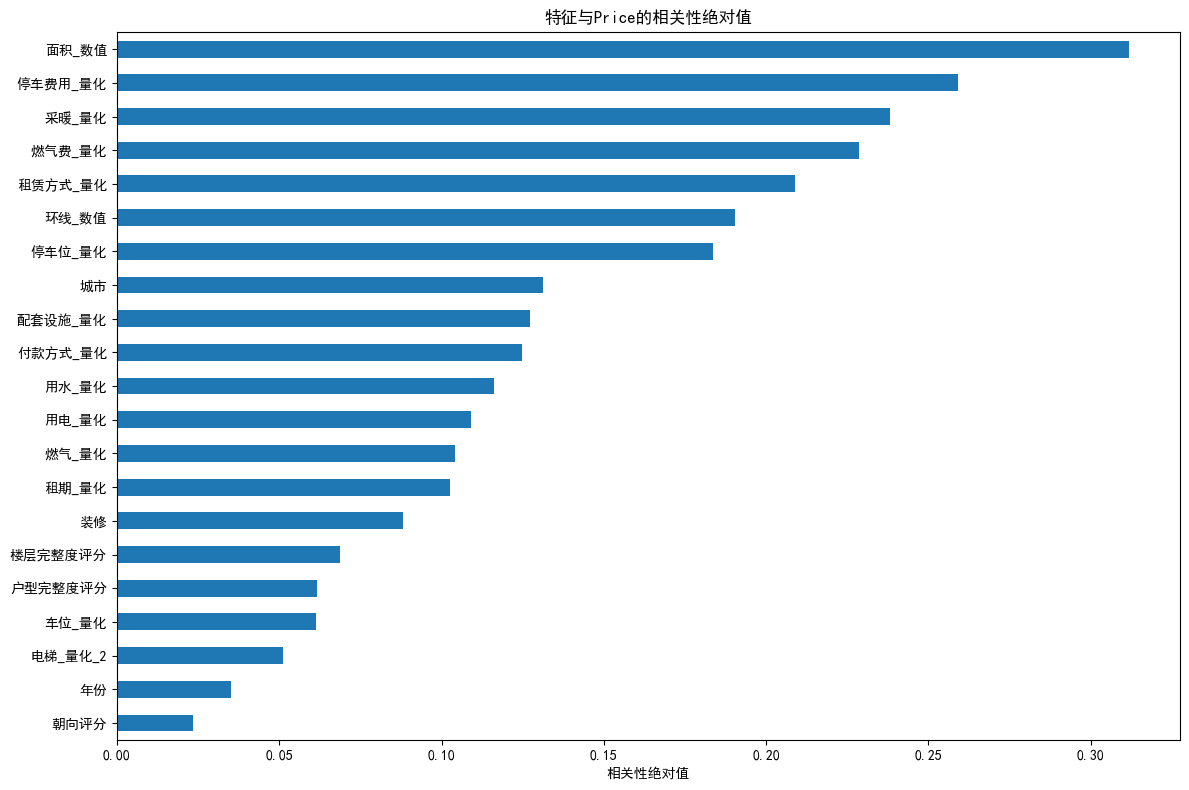


相关性筛选后保留的特征（阈值> 0.1）：14个

3. 方差膨胀因子（VIF）分析
初始VIF（降序）：
         特征        VIF
10    用电_量化  42.478697
9     用水_量化  42.011591
4   租赁方式_量化  26.619993
11    燃气_量化  14.786704
3    燃气费_量化  11.574332
6    停车位_量化  10.547977
0     面积_数值   7.250930
13       城市   5.139914
8   付款方式_量化   4.749892
7   配套设施_量化   3.511785
移除高VIF特征：用电_量化（VIF=42.48）
移除高VIF特征：租赁方式_量化（VIF=26.52）
移除高VIF特征：燃气_量化（VIF=13.15）
移除高VIF特征：燃气费_量化（VIF=10.86）

VIF筛选后保留的特征：10个
最终VIF（降序）：
        特征       VIF
4   停车位_量化  5.385746
6  付款方式_量化  4.358298
7    用水_量化  4.337974
0    面积_数值  4.169138
5  配套设施_量化  3.397749

4. Lasso回归特征选择
最优alpha值：8.902151

Lasso筛选后保留的特征（系数非零）：10个
Lasso系数（非零）：
        特征             系数
0    面积_数值  137149.906027
3    环线_数值  132751.121233
2    采暖_量化  126371.807310
1  停车费用_量化  103893.015806
9       城市   74268.316156
4   停车位_量化   36596.274535
7    用水_量化   27603.145496
6  付款方式_量化   23081.055021
5  配套设施_量化   18257.320032
8    租期_量化    9835.569344


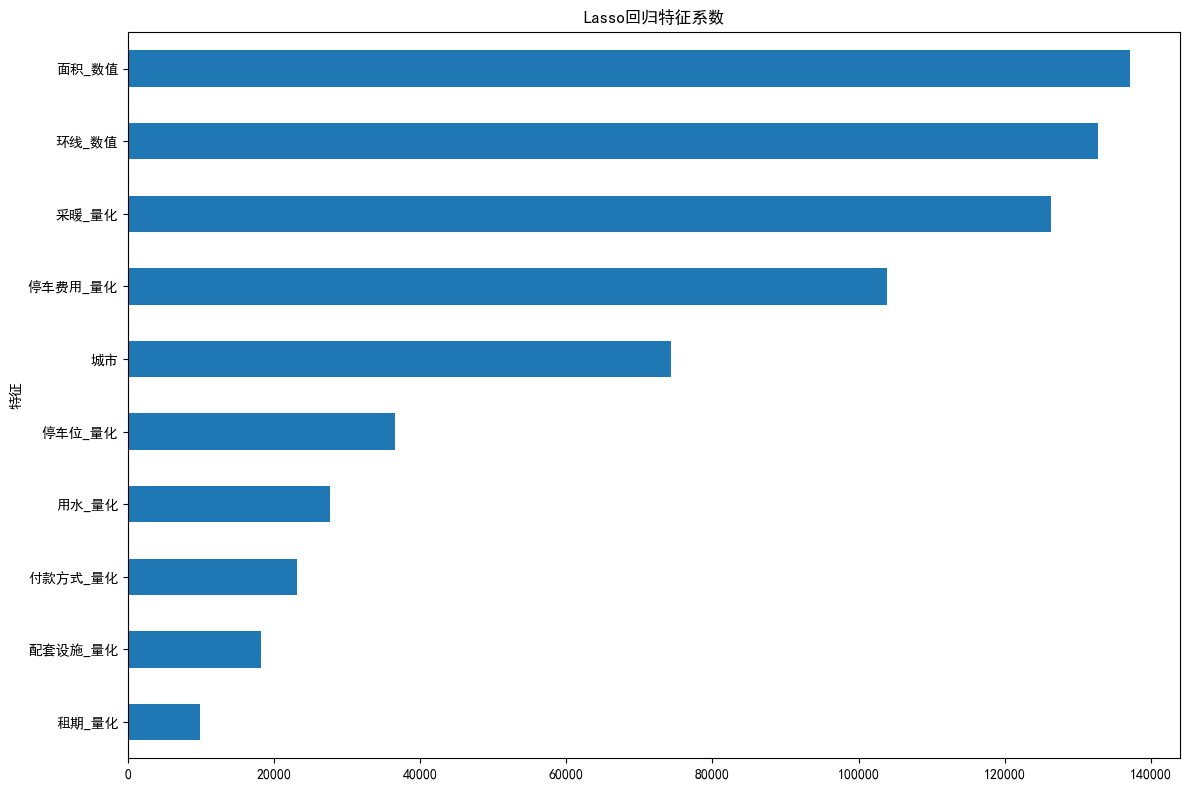


5. 最终特征选择结果
相关性筛选后：14个特征
VIF筛选后：10个特征
Lasso筛选后：10个特征

推荐使用的特征列表：
1. 面积_数值
2. 停车费用_量化
3. 采暖_量化
4. 环线_数值
5. 停车位_量化
6. 配套设施_量化
7. 付款方式_量化
8. 用水_量化
9. 租期_量化
10. 城市


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Lasso, LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 设置中文显示
plt.rcParams["font.family"] = ["SimHei", "WenQuanYi Micro Hei", "Heiti TC"]
plt.rcParams["font.family"] = ["SimHei", "Microsoft YaHei"]
plt.rcParams["axes.unicode_minus"] = False  # 解决负号显示问题

# ----------------------
# 1. 数据预处理（确保X不含Y，且处理类别变量）
# ----------------------
# 注意：如果X中包含Price，需要先移除（因为Y是Price，不能作为自变量）
if "Price" in X.columns:
    X = X.drop(columns=["Price"])
    print("已从X中移除'Price'列（避免自回归问题）")

# 区分数值型和类别型特征
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(exclude=[np.number]).columns.tolist()
print(f"\n数值型特征：{numeric_features}")
print(f"类别型特征：{categorical_features}")

# 对类别型特征进行独热编码（避免VIF和Lasso分析出错）
if categorical_features:
    X_encoded = pd.get_dummies(X, columns=categorical_features, drop_first=True)
    print(f"\n独热编码后特征数量：{X_encoded.shape[1]}")
else:
    X_encoded = X.copy()

# 标准化特征（Lasso对特征尺度敏感）
scaler = StandardScaler()
X_scaled = pd.DataFrame(
    scaler.fit_transform(X_encoded),
    columns=X_encoded.columns
)

# ----------------------
# 2. 相关性分析（筛选与Y强相关的特征）
# ----------------------
print("\n" + "="*60)
print("2. 相关性分析")
print("="*60)

# 计算特征与Y的相关性
corr_with_y = X_encoded.apply(lambda x: x.corr(Y))
corr_with_y = corr_with_y.sort_values(ascending=False)

# 显示相关性绝对值Top10的特征
print("特征与Price的相关性（绝对值Top10）：")
print(corr_with_y.abs().sort_values(ascending=False).head(10))

# 可视化相关性
plt.figure(figsize=(12, 8))
corr_with_y.abs().sort_values().plot(kind="barh")
plt.title("特征与Price的相关性绝对值")
plt.xlabel("相关性绝对值")
plt.tight_layout()
plt.show()

# 筛选相关性绝对值大于阈值的特征（可调整阈值）
corr_threshold = 0.1  # 可根据实际情况调整
corr_selected = corr_with_y[abs(corr_with_y) > corr_threshold].index.tolist()
print(f"\n相关性筛选后保留的特征（阈值> {corr_threshold}）：{len(corr_selected)}个")

# ----------------------
# 3. 方差膨胀因子（VIF）分析（筛选多重共线性低的特征）
# ----------------------
print("\n" + "="*60)
print("3. 方差膨胀因子（VIF）分析")
print("="*60)

def calculate_vif(X_df):
    """计算VIF并排序"""
    vif_data = pd.DataFrame()
    vif_data["特征"] = X_df.columns
    vif_data["VIF"] = [variance_inflation_factor(X_df.values, i) for i in range(X_df.shape[1])]
    return vif_data.sort_values("VIF", ascending=False)

# 仅对相关性筛选后的特征计算VIF（减少计算量）
X_corr = X_encoded[corr_selected]
vif_df = calculate_vif(X_corr)
print("初始VIF（降序）：")
print(vif_df.head(10))

# 迭代移除高VIF特征（VIF>10通常认为共线性严重）
vif_threshold = 10.0
vif_selected = corr_selected.copy()

# 检查并处理缺失值和无穷大值
X_clean = X_encoded.replace([np.inf, -np.inf], np.nan)  # 将inf替换为NaN
X_clean = X_clean.dropna()  # 删除含NaN的行（或用X_clean.fillna(...)填充）

while True:
    current_vif = calculate_vif(X_encoded[vif_selected])
    max_vif = current_vif["VIF"].max()
    if max_vif > vif_threshold:
        # 移除VIF最大的特征
        drop_feature = current_vif.iloc[0]["特征"]
        vif_selected.remove(drop_feature)
        print(f"移除高VIF特征：{drop_feature}（VIF={max_vif:.2f}）")
    else:
        break

print(f"\nVIF筛选后保留的特征：{len(vif_selected)}个")
print("最终VIF（降序）：")
print(calculate_vif(X_encoded[vif_selected]).head())

# ----------------------
# 4. Lasso回归（筛选重要特征）
# ----------------------
print("\n" + "="*60)
print("4. Lasso回归特征选择")
print("="*60)

# 划分训练集（Lasso需要训练数据）
X_train, _, y_train, _ = train_test_split(
    X_scaled[vif_selected], Y, test_size=0.2, random_state=42
)

# 使用交叉验证选择最优alpha
lasso_cv = LassoCV(
    alphas=np.logspace(-4, 1, 100),  # alpha候选值
    cv=5,  # 5折交叉验证
    random_state=42,
    max_iter=10000
)
lasso_cv.fit(X_train, y_train)
best_alpha = lasso_cv.alpha_
print(f"最优alpha值：{best_alpha:.6f}")

# 使用最优alpha训练Lasso模型
lasso = Lasso(alpha=best_alpha, max_iter=10000, random_state=42)
lasso.fit(X_train, y_train)

# 提取系数非零的特征（Lasso认为重要的特征）
lasso_coef = pd.DataFrame({
    "特征": X_train.columns,
    "系数": lasso.coef_
})
lasso_selected = lasso_coef[lasso_coef["系数"] != 0]["特征"].tolist()

print(f"\nLasso筛选后保留的特征（系数非零）：{len(lasso_selected)}个")
print("Lasso系数（非零）：")
print(lasso_coef[lasso_coef["系数"] != 0].sort_values("系数", ascending=False))

# 可视化Lasso系数
plt.figure(figsize=(12, 8))
lasso_coef = lasso_coef.set_index("特征")
lasso_coef["系数"].sort_values().plot(kind="barh")
plt.axvline(x=0, color="red", linestyle="--")
plt.title("Lasso回归特征系数")
plt.tight_layout()
plt.show()

# ----------------------
# 5. 最终特征选择结果
# ----------------------
print("\n" + "="*60)
print("5. 最终特征选择结果")
print("="*60)
print(f"相关性筛选后：{len(corr_selected)}个特征")
print(f"VIF筛选后：{len(vif_selected)}个特征")
print(f"Lasso筛选后：{len(lasso_selected)}个特征")

print("\n推荐使用的特征列表：")
for i, feature in enumerate(lasso_selected, 1):
    print(f"{i}. {feature}")

In [35]:
# 定义推荐的特征列表
recommended_features = [
    '面积_数值', 
    '停车费用_量化', 
    '采暖_量化', 
    '环线_数值', 
    '停车位_量化', 
    '配套设施_量化', 
    '付款方式_量化', 
    '用水_量化', 
    '租期_量化', 
    '城市'
]

# 检查特征是否都存在于df中
missing_features = [f for f in recommended_features if f not in df.columns]
if missing_features:
    raise ValueError(f"以下特征在df中不存在，请检查列名：{missing_features}")

# 提取特征并存储到X中
X = df[recommended_features].copy()

# 查看X的基本信息（确认提取结果）
print("特征数据X的基本信息：")
print(f"形状：{X.shape}（行：样本数，列：特征数）")
print("\n前5行数据：")
print(X.head())

X_rent=X

特征数据X的基本信息：
形状：(77004, 10)（行：样本数，列：特征数）

前5行数据：
       面积_数值  停车费用_量化  采暖_量化  环线_数值  停车位_量化  配套设施_量化  付款方式_量化  用水_量化  租期_量化  \
3691   42.12    120.0      2    8.0       4        0        0      1      0   
17020  80.00    150.0      2    0.0       5        9        3      1      6   
45706  30.00     -1.0      0   11.0       0        7        3      0      6   
1316   53.38    150.0      2    3.0       3        8        3      1      6   
1854   65.50     -1.0      2    1.0       0        6        3      1      0   

       城市  
3691    0  
17020   1  
45706   3  
1316    0  
1854    0  


In [36]:
# 定义需要提取的特征列表
test_features = [
    '面积_数值', 
    '停车费用_量化', 
    '采暖_量化', 
    '环线_数值', 
    '停车位_量化', 
    '配套设施_量化', 
    '付款方式_量化', 
    '用水_量化', 
    '租期_量化', 
    '城市'
]

# 检查测试数据中是否存在所有特征
missing_in_test = [f for f in test_features if f not in test_df.columns]
if missing_in_test:
    raise ValueError(f"测试数据 test_df 中缺少以下特征：{missing_in_test}，请检查列名")

# 提取特征到 X_test
X_test = test_df[test_features].copy()

# 验证提取结果
print("测试特征数据 X_test 信息：")
print(f"形状：{X_test.shape}（样本数：{X_test.shape[0]}，特征数：{X_test.shape[1]}）")
print("\n前5行数据：")
print(X_test.head())

X_rent_test=X_test

测试特征数据 X_test 信息：
形状：(19779, 10)（样本数：19779，特征数：10）

前5行数据：
       面积_数值  停车费用_量化  采暖_量化  环线_数值  停车位_量化  配套设施_量化  付款方式_量化  用水_量化  租期_量化  \
33224  130.0     -1.0      0    2.0       0        9        3      1      6   
43396   66.0     -1.0      0   11.0       0        0        5      1      6   
37751  140.0     -1.0      0   11.0       0        3        3      1      6   
40162  146.0     -1.0      0   11.0       0        0        3      1      0   
67332   89.0    110.0      0    7.0       4        8        1      1      6   

       城市  
33224   2  
43396   3  
37751   3  
40162   3  
67332   7  


In [38]:
# 检查"Price"列是否存在于test_df中
if "Price" not in test_df.columns:
    raise ValueError("测试数据 test_df 中不存在 'Price' 列，请检查列名")

# 提取"Price"列到Y_test
Y_test = test_df["Price"].copy()

# 验证提取结果
print("测试标签数据 Y_test 信息：")
print(f"形状：{Y_test.shape}（样本数：{Y_test.shape[0]}）")
print("\n前5个值：")
print(Y_test.head())


测试标签数据 Y_test 信息：
形状：(19779,)（样本数：19779）

前5个值：
33224    184684.798695
43396    403247.356892
37751    529841.135299
40162    604709.988667
67332    807542.207319
Name: Price, dtype: float64


In [40]:
import numpy as np

# 对Y和Y_test取自然对数（默认ln，如需以10为底可改用np.log10）
Y_log = np.log(Y)
Y_test_log = np.log(Y_test)

# 验证操作结果（查看前5个值）
print("原始Y前5个值：")
print(Y.head())
print("\n取对数后Y_log前5个值：")
print(Y_log.head())

print("\n原始Y_test前5个值：")
print(Y_test.head())
print("\n取对数后Y_test_log前5个值：")
print(Y_test_log.head())

Y_rent_log=Y_log
Y_rent_test_log=Y_test_log

原始Y前5个值：
3691     7.232864e+05
17020    1.991109e+05
45706    2.362191e+05
1316     7.263212e+05
1854     1.585354e+06
Name: Price, dtype: float64

取对数后Y_log前5个值：
3691     13.491560
17020    12.201617
45706    12.372515
1316     13.495748
1854     14.276318
Name: Price, dtype: float64

原始Y_test前5个值：
33224    184684.798695
43396    403247.356892
37751    529841.135299
40162    604709.988667
67332    807542.207319
Name: Price, dtype: float64

取对数后Y_test_log前5个值：
33224    12.126406
43396    12.907305
37751    13.180332
40162    13.312504
67332    13.601751
Name: Price, dtype: float64


In [41]:
# ----------------------
# 导入X_new_rent.csv数据
# ----------------------
import pandas as pd

# 读取CSV文件（支持中文，自动识别索引）
try:
    X_new_rent = pd.read_csv("X_new_rent.csv", encoding="utf-8-sig")
    print(f"成功导入X_new_rent.csv，数据形状：{X_new_rent.shape}")
    print("数据前5行预览：")
    print(X_new_rent.head())
except FileNotFoundError:
    print("错误：未找到X_new_rent.csv文件，请检查文件路径是否正确。")
except Exception as e:
    print(f"导入数据时发生错误：{str(e)}")

成功导入X_new_rent.csv，数据形状：(9773, 10)
数据前5行预览：
    面积_数值  停车费用_量化  采暖_量化  环线_数值  停车位_量化  配套设施_量化  付款方式_量化  用水_量化  租期_量化  城市
0   86.94    100.0      1    0.0       5        9        0      1      0   1
1   72.60    800.0      0    0.0       4        6        1      1      0  10
2   98.00     -1.0      0    0.0       0        8        0      0      6   3
3   98.97   1200.0      2    4.0       5        0        3      1      0   0
4  170.53     -1.0      0    0.0       0        8        3      1      0   3



===== 训练 线性回归 模型 =====

===== 训练 Lasso 模型 =====


C:\Users\杨\AppData\Local\Temp\ipykernel_25204\4287076672.py:162: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  metrics_df = pd.concat(


最优超参数: {'alpha': np.float64(0.0001)}

===== 训练 Ridge 模型 =====
最优超参数: {'alpha': np.float64(0.0001)}

===== 训练 Elastic Net 模型 =====
最优超参数: {'alpha': np.float64(0.0001), 'l1_ratio': 0.1}

各模型参数与系数详情：

----- 线性回归 -----
超参数: 无超参数
截距 (intercept): 11.120604
特征系数（按绝对值排序）:
采暖_量化      0.258285
用水_量化      0.127204
环线_数值      0.072008
城市         0.049866
停车位_量化     0.045855
付款方式_量化    0.025543
配套设施_量化    0.012545
面积_数值      0.007421
租期_量化      0.005664
停车费用_量化    0.000697
Name: 线性回归_系数, dtype: float64

----- Lasso -----
超参数: {'alpha': np.float64(0.0001)}
截距 (intercept): 11.121781
特征系数（按绝对值排序）:
采暖_量化      0.258000
用水_量化      0.126811
环线_数值      0.071991
城市         0.049793
停车位_量化     0.045845
付款方式_量化    0.025452
配套设施_量化    0.012545
面积_数值      0.007419
租期_量化      0.005669
停车费用_量化    0.000697
Name: Lasso_系数, dtype: float64

----- Ridge -----
超参数: {'alpha': np.float64(0.0001)}
截距 (intercept): 11.120604
特征系数（按绝对值排序）:
采暖_量化      0.258285
用水_量化      0.127204
环线_数值      0.072008
城市         0.049866
停车位_量化

C:\Users\杨\AppData\Local\Temp\ipykernel_25204\4287076672.py:196: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="模型", y="MAE", data=test_metrics, palette="Blues_d")
C:\Users\杨\AppData\Local\Temp\ipykernel_25204\4287076672.py:202: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="模型", y="RMAE", data=test_metrics, palette="Greens_d")
C:\Users\杨\AppData\Local\Temp\ipykernel_25204\4287076672.py:208: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="模型", y="调整后R²", data=test_metrics, palette="Oranges_d")


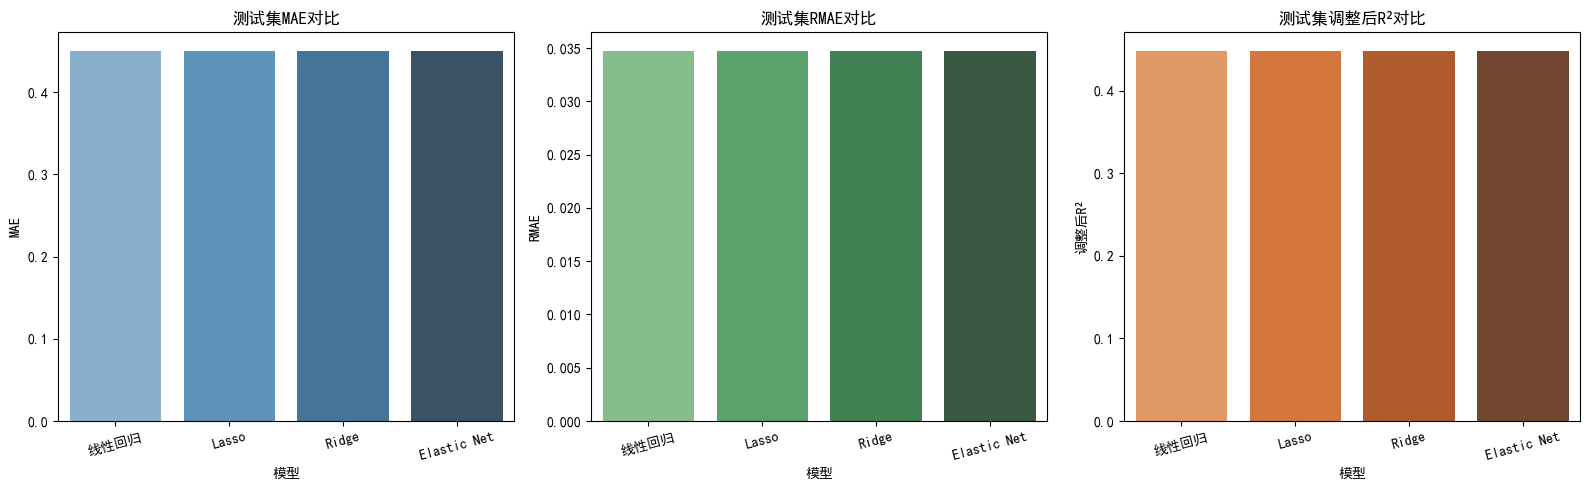


最终预测结果（X_new_rent对应的Y_rent_new_log）：
      线性回归_预测值（Y_rent_new_log）  Lasso_预测值（Y_rent_new_log）  \
0                      12.6130                    12.6133   
1                      13.1271                    13.1271   
2                      12.1311                    12.1319   
3                      13.9292                    13.9291   
4                      12.8392                    12.8392   
...                        ...                        ...   
9768                   12.5808                    12.5807   
9769                   12.2767                    12.2768   
9770                   11.6992                    11.6999   
9771                   12.8134                    12.8134   
9772                   12.7620                    12.7620   

      Ridge_预测值（Y_rent_new_log）  Elastic Net_预测值（Y_rent_new_log）  
0                       12.6130                          12.6131  
1                       13.1271                          13.1271  
2                       12.1

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

# 设置中文显示
plt.rcParams["font.family"] = ["SimHei", "Microsoft YaHei"]
plt.rcParams["axes.unicode_minus"] = False


# ----------------------
# 1. 定义评估指标计算函数
# ----------------------
def adjusted_r2(r2, n, p):
    """计算调整后R²：adjusted_r² = 1 - (1 - r2) * (n-1)/(n-p-1)"""
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

def rmae(y_true, y_pred):
    """计算相对平均绝对误差（RMAE）：MAE / 均值"""
    mae = mean_absolute_error(y_true, y_pred)
    y_mean = np.mean(y_true)
    return mae / y_mean if y_mean != 0 else np.nan  # 避免除以0


# ----------------------
# 2. 数据准备（直接使用现成数据，不做任何处理）
# ----------------------
# 已处理好的数据：
# X_rent: 训练集特征矩阵（DataFrame或ndarray）
# Y_rent_log: 训练集对数目标变量（Series或ndarray）
# X_rent_test: 测试集特征矩阵（与X_rent结构一致）
# Y_rent_test_log: 测试集对数目标变量（与Y_rent_log结构一致）
# X_new_rent: 待预测的新特征矩阵（与X_rent结构一致）

# 获取特征名称（适配DataFrame和ndarray）
if hasattr(X_rent, 'columns'):
    feature_names = X_rent.columns.tolist()
else:
    feature_names = [f'特征{i+1}' for i in range(X_rent.shape[1])]
n_features = len(feature_names)  # 特征数量


# ----------------------
# 3. 模型定义与超参数调优（禁用多进程避免中文编码冲突）
# ----------------------
models = {
    "线性回归": LinearRegression(),  # 无超参数模型
    
    "Lasso": GridSearchCV(
        estimator=Lasso(max_iter=10000, random_state=42),
        param_grid={"alpha": np.logspace(-4, 2, 50)},  # 正则化强度参数范围
        cv=5, scoring="neg_mean_absolute_error",
        n_jobs=1  # 单进程运行，避免中文编码冲突
    ),
    
    "Ridge": GridSearchCV(
        estimator=Ridge(max_iter=10000, random_state=42),
        param_grid={"alpha": np.logspace(-4, 2, 50)},
        cv=5, scoring="neg_mean_absolute_error",
        n_jobs=1  # 单进程运行
    ),
    
    "Elastic Net": GridSearchCV(
        estimator=ElasticNet(max_iter=10000, random_state=42),
        param_grid={
            "alpha": np.logspace(-4, 2, 30),  # 正则化强度
            "l1_ratio": [0.1, 0.3, 0.5, 0.7, 0.9]  # L1/L2混合比例
        },
        cv=5, scoring="neg_mean_absolute_error",
        n_jobs=1  # 单进程运行
    )
}


# ----------------------
# 4. 模型训练、评估与参数存储
# ----------------------
# 存储评估指标
metrics_df = pd.DataFrame(columns=["模型", "数据集", "MAE", "RMAE", "R²", "调整后R²"])

# 存储模型参数（超参数、系数、截距）
model_params = {
    "超参数": {},
    "系数": {},
    "截距": {}
}

# 存储最佳模型（用于最终预测）
best_models = {}


for name, model in models.items():
    print(f"\n===== 训练 {name} 模型 =====")
    
    # 确保目标变量为一维数组（适配DataFrame/Series）
    y_train = Y_rent_log.values.ravel() if hasattr(Y_rent_log, 'values') else Y_rent_log
    
    # 训练模型
    if name == "线性回归":
        # 线性回归无超参数，直接训练
        model.fit(X_rent, y_train)
        best_model = model
        best_params = "无超参数"
    else:
        # 正则化模型用GridSearchCV找最优超参数
        model.fit(X_rent, y_train)
        best_model = model.best_estimator_
        best_params = model.best_params_
        print(f"最优超参数: {best_params}")
    
    # 保存最佳模型
    best_models[name] = best_model
    
    # 预测（训练集和测试集）
    y_pred_train = best_model.predict(X_rent)
    y_pred_test = best_model.predict(X_rent_test)
    
    # 提取系数和截距（处理维度和数据类型）
    coefficients = best_model.coef_
    if coefficients.ndim > 1:  # 确保系数为一维
        coefficients = coefficients.flatten()
    coef_series = pd.Series(coefficients, index=feature_names, name=f"{name}_系数")
    
    intercept = best_model.intercept_
    if isinstance(intercept, np.ndarray):  # 确保截距为标量
        intercept = intercept.item()
    
    # 存储参数
    model_params["超参数"][name] = best_params
    model_params["系数"][name] = coef_series
    model_params["截距"][name] = intercept
    
    # 计算训练集指标
    n_train = X_rent.shape[0]
    r2_train = r2_score(y_train, y_pred_train)
    metrics_train = {
        "模型": name,
        "数据集": "训练集",
        "MAE": mean_absolute_error(y_train, y_pred_train),
        "RMAE": rmae(y_train, y_pred_train),
        "R²": r2_train,
        "调整后R²": adjusted_r2(r2_train, n_train, n_features)
    }
    
    # 计算测试集指标
    n_test = X_rent_test.shape[0]
    y_test = Y_rent_test_log.values.ravel() if hasattr(Y_rent_test_log, 'values') else Y_rent_test_log
    r2_test = r2_score(y_test, y_pred_test)
    metrics_test = {
        "模型": name,
        "数据集": "测试集",
        "MAE": mean_absolute_error(y_test, y_pred_test),
        "RMAE": rmae(y_test, y_pred_test),
        "R²": r2_test,
        "调整后R²": adjusted_r2(r2_test, n_test, n_features)
    }
    
    # 合并指标到结果表
    metrics_df = pd.concat(
        [metrics_df, pd.DataFrame([metrics_train, metrics_test])],
        ignore_index=True
    )


# ----------------------
# 5. 输出模型参数与系数
# ----------------------
print("\n" + "="*80)
print("各模型参数与系数详情：")
print("="*80)
for name in models.keys():
    print(f"\n----- {name} -----")
    print(f"超参数: {model_params['超参数'][name]}")
    print(f"截距 (intercept): {model_params['截距'][name]:.6f}")
    print("特征系数（按绝对值排序）:")
    print(model_params["系数"][name].sort_values(key=abs, ascending=False).round(6))


# ----------------------
# 6. 输出模型评估指标
# ----------------------
print("\n" + "="*80)
print("模型评估指标汇总（MAE、RMAE、R²、调整后R²）：")
print("="*80)
print(metrics_df.round(4))

# 可视化测试集指标
plt.figure(figsize=(16, 5))
test_metrics = metrics_df[metrics_df["数据集"] == "测试集"]

# 子图1：MAE对比（越小越好）
plt.subplot(1, 3, 1)
sns.barplot(x="模型", y="MAE", data=test_metrics, palette="Blues_d")
plt.title("测试集MAE对比")
plt.xticks(rotation=15)

# 子图2：RMAE对比（越小越好）
plt.subplot(1, 3, 2)
sns.barplot(x="模型", y="RMAE", data=test_metrics, palette="Greens_d")
plt.title("测试集RMAE对比")
plt.xticks(rotation=15)

# 子图3：调整后R²对比（越接近1越好）
plt.subplot(1, 3, 3)
sns.barplot(x="模型", y="调整后R²", data=test_metrics, palette="Oranges_d")
plt.title("测试集调整后R²对比")
plt.xticks(rotation=15)

plt.tight_layout()
plt.show()


# ----------------------
# 7. 输出最终预测结果（X_new_rent的预测值）
# ----------------------
# 存储各模型对X_new_rent的预测结果（对数空间）
if hasattr(X_new_rent, 'index'):
    final_predictions = pd.DataFrame(index=X_new_rent.index)
else:
    final_predictions = pd.DataFrame()

for name, model in best_models.items():
    final_predictions[f"{name}_预测值（Y_rent_new_log）"] = model.predict(X_new_rent)

print("\n" + "="*80)
print("最终预测结果（X_new_rent对应的Y_rent_new_log）：")
print("="*80)
print(final_predictions.round(4))

# 保存对数空间预测结果到CSV
final_predictions.to_csv("X_new_rent预测结果（对数空间）.csv", index=False, encoding="utf-8-sig")
print("\n对数空间预测结果已保存至：X_new_rent预测结果（对数空间）.csv")


# ----------------------
# 8. 新增：将对数空间预测值转换回原始空间（若需要）
# ----------------------
# 假设原始对数转换方式为np.log1p，使用np.expm1逆转换
# 若原始转换为其他方式（如np.log），替换为对应逆运算（如np.exp）
original_predictions = pd.DataFrame(index=final_predictions.index)

for col in final_predictions.columns:
    # 列名调整为原始空间标识
    original_col_name = col.replace("Y_rent_new_log", "Y_rent_new")
    # 逆转换计算
    original_predictions[original_col_name] = np.expm1(final_predictions[col])

# 输出原始空间预测结果
print("\n" + "="*80)
print("最终预测结果（X_new_rent对应的原始空间Y_rent_new）：")
print("="*80)
print(original_predictions.round(4))

# 保存原始空间预测结果到CSV
original_predictions.to_csv("X_new_rent预测结果（原始空间）.csv", index=False, encoding="utf-8-sig")
print("\n原始空间预测结果已保存至：X_new_rent预测结果（原始空间）.csv")